# Summary of last lecture

Yesterday I showed how to rigorously compute an approximation of the invariant density of a deterministic dynamical system that satisfies a Lasota-Yorke inequality through an a posteriori estimate of the mixing rates of the Ulam operator.

I showed how it is possible to estimate the invariant density, how to use the coarse fine estimates to get mixing rates for a finer operator and how it is possible to estimate the BV mixing rates for the abstract operator.

# Approximating the stationary measure for a random dynamical system with additive noise

In [6]:
import Pkg;
Pkg.rm("RigorousInvariantMeasures")
Pkg.add(path = "https://github.com/JuliaDynamics/RigorousInvariantMeasures.jl")

    Updating `~/.julia/environments/v1.9/Project.toml`
  [6103b61f] - RigorousInvariantMeasures v0.2.1 `https://github.com/JuliaDynamics/RigorousInvariantMeasures.jl#master`
    Updating `~/.julia/environments/v1.9/Manifest.toml`
 

 [a4c015fc] - ANSIColoredPrinters v0.0.1
  [c3fe647b] - AbstractAlgebra v0.31.0
  [a9b6321e] - Atomix v0.1.0
  [ab4f0b2a] - BFloat16s v0.4.2
  [e2ed5e7c] - Bijections v0.1.4
  [052768ef] - CUDA v4.4.0
  [1af6417a] - CUDA_Runtime_Discovery v0.2.2
  [aaaa29a8] - Clustering v0.15.4
  [523fee87] - CodecBzip2 v0.7.2
  [861a8166] - Combinatorics v1.0.2
  [b152e2b5] - CompositeTypes v0.1.3
  [717857b8] - DSP v0.7.8
  [e30172f5] - Documenter v0.27.25
  [5b8099bc] - DomainSets v0.6.7
  [7c1d4256] - DynamicPolynomials v0.5.2
  [442a2c76] - FastGaussQuadrature v0.5.1
  [057dd010] - FastTransforms v0.14.12
  [60bf3e95] - GLPK v1.1.2
  [0c68f7d7] - GPUArrays v8.8.1
  [61eb1bfa] - GPUCompiler v0.21.4
  [a8297547] - GenericFFT v0.1.4
  [14197337] - GenericLinearAlgebra v0.3.11
  [c27321d9] - Glob v1.3.1
  [0b43b601] - Groebner v0.4.2
  [d5909c97] - GroupsCore v0.4.0
  [b5f81e59] - IOCapture v0.2.3
  [18e54dd8] - IntegerMathUtils v0.1.2
  [c7c68f13] - IntervalOptimisation v0.4.6
  [4076af6c] - JuMP v1

      Active manifest files: 50 found


      Active artifact files: 220 found
      Active scratchspaces: 23 found


     Deleted 2 package installations (1.342 MiB)
     Deleted 2 scratchspaces (3.438 KiB)


    Updating git-repo `https://github.com/JuliaDynamics/RigorousInvariantMeasures.jl`


   Resolving package versions...


   Installed MathOptInterface ─ v1.19.0


    Updating 

`~/.julia/environments/v1.9/Project.toml`
  [6103b61f] + RigorousInvariantMeasures v0.2.1 `https://github.com/JuliaDynamics/RigorousInvariantMeasures.jl#master`
    Updating `~/.julia/environments/v1.9/Manifest.toml`


  [a4c015fc] + ANSIColoredPrinters v0.0.1
  [c3fe647b] + AbstractAlgebra v0.31.0
  [a9b6321e] + Atomix v0.1.0
  [ab4f0b2a] + BFloat16s v0.4.2
  [e2ed5e7c] + Bijections v0.1.4
  [052768ef] + CUDA v4.4.0
  [1af6417a] + CUDA_Runtime_Discovery v0.2.2
  [aaaa29a8] + Clustering v0.15.4
  [523fee87] + CodecBzip2 v0.7.2
  [861a8166] + Combinatorics v1.0.2
  [b152e2b5] + CompositeTypes v0.1.3
  [717857b8] + DSP v0.7.8
  [e30172f5] + Documenter v0.27.25
  [5b8099bc] + DomainSets v0.6.7
  [7c1d4256] + DynamicPolynomials v0.5.2
  [442a2c76] + FastGaussQuadrature v0.5.1
⌅ [057dd010] + FastTransforms v0.14.12
  [60bf3e95] + GLPK v1.1.2
  [0c68f7d7] + GPUArrays v8.8.1
⌅ [61eb1bfa] + GPUCompiler v0.21.4
  [a8297547] + GenericFFT v0.1.4
  [14197337] + GenericLinearAlgebra v0.3.11
  [c27321d9] + Glob v1.3.1
  [0b43b601] + Groebner v0.4.2
  [d5909c97] + GroupsCore v0.4.0
  [b5f81e59] + IOCapture v0.2.3
  [18e54dd8] + IntegerMathUtils v0.1.2
  [c7c68f13] + IntervalOptimisation v0.4.6
  [4076af6c] + JuMP v

Precompiling 

project...


  ✓ MathOptInterface


  ✓ GLPK


  ✓ JuMP


  ✓ Polyhedra


  ✓ RigorousInvariantMeasures
  5 dependencies successfully precompiled in 103 seconds. 422 already precompiled.
  5 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [7]:
using RigorousInvariantMeasures

┌ Error: Failed to revise /home/isaia/.julia/packages/MathOptInterface/tWT4o/src/Utilities/objective_container.jl
│   exception = Revise.ReviseEvalException("/home/isaia/HSI2023/HSI2023/none:0", ErrorException("invalid redefinition of constant ObjectiveContainer"), Any[(top-level scope at none:0, 1)])
└ @ Revise /home/isaia/.julia/packages/Revise/7HQ7u/src/packagedef.jl:723
┌ Error: Failed to revise /home/isaia/.julia/packages/MathOptInterface/tWT4o/src/Utilities/model.jl
│   exception = Revise.ReviseEvalException("/home/isaia/.julia/packages/MathOptInterface/864xP/src/Utilities/struct_of_constraints.jl:290", ErrorException("invalid redefinition of constant ModelFunctionConstraints"), Any[(top-level scope at struct_of_constraints.jl:290, 1)])
└ @ Revise /home/isaia/.julia/packages/Revise/7HQ7u/src/packagedef.jl:723
┌ Error: Failed to revise /home/isaia/.julia/packages/MathOptInterface/tWT4o/src/Bridges/Constraint/bridges/functionize.jl
│   exception = Revise.ReviseEvalException("/home/

# A simple example

In [8]:
using Plots

In [9]:
B = Ulam(1024)
D = mod1_dynamic(x->2*x+0.5*x*(1-x))

Piecewise-defined dynamic with 2 branches

We define now the Noise Kernel to be a uniform distribution in $[-0.05, 0.05]$, with periodic boundary conditions.
The reflecting boundary conditions are still buggy, so the periodic boundary condition work as default.

In [11]:
NK = UniformNoiseUlam(0.05, B) #this is not exported yet, since it is still experimental

RigorousInvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}(Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025)), [0.05, 0.0500001], [2.0000000000019327, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 2.0000000000019327], 7.73070496506989e-12, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [12]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/DkT8G/src/GenericAssembler.jl:102


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 3, 4, 5, 5, 6, 7, 8  …  1018, 1019, 1020, 1020, 1021, 1021, 1022, 1023, 1023, 1024], [1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 49, 49, 49, 49, 50, 50, 50, 51, 51, 51, 51, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 55, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59, 60, 60, 60, 60, 61

In [7]:
@time norms = powernormboundsnoise(B; Q=Q, NK=NK)

Progress:   1%|▍                                        |  ETA: 0:00:16

Progress:   9%|███▉                                     |  ETA: 0:00:09

Progress:  12%|█████                                    |  ETA: 0:00:08

Progress:  14%|█████▋                                   |  ETA: 0:00:08

Progress:  15%|██████▍                                  |  ETA: 0:00:07

Progress:  17%|███████                                  |  ETA: 0:00:07

Progress:  19%|███████▊                                 |  ETA: 0:00:07

Progress:  20%|████████▍                                |  ETA: 0:00:06

Progress:  22%|█████████                                |  ETA: 0:00:06

Progress:  24%|█████████▊                               |  ETA: 0:00:06

Progress:  25%|██████████▍                              |  ETA: 0:00:06

Progress:  27%|███████████▏                             |  ETA: 0:00:05

Progress:  29%|███████████▊                             |  ETA: 0:00:05

Progress:  30%|████████████▌                            |  ETA: 0:00:05

Progress:  32%|█████████████▏                           |  ETA: 0:00:05

Progress:  34%|█████████████▉                           |  ETA: 0:00:05

Progress:  35%|██████████████▌                          |  ETA: 0:00:05

Progress:  37%|███████████████▎                         |  ETA: 0:00:05

Progress:  39%|███████████████▉                         |  ETA: 0:00:04

Progress:  40%|████████████████▋                        |  ETA: 0:00:04

Progress:  42%|█████████████████▎                       |  ETA: 0:00:04

Progress:  44%|██████████████████                       |  ETA: 0:00:04

Progress:  45%|██████████████████▋                      |  ETA: 0:00:04

Progress:  47%|███████████████████▍                     |  ETA: 0:00:04

Progress:  49%|████████████████████                     |  ETA: 0:00:04

Progress:  50%|████████████████████▋                    |  ETA: 0:00:03

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:03

Progress:  54%|██████████████████████▏                  |  ETA: 0:00:03

Progress:  56%|██████████████████████▊                  |  ETA: 0:00:03

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:03

Progress:  59%|████████████████████████▏                |  ETA: 0:00:03

Progress:  61%|████████████████████████▊                |  ETA: 0:00:03

Progress:  62%|█████████████████████████▌               |  ETA: 0:00:03

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:02

Progress:  65%|██████████████████████████▉              |  ETA: 0:00:02

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:02

Progress:  69%|████████████████████████████▎            |  ETA: 0:00:02

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:02

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:02

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:02

Progress:  75%|███████████████████████████████          |  ETA: 0:00:02

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:02

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:01

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:01

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:01

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:01

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:01

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:01

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:01

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:01

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:01

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:00

Progress:  96%|███████████████████████████████████████▏ |  ETA: 0:00:00

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


  7.999872 seconds (83.87 M allocations: 9.523 GiB, 11.56% gc time, 21.67% compilation time)


64-element Vector{Float64}:
 1.0000000000180762
 1.0000000000361524
 1.0000000000542286
 0.9949619288737832
 0.44524880004517553
 0.18843209755662021
 0.06621935803287644
 0.021983590118283696
 0.021983590118681076
 0.021983590119078456
 ⋮
 2.4813631397279424e-12
 2.481363139772796e-12
 2.4813631398176494e-12
 2.481363139862503e-12
 2.4688618557400206e-12
 1.1048239604401957e-12
 4.675684612186171e-13
 1.6431427415922705e-13
 5.45492701983966e-14

In [8]:
@time w = invariant_vector_noise(B, Q, NK)

  0.133281 seconds (471.14 k allocations: 37.143 MiB, 14.94% gc time, 80.90% compilation time)


1024-element Vector{Float64}:
 1.0102856046911681
 1.0070708860488464
 1.0038644063480595
 1.0006655794664767
 0.9974707901401002
 0.9942855143986938
 0.991108276347164
 0.9879328033556914
 0.9847701930375214
 0.9816130570589701
 ⋮
 1.0395162395526476
 1.0362392933522828
 1.0329720544536953
 1.0297130744109426
 1.026455581805933
 1.023209305108126
 1.0199686714711078
 1.0167319962740102
 1.0135073961904617

In [9]:
@time error_inv = distance_from_invariant_noise(B, Q, NK, w, norms)

  0.323850 seconds (520.25 k allocations: 33.879 MiB, 99.75% compilation time)


0.11375806008893044

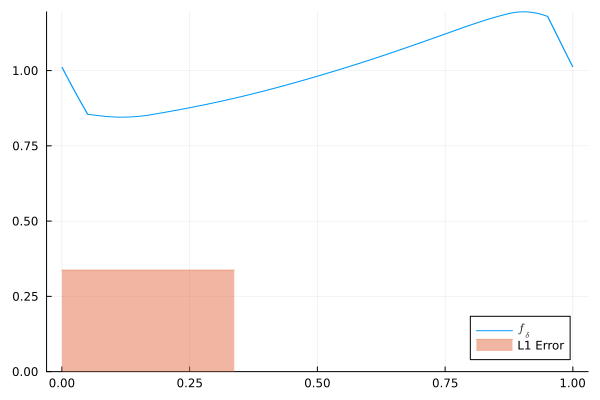

In [10]:
plot(B, w)
plot!(B, error_inv)

In [11]:
B_fine = Ulam(2^16)
Q_fine = DiscretizedOperator(B_fine, D)
NK_fine = UniformNoiseUlam(0.05, B_fine)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/ru6qX/src/GenericAssembler.jl:102


RigorousInvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}(Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 65537)), [0.05, 0.0500001], [8.000000000994987, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 8.000000000994987], 3.987224772572517e-9, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [12]:
@time fine_norms = finepowernormboundsnoise(B, B_fine, norms; Qfine = Q_fine, NKfine=NK_fine)

  0.072030 seconds (52.77 k allocations: 3.560 MiB, 98.03% compilation time)


65-element Vector{Float64}:
 1.0000000046711648
 1.0000000093423296
 1.0000000140134944
 1.0000000186846592
 1.000000023355824
 0.4989105382029884
 0.24644196876538407
 0.12606938669680476
 0.0824802924587731
 0.08248029284405214
 ⋮
 3.148481597805953e-7
 2.1664495734813038e-7
 1.4173892576130942e-7
 9.273201334516708e-8
 6.066947560707128e-8
 3.969271384992363e-8
 2.5968767934896847e-8
 2.5968768056201243e-8
 2.596876817750564e-8

In [13]:
@time w_fine = invariant_vector_noise(B_fine, Q_fine, NK_fine)

  3.521605 seconds (7.20 M allocations: 32.248 GiB, 15.28% gc time)


65536-element Vector{Float64}:
 1.0091454624241365
 1.0090953514169698
 1.0090452422740221
 1.0089951339328318
 1.0089450283101598
 1.008894924275102
 1.0088448206133631
 1.00879472083476
 1.0087446209849202
 1.008694523069777
 ⋮
 1.0095965376423903
 1.0095464116323647
 1.0094962872925597
 1.0094461639778152
 1.0093960433421796
 1.0093459236488447
 1.009295805743587
 1.0092456896868789
 1.009195575271459

In [14]:
@time error_fine = distance_from_invariant_noise(B_fine, Q_fine, NK_fine, w_fine, fine_norms)

  0.370418 seconds (720.41 k allocations: 3.231 GiB, 15.04% gc time)


0.0023700582633681393

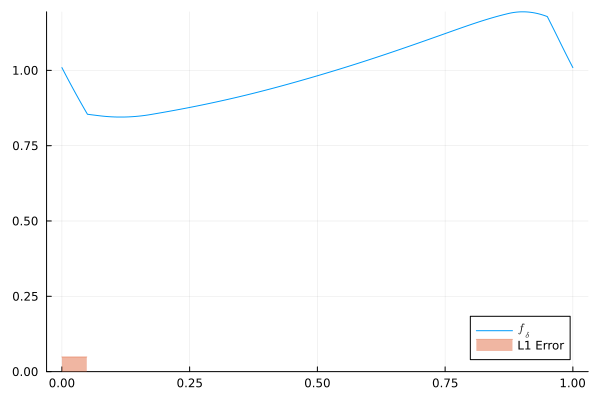

In [15]:
plot(B_fine, w_fine)
plot!(B_fine, error_fine)

In [16]:
logder = discretizationlogder(B_fine, D)

Observable(Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 65537)), Interval{Float64}[[0.916287, 0.916288], [0.916281, 0.916282], [0.916275, 0.916276], [0.916269, 0.91627], [0.916263, 0.916264], [0.916257, 0.916258], [0.916251, 0.916252], [0.916244, 0.916245], [0.916238, 0.916239], [0.916232, 0.916233]  …  [0.405561, 0.405562], [0.405551, 0.405552], [0.405541, 0.405542], [0.405531, 0.405532], [0.405521, 0.405522], [0.40551, 0.405511], [0.4055, 0.405501], [0.40549, 0.405491], [0.40548, 0.405481], [0.40547, 0.405471]], [0.405465, 0.916291])

In [17]:
integrateobservable(B_fine, logder, w_fine, error_fine)

[0.664379, 0.668723]

When dealing with random systems with additive noise, we can estimate explict bounds for the $L^1$ norm of the operator $L_{\xi}$ acting on the space of average $0$ measures.

In [18]:
abstract_norms = abstractpowernormboundsnoise(B, NK, norms)

65-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 0.4989105376328927
 0.2464419679572786
 0.12606938563623618
 0.08248029113993326
 0.08248029113993326
 ⋮
 3.1484812516240053e-7
 2.1664494130721715e-7
 1.4173891419263763e-7
 9.273200507377198e-8
 6.06694697358472e-8
 3.969270970794463e-8
 2.5968765028256943e-8
 2.5968765028256943e-8
 2.5968765028256943e-8

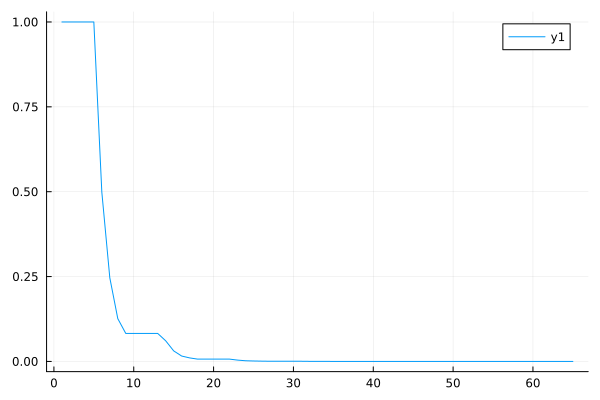

In [19]:
plot(abstract_norms)

# A more complicated example

Now we will analyze an example that come from the family of examples introduced in [Nisoli I. - How does noise induce order](https://arxiv.org/abs/2003.08422) where it is introduced a family of maps such that the associated random dynamical system with BV noise and periodic boundary shows a transition of the Lyapunov exponent from positive to negative as the noise size increases.
This is a phenomenon strictly connected to non-uniform expanding systems, the addition of noise makes the system visit the contracting part of the system with higher frequence.

The argument in the paper is purely analytical and does not use computer assisted tools. 
It relies on the idea that for really large noise, the stationary measure of the system is near to the uniform measure in $BV$ norm.

Today we will confirm the results of the paper, proving this transition through a computer assisted proof.

The family of maps is of the form
$$ 
T_{\alpha, \beta}(x) = 2\beta |x|^{\alpha}-1
$$
these are systems on $[-1, 1]$; we will make a coordinate change so they are systems on $[0,1]$, but as $\alpha$ grows, the Lebesgue measure of the contracting part grows.

The image below shows a numerical experiment, nonrigorous, where we plot the Lyapunov exponent as a function of the noise size (on the $x$ axis) and the exponent $\alpha$, on the $y$ axis.

![Lyapunov exponents as a function of noise size and $\alpha$,](lyapcontourscolor.png)

We will study the map with $\beta=1$, $\alpha=4$ at noise size $0.05$ and $0.4$, to prove the transition of the Lyapunov exponent from positive to negative.

In [20]:
using Plots

We will start by using the PwMap method...

In [21]:
D = PwMap([x->1-2^4*(0.5-x)^5, x->1-2^4*(x-0.5)^5], 
                                         [Interval(0), Interval(0.5), Interval(1)], 
                                         [0 1;
                                          1 0])

Piecewise-defined dynamic with 2 branches

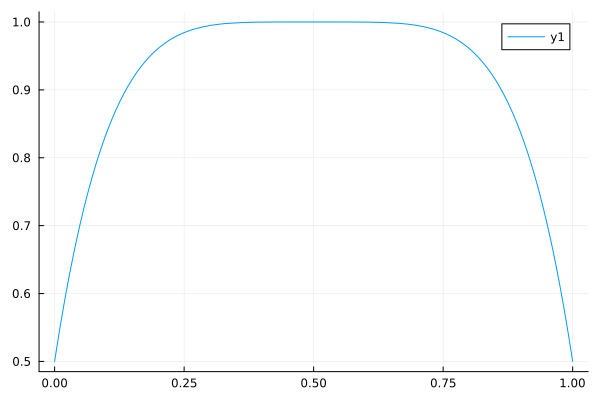

In [22]:
plot(D, 0, 1) 

In [23]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

In [24]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/ru6qX/src/GenericAssembler.jl:102


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  251, 252, 253, 254, 255, 513, 514, 515, 516, 517], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,

We will define now the Noise Kernel, remark that we can use the same Ulam discretization with different Noise Kernels. This is useful, since we want to study the effect of different sizes of noise with the same underlying dynamics.

In [25]:
NK = UniformNoiseUlam(0.05, B) 

RigorousInvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}(Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025)), [0.05, 0.0500001], [2.0000000000019327, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 2.0000000000019327], 7.73070496506989e-12, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [26]:
norms = powernormboundsnoise(B; Q=Q, NK=NK)

Progress:   1%|▋                                        |  ETA: 0:00:07

Progress:   3%|█▍                                       |  ETA: 0:00:06

Progress:   5%|██                                       |  ETA: 0:00:06

Progress:   7%|██▋                                      |  ETA: 0:00:06

Progress:   8%|███▍                                     |  ETA: 0:00:06

Progress:  10%|████                                     |  ETA: 0:00:06

Progress:  12%|████▊                                    |  ETA: 0:00:06

Progress:  13%|█████▍                                   |  ETA: 0:00:05

Progress:  15%|██████▏                                  |  ETA: 0:00:05

Progress:  17%|██████▊                                  |  ETA: 0:00:05

Progress:  18%|███████▌                                 |  ETA: 0:00:05

Progress:  20%|████████▏                                |  ETA: 0:00:05

Progress:  22%|████████▉                                |  ETA: 0:00:05

Progress:  23%|█████████▌                               |  ETA: 0:00:05

Progress:  25%|██████████▎                              |  ETA: 0:00:05

Progress:  27%|██████████▉                              |  ETA: 0:00:05

Progress:  28%|███████████▋                             |  ETA: 0:00:04

Progress:  30%|████████████▎                            |  ETA: 0:00:04

Progress:  32%|█████████████                            |  ETA: 0:00:04

Progress:  33%|█████████████▋                           |  ETA: 0:00:04

Progress:  35%|██████████████▎                          |  ETA: 0:00:04

Progress:  37%|███████████████                          |  ETA: 0:00:04

Progress:  38%|███████████████▋                         |  ETA: 0:00:04

Progress:  40%|████████████████▍                        |  ETA: 0:00:04

Progress:  42%|█████████████████                        |  ETA: 0:00:04

Progress:  43%|█████████████████▊                       |  ETA: 0:00:04

Progress:  45%|██████████████████▍                      |  ETA: 0:00:03

Progress:  47%|███████████████████▏                     |  ETA: 0:00:03

Progress:  48%|███████████████████▊                     |  ETA: 0:00:03

Progress:  50%|████████████████████▌                    |  ETA: 0:00:03

Progress:  52%|█████████████████████▏                   |  ETA: 0:00:03

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:03

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:03

Progress:  57%|███████████████████████▎                 |  ETA: 0:00:03

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:03

Progress:  60%|████████████████████████▋                |  ETA: 0:00:02

Progress:  62%|█████████████████████████▎               |  ETA: 0:00:02

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:02

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:02

Progress:  67%|███████████████████████████▎             |  ETA: 0:00:02

Progress:  68%|████████████████████████████             |  ETA: 0:00:02

Progress:  70%|████████████████████████████▋            |  ETA: 0:00:02

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:02

Progress:  73%|██████████████████████████████           |  ETA: 0:00:02

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:02

Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:01

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:01

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:01

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:01

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:01

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:01

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:01

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:01

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:01

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:00

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:00

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:00

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


Progress:   1%|▍                                        |  ETA: 0:00:13

Progress:   2%|▊                                        |  ETA: 0:00:12

Progress:   3%|█▏                                       |  ETA: 0:00:12

Progress:   4%|█▌                                       |  ETA: 0:00:12

Progress:   4%|█▊                                       |  ETA: 0:00:12

Progress:   5%|██▏                                      |  ETA: 0:00:12

Progress:   6%|██▌                                      |  ETA: 0:00:12

Progress:   7%|██▉                                      |  ETA: 0:00:12

Progress:   8%|███▎                                     |  ETA: 0:00:11

Progress:   9%|███▋                                     |  ETA: 0:00:11

Progress:  10%|████                                     |  ETA: 0:00:11

Progress:  11%|████▍                                    |  ETA: 0:00:11

Progress:  11%|████▊                                    |  ETA: 0:00:11

Progress:  12%|█████                                    |  ETA: 0:00:11

Progress:  13%|█████▍                                   |  ETA: 0:00:11

Progress:  14%|█████▊                                   |  ETA: 0:00:11

Progress:  15%|██████▏                                  |  ETA: 0:00:11

Progress:  16%|██████▌                                  |  ETA: 0:00:10

Progress:  17%|██████▉                                  |  ETA: 0:00:10

Progress:  18%|███████▎                                 |  ETA: 0:00:10

Progress:  18%|███████▋                                 |  ETA: 0:00:10

Progress:  19%|███████▉                                 |  ETA: 0:00:10

Progress:  20%|████████▎                                |  ETA: 0:00:10

Progress:  21%|████████▋                                |  ETA: 0:00:10

Progress:  22%|█████████                                |  ETA: 0:00:10

Progress:  23%|█████████▍                               |  ETA: 0:00:10

Progress:  24%|█████████▊                               |  ETA: 0:00:09

Progress:  25%|██████████▏                              |  ETA: 0:00:09

Progress:  26%|██████████▌                              |  ETA: 0:00:09

Progress:  26%|██████████▉                              |  ETA: 0:00:09

Progress:  27%|███████████▏                             |  ETA: 0:00:09

Progress:  28%|███████████▌                             |  ETA: 0:00:09

Progress:  29%|███████████▉                             |  ETA: 0:00:09

Progress:  30%|████████████▎                            |  ETA: 0:00:09

Progress:  31%|████████████▋                            |  ETA: 0:00:09

Progress:  32%|█████████████                            |  ETA: 0:00:09

Progress:  32%|█████████████▎                           |  ETA: 0:00:08

Progress:  33%|█████████████▋                           |  ETA: 0:00:08

Progress:  34%|██████████████                           |  ETA: 0:00:08

Progress:  35%|██████████████▍                          |  ETA: 0:00:08

Progress:  36%|██████████████▊                          |  ETA: 0:00:08

Progress:  37%|███████████████▏                         |  ETA: 0:00:08

Progress:  38%|███████████████▌                         |  ETA: 0:00:08

Progress:  39%|███████████████▉                         |  ETA: 0:00:08

Progress:  39%|████████████████▎                        |  ETA: 0:00:08

Progress:  40%|████████████████▌                        |  ETA: 0:00:07

Progress:  41%|████████████████▉                        |  ETA: 0:00:07

Progress:  42%|█████████████████▎                       |  ETA: 0:00:07

Progress:  43%|█████████████████▋                       |  ETA: 0:00:07

Progress:  44%|██████████████████                       |  ETA: 0:00:07

Progress:  45%|██████████████████▍                      |  ETA: 0:00:07

Progress:  46%|██████████████████▊                      |  ETA: 0:00:07

Progress:  47%|███████████████████▏                     |  ETA: 0:00:07

Progress:  47%|███████████████████▌                     |  ETA: 0:00:07

Progress:  48%|███████████████████▊                     |  ETA: 0:00:06

Progress:  49%|████████████████████▏                    |  ETA: 0:00:06

Progress:  50%|████████████████████▌                    |  ETA: 0:00:06

Progress:  51%|████████████████████▉                    |  ETA: 0:00:06

Progress:  52%|█████████████████████▎                   |  ETA: 0:00:06

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:06

Progress:  54%|██████████████████████                   |  ETA: 0:00:06

Progress:  54%|██████████████████████▍                  |  ETA: 0:00:06

Progress:  55%|██████████████████████▋                  |  ETA: 0:00:06

Progress:  56%|███████████████████████                  |  ETA: 0:00:05

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:05

Progress:  58%|███████████████████████▊                 |  ETA: 0:00:05

Progress:  59%|████████████████████████▏                |  ETA: 0:00:05

Progress:  60%|████████████████████████▌                |  ETA: 0:00:05

Progress:  61%|████████████████████████▉                |  ETA: 0:00:05

Progress:  61%|█████████████████████████▎               |  ETA: 0:00:05

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:05

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:05

Progress:  64%|██████████████████████████▎              |  ETA: 0:00:04

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:04

Progress:  66%|███████████████████████████              |  ETA: 0:00:04

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:04

Progress:  68%|███████████████████████████▊             |  ETA: 0:00:04

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:04

Progress:  69%|████████████████████████████▌            |  ETA: 0:00:04

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:04

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:04

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:03

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:03

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:03

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:03

Progress:  76%|███████████████████████████████          |  ETA: 0:00:03

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:03

Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:03

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:03

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:03

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:03

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:02

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:02

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:02

Progress:  83%|██████████████████████████████████▎      |  ETA: 0:00:02

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:02

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:02

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:02

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:02

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:02

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:01

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:01

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:01

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:01

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:01

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:01

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:01

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:01

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:01

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:00

Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:00

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


Progress:   0%|▎                                        |  ETA: 0:00:24

Progress:   1%|▍                                        |  ETA: 0:00:25

Progress:   1%|▋                                        |  ETA: 0:00:25

Progress:   2%|▊                                        |  ETA: 0:00:24

Progress:   2%|█                                        |  ETA: 0:00:24

Progress:   3%|█▎                                       |  ETA: 0:00:24

Progress:   3%|█▍                                       |  ETA: 0:00:24

Progress:   4%|█▋                                       |  ETA: 0:00:24

Progress:   4%|█▊                                       |  ETA: 0:00:24

Progress:   5%|██                                       |  ETA: 0:00:24

Progress:   5%|██▎                                      |  ETA: 0:00:24

Progress:   6%|██▍                                      |  ETA: 0:00:24

Progress:   6%|██▋                                      |  ETA: 0:00:24

Progress:   7%|██▊                                      |  ETA: 0:00:23

Progress:   7%|███                                      |  ETA: 0:00:23

Progress:   8%|███▎                                     |  ETA: 0:00:23

Progress:   8%|███▍                                     |  ETA: 0:00:23

Progress:   9%|███▋                                     |  ETA: 0:00:23

Progress:   9%|███▊                                     |  ETA: 0:00:23

Progress:  10%|████                                     |  ETA: 0:00:23

Progress:  10%|████▎                                    |  ETA: 0:00:23

Progress:  11%|████▍                                    |  ETA: 0:00:22

Progress:  11%|████▋                                    |  ETA: 0:00:22

Progress:  12%|████▊                                    |  ETA: 0:00:22

Progress:  12%|█████                                    |  ETA: 0:00:22

Progress:  13%|█████▎                                   |  ETA: 0:00:22

Progress:  13%|█████▍                                   |  ETA: 0:00:22

Progress:  14%|█████▋                                   |  ETA: 0:00:22

Progress:  14%|█████▊                                   |  ETA: 0:00:22

Progress:  15%|██████                                   |  ETA: 0:00:21

Progress:  15%|██████▎                                  |  ETA: 0:00:21

Progress:  16%|██████▍                                  |  ETA: 0:00:21

Progress:  16%|██████▋                                  |  ETA: 0:00:21

Progress:  17%|██████▉                                  |  ETA: 0:00:21

Progress:  17%|███████                                  |  ETA: 0:00:21

Progress:  18%|███████▎                                 |  ETA: 0:00:21

Progress:  18%|███████▍                                 |  ETA: 0:00:21

Progress:  19%|███████▋                                 |  ETA: 0:00:20

Progress:  19%|███████▉                                 |  ETA: 0:00:20

Progress:  20%|████████                                 |  ETA: 0:00:20

Progress:  20%|████████▎                                |  ETA: 0:00:20

Progress:  20%|████████▍                                |  ETA: 0:00:20

Progress:  21%|████████▋                                |  ETA: 0:00:20

Progress:  21%|████████▊                                |  ETA: 0:00:20

Progress:  22%|█████████                                |  ETA: 0:00:20

Progress:  22%|█████████▏                               |  ETA: 0:00:20

Progress:  23%|█████████▍                               |  ETA: 0:00:19

Progress:  23%|█████████▋                               |  ETA: 0:00:19

Progress:  24%|█████████▊                               |  ETA: 0:00:19

Progress:  24%|██████████                               |  ETA: 0:00:19

Progress:  25%|██████████▏                              |  ETA: 0:00:19

Progress:  25%|██████████▍                              |  ETA: 0:00:19

Progress:  26%|██████████▋                              |  ETA: 0:00:19

Progress:  26%|██████████▊                              |  ETA: 0:00:19

Progress:  27%|███████████                              |  ETA: 0:00:18

Progress:  27%|███████████▏                             |  ETA: 0:00:18

Progress:  28%|███████████▍                             |  ETA: 0:00:18

Progress:  28%|███████████▋                             |  ETA: 0:00:18

Progress:  29%|███████████▊                             |  ETA: 0:00:18

Progress:  29%|████████████                             |  ETA: 0:00:18

Progress:  30%|████████████▏                            |  ETA: 0:00:18

Progress:  30%|████████████▍                            |  ETA: 0:00:18

Progress:  31%|████████████▋                            |  ETA: 0:00:17

Progress:  31%|████████████▊                            |  ETA: 0:00:17

Progress:  32%|█████████████                            |  ETA: 0:00:17

Progress:  32%|█████████████▏                           |  ETA: 0:00:17

Progress:  33%|█████████████▍                           |  ETA: 0:00:17

Progress:  33%|█████████████▋                           |  ETA: 0:00:17

Progress:  34%|█████████████▊                           |  ETA: 0:00:17

Progress:  34%|██████████████                           |  ETA: 0:00:17

Progress:  35%|██████████████▎                          |  ETA: 0:00:16

Progress:  35%|██████████████▍                          |  ETA: 0:00:16

Progress:  36%|██████████████▋                          |  ETA: 0:00:16

Progress:  36%|██████████████▊                          |  ETA: 0:00:16

Progress:  37%|███████████████                          |  ETA: 0:00:16

Progress:  37%|███████████████▎                         |  ETA: 0:00:16

Progress:  38%|███████████████▍                         |  ETA: 0:00:16

Progress:  38%|███████████████▋                         |  ETA: 0:00:16

Progress:  39%|███████████████▊                         |  ETA: 0:00:15

Progress:  39%|████████████████                         |  ETA: 0:00:15

Progress:  39%|████████████████▎                        |  ETA: 0:00:15

Progress:  40%|████████████████▍                        |  ETA: 0:00:15

Progress:  40%|████████████████▋                        |  ETA: 0:00:15

Progress:  41%|████████████████▊                        |  ETA: 0:00:15

Progress:  41%|█████████████████                        |  ETA: 0:00:15

Progress:  42%|█████████████████▎                       |  ETA: 0:00:15

Progress:  42%|█████████████████▍                       |  ETA: 0:00:14

Progress:  43%|█████████████████▋                       |  ETA: 0:00:14

Progress:  43%|█████████████████▊                       |  ETA: 0:00:14

Progress:  44%|██████████████████                       |  ETA: 0:00:14

Progress:  44%|██████████████████▎                      |  ETA: 0:00:14

Progress:  45%|██████████████████▍                      |  ETA: 0:00:14

Progress:  45%|██████████████████▌                      |  ETA: 0:00:14

Progress:  46%|██████████████████▊                      |  ETA: 0:00:14

Progress:  46%|███████████████████                      |  ETA: 0:00:14

Progress:  47%|███████████████████▏                     |  ETA: 0:00:13

Progress:  47%|███████████████████▍                     |  ETA: 0:00:13

Progress:  48%|███████████████████▌                     |  ETA: 0:00:13

Progress:  48%|███████████████████▊                     |  ETA: 0:00:13

Progress:  49%|████████████████████                     |  ETA: 0:00:13

Progress:  49%|████████████████████▏                    |  ETA: 0:00:13

Progress:  50%|████████████████████▍                    |  ETA: 0:00:13

Progress:  50%|████████████████████▌                    |  ETA: 0:00:13

Progress:  51%|████████████████████▊                    |  ETA: 0:00:12

Progress:  51%|█████████████████████                    |  ETA: 0:00:12

Progress:  52%|█████████████████████▏                   |  ETA: 0:00:12

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:12

Progress:  53%|█████████████████████▌                   |  ETA: 0:00:12

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:12

Progress:  54%|██████████████████████                   |  ETA: 0:00:12

Progress:  54%|██████████████████████▏                  |  ETA: 0:00:12

Progress:  55%|██████████████████████▍                  |  ETA: 0:00:11

Progress:  55%|██████████████████████▋                  |  ETA: 0:00:11

Progress:  56%|██████████████████████▊                  |  ETA: 0:00:11

Progress:  56%|███████████████████████                  |  ETA: 0:00:11

Progress:  57%|███████████████████████▏                 |  ETA: 0:00:11

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:11

Progress:  57%|███████████████████████▋                 |  ETA: 0:00:11

Progress:  58%|███████████████████████▊                 |  ETA: 0:00:11

Progress:  58%|████████████████████████                 |  ETA: 0:00:10

Progress:  59%|████████████████████████▏                |  ETA: 0:00:10

Progress:  59%|████████████████████████▍                |  ETA: 0:00:10

Progress:  60%|████████████████████████▋                |  ETA: 0:00:10

Progress:  60%|████████████████████████▊                |  ETA: 0:00:10

Progress:  61%|████████████████████████▉                |  ETA: 0:00:10

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:10

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:10

Progress:  62%|█████████████████████████▌               |  ETA: 0:00:09

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:09

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:09

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:09

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:09

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:09

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:09

Progress:  66%|██████████████████████████▉              |  ETA: 0:00:09

Progress:  66%|███████████████████████████▏             |  ETA: 0:00:09

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:08

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:08

Progress:  68%|███████████████████████████▊             |  ETA: 0:00:08

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:08

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:08

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:08

Progress:  70%|████████████████████████████▌            |  ETA: 0:00:08

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:08

Progress:  71%|████████████████████████████▉            |  ETA: 0:00:07

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:07

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:07

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:07

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:07

Progress:  73%|██████████████████████████████           |  ETA: 0:00:07

Progress:  74%|██████████████████████████████▏          |  ETA: 0:00:07

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:07

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:06

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:06

Progress:  75%|███████████████████████████████          |  ETA: 0:00:06

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:06

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:06

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:06

Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:06

Progress:  78%|████████████████████████████████         |  ETA: 0:00:06

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:05

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:05

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:05

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:05

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:05

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:05

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:05

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:05

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:04

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:04

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:04

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:04

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:04

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:04

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:04

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:04

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:03

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:03

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:03

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:03

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:03

Progress:  89%|████████████████████████████████████▎    |  ETA: 0:00:03

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:03

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:03

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:03

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:02

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:02

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:02

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:02

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:02

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:02

Progress:  93%|██████████████████████████████████████▍  |  ETA: 0:00:02

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:02

Progress:  94%|██████████████████████████████████████▊  |  ETA: 0:00:01

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:01

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:01

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:01

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:01

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:01

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:00

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:25


Progress:   0%|▏                                        |  ETA: 0:00:50

Progress:   1%|▎                                        |  ETA: 0:00:50

Progress:   1%|▍                                        |  ETA: 0:00:50

Progress:   1%|▌                                        |  ETA: 0:00:50

Progress:   1%|▋                                        |  ETA: 0:00:50

Progress:   2%|▊                                        |  ETA: 0:00:49

Progress:   2%|▉                                        |  ETA: 0:00:49

Progress:   2%|█                                        |  ETA: 0:00:49

Progress:   3%|█▏                                       |  ETA: 0:00:49

Progress:   3%|█▎                                       |  ETA: 0:00:49

Progress:   3%|█▍                                       |  ETA: 0:00:49

Progress:   4%|█▌                                       |  ETA: 0:00:49

Progress:   4%|█▋                                       |  ETA: 0:00:48

Progress:   4%|█▋                                       |  ETA: 0:00:48

Progress:   4%|█▊                                       |  ETA: 0:00:48

Progress:   5%|█▉                                       |  ETA: 0:00:48

Progress:   5%|██                                       |  ETA: 0:00:48

Progress:   5%|██▏                                      |  ETA: 0:00:48

Progress:   6%|██▎                                      |  ETA: 0:00:47

Progress:   6%|██▍                                      |  ETA: 0:00:47

Progress:   6%|██▌                                      |  ETA: 0:00:47

Progress:   6%|██▋                                      |  ETA: 0:00:47

Progress:   7%|██▊                                      |  ETA: 0:00:47

Progress:   7%|██▉                                      |  ETA: 0:00:47

Progress:   7%|███                                      |  ETA: 0:00:47

Progress:   8%|███▏                                     |  ETA: 0:00:46

Progress:   8%|███▎                                     |  ETA: 0:00:46

Progress:   8%|███▍                                     |  ETA: 0:00:46

Progress:   9%|███▌                                     |  ETA: 0:00:46

Progress:   9%|███▋                                     |  ETA: 0:00:46

Progress:   9%|███▋                                     |  ETA: 0:00:46

Progress:   9%|███▊                                     |  ETA: 0:00:46

Progress:  10%|███▉                                     |  ETA: 0:00:46

Progress:  10%|████                                     |  ETA: 0:00:45

Progress:  10%|████▏                                    |  ETA: 0:00:45

Progress:  10%|████▎                                    |  ETA: 0:00:45

Progress:  11%|████▍                                    |  ETA: 0:00:45

Progress:  11%|████▌                                    |  ETA: 0:00:45

Progress:  11%|████▋                                    |  ETA: 0:00:45

Progress:  12%|████▊                                    |  ETA: 0:00:44

Progress:  12%|████▉                                    |  ETA: 0:00:44

Progress:  12%|█████                                    |  ETA: 0:00:44

Progress:  13%|█████▏                                   |  ETA: 0:00:44

Progress:  13%|█████▎                                   |  ETA: 0:00:44

Progress:  13%|█████▍                                   |  ETA: 0:00:44

Progress:  13%|█████▌                                   |  ETA: 0:00:44

Progress:  14%|█████▋                                   |  ETA: 0:00:43

Progress:  14%|█████▊                                   |  ETA: 0:00:43

Progress:  14%|█████▉                                   |  ETA: 0:00:43

Progress:  15%|██████                                   |  ETA: 0:00:43

Progress:  15%|██████▏                                  |  ETA: 0:00:43

Progress:  15%|██████▎                                  |  ETA: 0:00:43

Progress:  15%|██████▍                                  |  ETA: 0:00:43

Progress:  16%|██████▌                                  |  ETA: 0:00:42

Progress:  16%|██████▋                                  |  ETA: 0:00:42

Progress:  16%|██████▊                                  |  ETA: 0:00:42

Progress:  17%|██████▉                                  |  ETA: 0:00:42

Progress:  17%|██████▉                                  |  ETA: 0:00:42

Progress:  17%|███████                                  |  ETA: 0:00:42

Progress:  17%|███████▏                                 |  ETA: 0:00:41

Progress:  18%|███████▎                                 |  ETA: 0:00:41

Progress:  18%|███████▍                                 |  ETA: 0:00:41

Progress:  18%|███████▌                                 |  ETA: 0:00:41

Progress:  19%|███████▋                                 |  ETA: 0:00:41

Progress:  19%|███████▊                                 |  ETA: 0:00:41

Progress:  19%|███████▉                                 |  ETA: 0:00:41

Progress:  19%|████████                                 |  ETA: 0:00:40

Progress:  20%|████████▏                                |  ETA: 0:00:40

Progress:  20%|████████▎                                |  ETA: 0:00:40

Progress:  20%|████████▍                                |  ETA: 0:00:40

Progress:  21%|████████▌                                |  ETA: 0:00:40

Progress:  21%|████████▋                                |  ETA: 0:00:40

Progress:  21%|████████▊                                |  ETA: 0:00:40

Progress:  22%|████████▉                                |  ETA: 0:00:39

Progress:  22%|████████▉                                |  ETA: 0:00:39

Progress:  22%|█████████                                |  ETA: 0:00:39

Progress:  22%|█████████▏                               |  ETA: 0:00:39

Progress:  23%|█████████▎                               |  ETA: 0:00:39

Progress:  23%|█████████▍                               |  ETA: 0:00:39

Progress:  23%|█████████▌                               |  ETA: 0:00:39

Progress:  24%|█████████▋                               |  ETA: 0:00:38

Progress:  24%|█████████▊                               |  ETA: 0:00:38

Progress:  24%|█████████▉                               |  ETA: 0:00:38

Progress:  24%|██████████                               |  ETA: 0:00:38

Progress:  25%|██████████▏                              |  ETA: 0:00:38

Progress:  25%|██████████▎                              |  ETA: 0:00:38

Progress:  25%|██████████▍                              |  ETA: 0:00:38

Progress:  26%|██████████▌                              |  ETA: 0:00:37

Progress:  26%|██████████▋                              |  ETA: 0:00:37

Progress:  26%|██████████▊                              |  ETA: 0:00:37

Progress:  26%|██████████▉                              |  ETA: 0:00:37

Progress:  27%|███████████                              |  ETA: 0:00:37

Progress:  27%|███████████                              |  ETA: 0:00:37

Progress:  27%|███████████▏                             |  ETA: 0:00:37

Progress:  28%|███████████▎                             |  ETA: 0:00:36

Progress:  28%|███████████▍                             |  ETA: 0:00:36

Progress:  28%|███████████▌                             |  ETA: 0:00:36

Progress:  28%|███████████▋                             |  ETA: 0:00:36

Progress:  29%|███████████▊                             |  ETA: 0:00:36

Progress:  29%|███████████▉                             |  ETA: 0:00:36

Progress:  29%|████████████                             |  ETA: 0:00:36

Progress:  30%|████████████▏                            |  ETA: 0:00:35

Progress:  30%|████████████▎                            |  ETA: 0:00:35

Progress:  30%|████████████▍                            |  ETA: 0:00:35

Progress:  30%|████████████▌                            |  ETA: 0:00:35

Progress:  31%|████████████▋                            |  ETA: 0:00:35

Progress:  31%|████████████▊                            |  ETA: 0:00:35

Progress:  31%|████████████▉                            |  ETA: 0:00:34

Progress:  32%|█████████████                            |  ETA: 0:00:34

Progress:  32%|█████████████▏                           |  ETA: 0:00:34

Progress:  32%|█████████████▎                           |  ETA: 0:00:34

Progress:  33%|█████████████▍                           |  ETA: 0:00:34

Progress:  33%|█████████████▌                           |  ETA: 0:00:34

Progress:  33%|█████████████▋                           |  ETA: 0:00:34

Progress:  33%|█████████████▊                           |  ETA: 0:00:33

Progress:  34%|█████████████▉                           |  ETA: 0:00:33

Progress:  34%|██████████████                           |  ETA: 0:00:33

Progress:  34%|██████████████▏                          |  ETA: 0:00:33

Progress:  35%|██████████████▎                          |  ETA: 0:00:33

Progress:  35%|██████████████▎                          |  ETA: 0:00:33

Progress:  35%|██████████████▍                          |  ETA: 0:00:33

Progress:  35%|██████████████▌                          |  ETA: 0:00:32

Progress:  36%|██████████████▋                          |  ETA: 0:00:32

Progress:  36%|██████████████▊                          |  ETA: 0:00:32

Progress:  36%|██████████████▉                          |  ETA: 0:00:32

Progress:  37%|███████████████                          |  ETA: 0:00:32

Progress:  37%|███████████████▏                         |  ETA: 0:00:32

Progress:  37%|███████████████▎                         |  ETA: 0:00:32

Progress:  37%|███████████████▍                         |  ETA: 0:00:31

Progress:  38%|███████████████▌                         |  ETA: 0:00:31

Progress:  38%|███████████████▋                         |  ETA: 0:00:31

Progress:  38%|███████████████▊                         |  ETA: 0:00:31

Progress:  39%|███████████████▉                         |  ETA: 0:00:31

Progress:  39%|████████████████                         |  ETA: 0:00:31

Progress:  39%|████████████████▏                        |  ETA: 0:00:31

Progress:  39%|████████████████▎                        |  ETA: 0:00:30

Progress:  40%|████████████████▎                        |  ETA: 0:00:30

Progress:  40%|████████████████▍                        |  ETA: 0:00:30

Progress:  40%|████████████████▌                        |  ETA: 0:00:30

Progress:  41%|████████████████▋                        |  ETA: 0:00:30

Progress:  41%|████████████████▊                        |  ETA: 0:00:30

Progress:  41%|████████████████▉                        |  ETA: 0:00:29

Progress:  42%|█████████████████                        |  ETA: 0:00:29

Progress:  42%|█████████████████▏                       |  ETA: 0:00:29

Progress:  42%|█████████████████▎                       |  ETA: 0:00:29

Progress:  42%|█████████████████▍                       |  ETA: 0:00:29

Progress:  43%|█████████████████▌                       |  ETA: 0:00:29

Progress:  43%|█████████████████▋                       |  ETA: 0:00:29

Progress:  43%|█████████████████▊                       |  ETA: 0:00:28

Progress:  43%|█████████████████▉                       |  ETA: 0:00:28

Progress:  44%|██████████████████                       |  ETA: 0:00:28

Progress:  44%|██████████████████▏                      |  ETA: 0:00:28

Progress:  44%|██████████████████▎                      |  ETA: 0:00:28

Progress:  45%|██████████████████▍                      |  ETA: 0:00:28

Progress:  45%|██████████████████▍                      |  ETA: 0:00:28

Progress:  45%|██████████████████▌                      |  ETA: 0:00:27

Progress:  46%|██████████████████▋                      |  ETA: 0:00:27

Progress:  46%|██████████████████▊                      |  ETA: 0:00:27

Progress:  46%|██████████████████▉                      |  ETA: 0:00:27

Progress:  46%|███████████████████                      |  ETA: 0:00:27

Progress:  47%|███████████████████▏                     |  ETA: 0:00:27

Progress:  47%|███████████████████▎                     |  ETA: 0:00:27

Progress:  47%|███████████████████▍                     |  ETA: 0:00:26

Progress:  48%|███████████████████▌                     |  ETA: 0:00:26

Progress:  48%|███████████████████▋                     |  ETA: 0:00:26

Progress:  48%|███████████████████▊                     |  ETA: 0:00:26

Progress:  48%|███████████████████▉                     |  ETA: 0:00:26

Progress:  49%|████████████████████                     |  ETA: 0:00:26

Progress:  49%|████████████████████▏                    |  ETA: 0:00:26

Progress:  49%|████████████████████▎                    |  ETA: 0:00:25

Progress:  50%|████████████████████▍                    |  ETA: 0:00:25

Progress:  50%|████████████████████▌                    |  ETA: 0:00:25

Progress:  50%|████████████████████▋                    |  ETA: 0:00:25

Progress:  51%|████████████████████▊                    |  ETA: 0:00:25

Progress:  51%|████████████████████▉                    |  ETA: 0:00:25

Progress:  51%|█████████████████████                    |  ETA: 0:00:25

Progress:  51%|█████████████████████                    |  ETA: 0:00:24

Progress:  52%|█████████████████████▏                   |  ETA: 0:00:24

Progress:  52%|█████████████████████▎                   |  ETA: 0:00:24

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:24

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:24

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:24

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:24

Progress:  53%|█████████████████████▉                   |  ETA: 0:00:23

Progress:  54%|██████████████████████                   |  ETA: 0:00:23

Progress:  54%|██████████████████████▏                  |  ETA: 0:00:23

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:23

Progress:  55%|██████████████████████▍                  |  ETA: 0:00:23

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:23

Progress:  55%|██████████████████████▋                  |  ETA: 0:00:23

Progress:  55%|██████████████████████▊                  |  ETA: 0:00:22

Progress:  56%|██████████████████████▉                  |  ETA: 0:00:22

Progress:  56%|███████████████████████                  |  ETA: 0:00:22

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:22

Progress:  57%|███████████████████████▎                 |  ETA: 0:00:22

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:22

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:21

Progress:  57%|███████████████████████▋                 |  ETA: 0:00:21

Progress:  58%|███████████████████████▋                 |  ETA: 0:00:21

Progress:  58%|███████████████████████▊                 |  ETA: 0:00:21

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:21

Progress:  59%|████████████████████████                 |  ETA: 0:00:21

Progress:  59%|████████████████████████▏                |  ETA: 0:00:21

Progress:  59%|████████████████████████▎                |  ETA: 0:00:21

Progress:  59%|████████████████████████▍                |  ETA: 0:00:20

Progress:  60%|████████████████████████▌                |  ETA: 0:00:20

Progress:  60%|████████████████████████▋                |  ETA: 0:00:20

Progress:  60%|████████████████████████▊                |  ETA: 0:00:20

Progress:  61%|████████████████████████▉                |  ETA: 0:00:20

Progress:  61%|█████████████████████████                |  ETA: 0:00:20

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:19

Progress:  61%|█████████████████████████▎               |  ETA: 0:00:19

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:19

Progress:  62%|█████████████████████████▌               |  ETA: 0:00:19

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:19

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:19

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:19

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:18

Progress:  64%|██████████████████████████               |  ETA: 0:00:18

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:18

Progress:  64%|██████████████████████████▎              |  ETA: 0:00:18

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:18

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:18

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:18

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:17

Progress:  66%|██████████████████████████▉              |  ETA: 0:00:17

Progress:  66%|███████████████████████████              |  ETA: 0:00:17

Progress:  66%|███████████████████████████▏             |  ETA: 0:00:17

Progress:  66%|███████████████████████████▎             |  ETA: 0:00:17

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:17

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:17

Progress:  67%|███████████████████████████▋             |  ETA: 0:00:16

Progress:  68%|███████████████████████████▊             |  ETA: 0:00:16

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:16

Progress:  68%|████████████████████████████             |  ETA: 0:00:16

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:16

Progress:  69%|████████████████████████████▎            |  ETA: 0:00:16

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:15

Progress:  69%|████████████████████████████▌            |  ETA: 0:00:15

Progress:  70%|████████████████████████████▋            |  ETA: 0:00:15

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:15

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:15

Progress:  71%|████████████████████████████▉            |  ETA: 0:00:15

Progress:  71%|█████████████████████████████            |  ETA: 0:00:15

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:14

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:14

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:14

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:14

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:14

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:14

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:14

Progress:  73%|██████████████████████████████           |  ETA: 0:00:13

Progress:  73%|██████████████████████████████▏          |  ETA: 0:00:13

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:13

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:13

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:13

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:13

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:13

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:12

Progress:  75%|███████████████████████████████          |  ETA: 0:00:12

Progress:  76%|███████████████████████████████          |  ETA: 0:00:12

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:12

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:12

Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:12

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:12

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:11

Progress:  78%|███████████████████████████████▊         |  ETA: 0:00:11

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:11

Progress:  78%|████████████████████████████████         |  ETA: 0:00:11

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:11

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:11

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:11

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:10

Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:10

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:10

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:10

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:10

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:10

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:10

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:09

Progress:  82%|█████████████████████████████████▍       |  ETA: 0:00:09

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:09

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:09

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:09

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:09

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:09

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:08

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:08

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:08

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:08

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:08

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:08

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:07

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:07

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:07

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:07

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:07

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:07

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:07

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:07

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:06

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:06

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:06

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:06

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:06

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:06

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:05

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:05

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:05

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:05

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:05

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:05

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:05

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:04

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:04

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:04

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:04

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:04

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:04

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:04

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:03

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:03

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:03

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:03

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:03

Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:03

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:03

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:02

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:01

Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:00

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:50


Progress:   0%|▏                                        |  ETA: 0:01:40

Progress:   0%|▏                                        |  ETA: 0:01:39

Progress:   1%|▎                                        |  ETA: 0:01:39

Progress:   1%|▍                                        |  ETA: 0:01:39

Progress:   1%|▍                                        |  ETA: 0:01:39

Progress:   1%|▌                                        |  ETA: 0:01:38

Progress:   1%|▌                                        |  ETA: 0:01:38

Progress:   2%|▋                                        |  ETA: 0:01:38

Progress:   2%|▊                                        |  ETA: 0:01:38

Progress:   2%|▊                                        |  ETA: 0:01:38

Progress:   2%|▉                                        |  ETA: 0:01:38

Progress:   2%|█                                        |  ETA: 0:01:37

Progress:   3%|█                                        |  ETA: 0:01:37

Progress:   3%|█▏                                       |  ETA: 0:01:37

Progress:   3%|█▎                                       |  ETA: 0:01:37

Progress:   3%|█▎                                       |  ETA: 0:01:36

Progress:   3%|█▍                                       |  ETA: 0:01:36

Progress:   4%|█▌                                       |  ETA: 0:01:36

Progress:   4%|█▌                                       |  ETA: 0:01:36

Progress:   4%|█▋                                       |  ETA: 0:01:36

Progress:   4%|█▋                                       |  ETA: 0:01:36

Progress:   4%|█▊                                       |  ETA: 0:01:36

Progress:   4%|█▊                                       |  ETA: 0:01:35

Progress:   5%|█▉                                       |  ETA: 0:01:35

Progress:   5%|██                                       |  ETA: 0:01:35

Progress:   5%|██                                       |  ETA: 0:01:35

Progress:   5%|██▏                                      |  ETA: 0:01:35

Progress:   5%|██▎                                      |  ETA: 0:01:34

Progress:   6%|██▎                                      |  ETA: 0:01:34

Progress:   6%|██▍                                      |  ETA: 0:01:34

Progress:   6%|██▌                                      |  ETA: 0:01:34

Progress:   6%|██▌                                      |  ETA: 0:01:33

Progress:   6%|██▋                                      |  ETA: 0:01:33

Progress:   7%|██▋                                      |  ETA: 0:01:33

Progress:   7%|██▊                                      |  ETA: 0:01:33

Progress:   7%|██▉                                      |  ETA: 0:01:33

Progress:   7%|██▉                                      |  ETA: 0:01:32

Progress:   7%|███                                      |  ETA: 0:01:32

Progress:   8%|███▏                                     |  ETA: 0:01:32

Progress:   8%|███▏                                     |  ETA: 0:01:32

Progress:   8%|███▎                                     |  ETA: 0:01:32

Progress:   8%|███▎                                     |  ETA: 0:01:32

Progress:   8%|███▍                                     |  ETA: 0:01:32

Progress:   8%|███▌                                     |  ETA: 0:01:31

Progress:   9%|███▌                                     |  ETA: 0:01:31

Progress:   9%|███▋                                     |  ETA: 0:01:31

Progress:   9%|███▋                                     |  ETA: 0:01:31

Progress:   9%|███▊                                     |  ETA: 0:01:31

Progress:   9%|███▉                                     |  ETA: 0:01:30

Progress:  10%|███▉                                     |  ETA: 0:01:30

Progress:  10%|████                                     |  ETA: 0:01:30

Progress:  10%|████▏                                    |  ETA: 0:01:30

Progress:  10%|████▏                                    |  ETA: 0:01:30

Progress:  10%|████▎                                    |  ETA: 0:01:29

Progress:  11%|████▍                                    |  ETA: 0:01:29

Progress:  11%|████▍                                    |  ETA: 0:01:29

Progress:  11%|████▌                                    |  ETA: 0:01:29

Progress:  11%|████▋                                    |  ETA: 0:01:29

Progress:  11%|████▋                                    |  ETA: 0:01:28

Progress:  11%|████▊                                    |  ETA: 0:01:28

Progress:  12%|████▊                                    |  ETA: 0:01:28

Progress:  12%|████▉                                    |  ETA: 0:01:28

Progress:  12%|████▉                                    |  ETA: 0:01:28

Progress:  12%|█████                                    |  ETA: 0:01:28

Progress:  12%|█████▏                                   |  ETA: 0:01:28

Progress:  13%|█████▏                                   |  ETA: 0:01:27

Progress:  13%|█████▎                                   |  ETA: 0:01:27

Progress:  13%|█████▍                                   |  ETA: 0:01:27

Progress:  13%|█████▍                                   |  ETA: 0:01:27

Progress:  13%|█████▌                                   |  ETA: 0:01:27

Progress:  14%|█████▋                                   |  ETA: 0:01:26

Progress:  14%|█████▋                                   |  ETA: 0:01:26

Progress:  14%|█████▊                                   |  ETA: 0:01:26

Progress:  14%|█████▊                                   |  ETA: 0:01:26

Progress:  14%|█████▉                                   |  ETA: 0:01:26

Progress:  15%|██████                                   |  ETA: 0:01:25

Progress:  15%|██████                                   |  ETA: 0:01:25

Progress:  15%|██████▏                                  |  ETA: 0:01:25

Progress:  15%|██████▎                                  |  ETA: 0:01:25

Progress:  15%|██████▎                                  |  ETA: 0:01:25

Progress:  15%|██████▎                                  |  ETA: 0:01:25

Progress:  16%|██████▍                                  |  ETA: 0:01:25

Progress:  16%|██████▌                                  |  ETA: 0:01:24

Progress:  16%|██████▌                                  |  ETA: 0:01:24

Progress:  16%|██████▋                                  |  ETA: 0:01:24

Progress:  16%|██████▊                                  |  ETA: 0:01:24

Progress:  17%|██████▊                                  |  ETA: 0:01:24

Progress:  17%|██████▉                                  |  ETA: 0:01:23

Progress:  17%|██████▉                                  |  ETA: 0:01:23

Progress:  17%|███████                                  |  ETA: 0:01:23

Progress:  17%|███████▏                                 |  ETA: 0:01:23

Progress:  17%|███████▏                                 |  ETA: 0:01:23

Progress:  18%|███████▎                                 |  ETA: 0:01:22

Progress:  18%|███████▍                                 |  ETA: 0:01:22

Progress:  18%|███████▍                                 |  ETA: 0:01:22

Progress:  18%|███████▌                                 |  ETA: 0:01:22

Progress:  18%|███████▋                                 |  ETA: 0:01:22

Progress:  19%|███████▋                                 |  ETA: 0:01:21

Progress:  19%|███████▊                                 |  ETA: 0:01:21

Progress:  19%|███████▊                                 |  ETA: 0:01:21

Progress:  19%|███████▉                                 |  ETA: 0:01:21

Progress:  19%|███████▉                                 |  ETA: 0:01:21

Progress:  20%|████████                                 |  ETA: 0:01:21

Progress:  20%|████████▏                                |  ETA: 0:01:20

Progress:  20%|████████▏                                |  ETA: 0:01:20

Progress:  20%|████████▎                                |  ETA: 0:01:20

Progress:  20%|████████▍                                |  ETA: 0:01:20

Progress:  21%|████████▍                                |  ETA: 0:01:20

Progress:  21%|████████▌                                |  ETA: 0:01:19

Progress:  21%|████████▋                                |  ETA: 0:01:19

Progress:  21%|████████▋                                |  ETA: 0:01:19

Progress:  21%|████████▊                                |  ETA: 0:01:19

Progress:  22%|████████▉                                |  ETA: 0:01:19

Progress:  22%|████████▉                                |  ETA: 0:01:18

Progress:  22%|█████████                                |  ETA: 0:01:18

Progress:  22%|█████████                                |  ETA: 0:01:18

Progress:  22%|█████████▏                               |  ETA: 0:01:18

Progress:  22%|█████████▎                               |  ETA: 0:01:18

Progress:  23%|█████████▎                               |  ETA: 0:01:18

Progress:  23%|█████████▍                               |  ETA: 0:01:17

Progress:  23%|█████████▍                               |  ETA: 0:01:17

Progress:  23%|█████████▌                               |  ETA: 0:01:17

Progress:  23%|█████████▋                               |  ETA: 0:01:17

Progress:  24%|█████████▋                               |  ETA: 0:01:17

Progress:  24%|█████████▊                               |  ETA: 0:01:16

Progress:  24%|█████████▉                               |  ETA: 0:01:16

Progress:  24%|█████████▉                               |  ETA: 0:01:16

Progress:  24%|██████████                               |  ETA: 0:01:16

Progress:  25%|██████████                               |  ETA: 0:01:16

Progress:  25%|██████████▏                              |  ETA: 0:01:15

Progress:  25%|██████████▎                              |  ETA: 0:01:15

Progress:  25%|██████████▎                              |  ETA: 0:01:15

Progress:  25%|██████████▍                              |  ETA: 0:01:15

Progress:  26%|██████████▌                              |  ETA: 0:01:15

Progress:  26%|██████████▌                              |  ETA: 0:01:14

Progress:  26%|██████████▋                              |  ETA: 0:01:14

Progress:  26%|██████████▊                              |  ETA: 0:01:14

Progress:  26%|██████████▊                              |  ETA: 0:01:14

Progress:  26%|██████████▉                              |  ETA: 0:01:14

Progress:  27%|██████████▉                              |  ETA: 0:01:13

Progress:  27%|███████████                              |  ETA: 0:01:13

Progress:  27%|███████████                              |  ETA: 0:01:13

Progress:  27%|███████████▏                             |  ETA: 0:01:13

Progress:  27%|███████████▎                             |  ETA: 0:01:13

Progress:  28%|███████████▎                             |  ETA: 0:01:12

Progress:  28%|███████████▍                             |  ETA: 0:01:12

Progress:  28%|███████████▌                             |  ETA: 0:01:12

Progress:  28%|███████████▌                             |  ETA: 0:01:12

Progress:  28%|███████████▋                             |  ETA: 0:01:12

Progress:  29%|███████████▊                             |  ETA: 0:01:11

Progress:  29%|███████████▊                             |  ETA: 0:01:11

Progress:  29%|███████████▉                             |  ETA: 0:01:11

Progress:  29%|████████████                             |  ETA: 0:01:11

Progress:  29%|████████████                             |  ETA: 0:01:11

Progress:  30%|████████████▏                            |  ETA: 0:01:10

Progress:  30%|████████████▏                            |  ETA: 0:01:10

Progress:  30%|████████████▎                            |  ETA: 0:01:10

Progress:  30%|████████████▎                            |  ETA: 0:01:10

Progress:  30%|████████████▍                            |  ETA: 0:01:10

Progress:  30%|████████████▌                            |  ETA: 0:01:10

Progress:  31%|████████████▌                            |  ETA: 0:01:09

Progress:  31%|████████████▋                            |  ETA: 0:01:09

Progress:  31%|████████████▊                            |  ETA: 0:01:09

Progress:  31%|████████████▊                            |  ETA: 0:01:09

Progress:  31%|████████████▉                            |  ETA: 0:01:09

Progress:  32%|█████████████                            |  ETA: 0:01:08

Progress:  32%|█████████████                            |  ETA: 0:01:08

Progress:  32%|█████████████▏                           |  ETA: 0:01:08

Progress:  32%|█████████████▏                           |  ETA: 0:01:08

Progress:  32%|█████████████▎                           |  ETA: 0:01:08

Progress:  33%|█████████████▍                           |  ETA: 0:01:07

Progress:  33%|█████████████▍                           |  ETA: 0:01:07

Progress:  33%|█████████████▌                           |  ETA: 0:01:07

Progress:  33%|█████████████▋                           |  ETA: 0:01:07

Progress:  33%|█████████████▋                           |  ETA: 0:01:07

Progress:  33%|█████████████▊                           |  ETA: 0:01:07

Progress:  34%|█████████████▊                           |  ETA: 0:01:06

Progress:  34%|█████████████▉                           |  ETA: 0:01:06

Progress:  34%|██████████████                           |  ETA: 0:01:06

Progress:  34%|██████████████                           |  ETA: 0:01:06

Progress:  34%|██████████████▏                          |  ETA: 0:01:06

Progress:  35%|██████████████▎                          |  ETA: 0:01:05

Progress:  35%|██████████████▎                          |  ETA: 0:01:05

Progress:  35%|██████████████▍                          |  ETA: 0:01:05

Progress:  35%|██████████████▍                          |  ETA: 0:01:05

Progress:  35%|██████████████▌                          |  ETA: 0:01:05

Progress:  36%|██████████████▋                          |  ETA: 0:01:04

Progress:  36%|██████████████▋                          |  ETA: 0:01:04

Progress:  36%|██████████████▊                          |  ETA: 0:01:04

Progress:  36%|██████████████▉                          |  ETA: 0:01:04

Progress:  36%|██████████████▉                          |  ETA: 0:01:04

Progress:  37%|███████████████                          |  ETA: 0:01:03

Progress:  37%|███████████████                          |  ETA: 0:01:03

Progress:  37%|███████████████▏                         |  ETA: 0:01:03

Progress:  37%|███████████████▎                         |  ETA: 0:01:03

Progress:  37%|███████████████▎                         |  ETA: 0:01:03

Progress:  37%|███████████████▍                         |  ETA: 0:01:03

Progress:  38%|███████████████▍                         |  ETA: 0:01:02

Progress:  38%|███████████████▌                         |  ETA: 0:01:02

Progress:  38%|███████████████▋                         |  ETA: 0:01:02

Progress:  38%|███████████████▋                         |  ETA: 0:01:02

Progress:  38%|███████████████▊                         |  ETA: 0:01:02

Progress:  39%|███████████████▉                         |  ETA: 0:01:01

Progress:  39%|███████████████▉                         |  ETA: 0:01:01

Progress:  39%|████████████████                         |  ETA: 0:01:01

Progress:  39%|████████████████▏                        |  ETA: 0:01:01

Progress:  39%|████████████████▏                        |  ETA: 0:01:01

Progress:  40%|████████████████▎                        |  ETA: 0:01:00

Progress:  40%|████████████████▎                        |  ETA: 0:01:00

Progress:  40%|████████████████▍                        |  ETA: 0:01:00

Progress:  40%|████████████████▍                        |  ETA: 0:01:00

Progress:  40%|████████████████▌                        |  ETA: 0:01:00

Progress:  40%|████████████████▋                        |  ETA: 0:01:00

Progress:  41%|████████████████▋                        |  ETA: 0:00:59

Progress:  41%|████████████████▊                        |  ETA: 0:00:59

Progress:  41%|████████████████▉                        |  ETA: 0:00:59

Progress:  41%|████████████████▉                        |  ETA: 0:00:59

Progress:  41%|█████████████████                        |  ETA: 0:00:59

Progress:  42%|█████████████████▏                       |  ETA: 0:00:58

Progress:  42%|█████████████████▏                       |  ETA: 0:00:58

Progress:  42%|█████████████████▎                       |  ETA: 0:00:58

Progress:  42%|█████████████████▍                       |  ETA: 0:00:58

Progress:  42%|█████████████████▍                       |  ETA: 0:00:58

Progress:  43%|█████████████████▌                       |  ETA: 0:00:57

Progress:  43%|█████████████████▌                       |  ETA: 0:00:57

Progress:  43%|█████████████████▋                       |  ETA: 0:00:57

Progress:  43%|█████████████████▊                       |  ETA: 0:00:57

Progress:  43%|█████████████████▊                       |  ETA: 0:00:57

Progress:  43%|█████████████████▉                       |  ETA: 0:00:56

Progress:  44%|█████████████████▉                       |  ETA: 0:00:56

Progress:  44%|██████████████████                       |  ETA: 0:00:56

Progress:  44%|██████████████████▏                      |  ETA: 0:00:56

Progress:  44%|██████████████████▏                      |  ETA: 0:00:56

Progress:  44%|██████████████████▎                      |  ETA: 0:00:55

Progress:  45%|██████████████████▍                      |  ETA: 0:00:55

Progress:  45%|██████████████████▍                      |  ETA: 0:00:55

Progress:  45%|██████████████████▌                      |  ETA: 0:00:55

Progress:  45%|██████████████████▌                      |  ETA: 0:00:55

Progress:  45%|██████████████████▋                      |  ETA: 0:00:55

Progress:  46%|██████████████████▊                      |  ETA: 0:00:54

Progress:  46%|██████████████████▊                      |  ETA: 0:00:54

Progress:  46%|██████████████████▉                      |  ETA: 0:00:54

Progress:  46%|███████████████████                      |  ETA: 0:00:54

Progress:  46%|███████████████████                      |  ETA: 0:00:54

Progress:  47%|███████████████████▏                     |  ETA: 0:00:53

Progress:  47%|███████████████████▏                     |  ETA: 0:00:53

Progress:  47%|███████████████████▎                     |  ETA: 0:00:53

Progress:  47%|███████████████████▍                     |  ETA: 0:00:53

Progress:  47%|███████████████████▍                     |  ETA: 0:00:53

Progress:  48%|███████████████████▌                     |  ETA: 0:00:52

Progress:  48%|███████████████████▌                     |  ETA: 0:00:52

Progress:  48%|███████████████████▋                     |  ETA: 0:00:52

Progress:  48%|███████████████████▊                     |  ETA: 0:00:52

Progress:  48%|███████████████████▊                     |  ETA: 0:00:52

Progress:  48%|███████████████████▉                     |  ETA: 0:00:51

Progress:  49%|████████████████████                     |  ETA: 0:00:51

Progress:  49%|████████████████████                     |  ETA: 0:00:51

Progress:  49%|████████████████████▏                    |  ETA: 0:00:51

Progress:  49%|████████████████████▎                    |  ETA: 0:00:51

Progress:  49%|████████████████████▎                    |  ETA: 0:00:50

Progress:  50%|████████████████████▍                    |  ETA: 0:00:50

Progress:  50%|████████████████████▍                    |  ETA: 0:00:50

Progress:  50%|████████████████████▌                    |  ETA: 0:00:50

Progress:  50%|████████████████████▌                    |  ETA: 0:00:50

Progress:  50%|████████████████████▋                    |  ETA: 0:00:50

Progress:  51%|████████████████████▊                    |  ETA: 0:00:49

Progress:  51%|████████████████████▊                    |  ETA: 0:00:49

Progress:  51%|████████████████████▉                    |  ETA: 0:00:49

Progress:  51%|█████████████████████                    |  ETA: 0:00:49

Progress:  51%|█████████████████████                    |  ETA: 0:00:49

Progress:  52%|█████████████████████▏                   |  ETA: 0:00:48

Progress:  52%|█████████████████████▎                   |  ETA: 0:00:48

Progress:  52%|█████████████████████▎                   |  ETA: 0:00:48

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:48

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:48

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:47

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:47

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:47

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:47

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:47

Progress:  53%|█████████████████████▉                   |  ETA: 0:00:47

Progress:  54%|██████████████████████                   |  ETA: 0:00:46

Progress:  54%|██████████████████████                   |  ETA: 0:00:46

Progress:  54%|██████████████████████▏                  |  ETA: 0:00:46

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:46

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:46

Progress:  55%|██████████████████████▍                  |  ETA: 0:00:45

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:45

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:45

Progress:  55%|██████████████████████▋                  |  ETA: 0:00:45

Progress:  55%|██████████████████████▋                  |  ETA: 0:00:45

Progress:  56%|██████████████████████▊                  |  ETA: 0:00:44

Progress:  56%|██████████████████████▉                  |  ETA: 0:00:44

Progress:  56%|██████████████████████▉                  |  ETA: 0:00:44

Progress:  56%|███████████████████████                  |  ETA: 0:00:44

Progress:  56%|███████████████████████                  |  ETA: 0:00:44

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:44

Progress:  57%|███████████████████████▎                 |  ETA: 0:00:43

Progress:  57%|███████████████████████▎                 |  ETA: 0:00:43

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:43

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:43

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:43

Progress:  58%|███████████████████████▋                 |  ETA: 0:00:42

Progress:  58%|███████████████████████▋                 |  ETA: 0:00:42

Progress:  58%|███████████████████████▊                 |  ETA: 0:00:42

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:42

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:42

Progress:  59%|████████████████████████                 |  ETA: 0:00:41

Progress:  59%|████████████████████████▏                |  ETA: 0:00:41

Progress:  59%|████████████████████████▏                |  ETA: 0:00:41

Progress:  59%|████████████████████████▎                |  ETA: 0:00:41

Progress:  59%|████████████████████████▎                |  ETA: 0:00:41

Progress:  59%|████████████████████████▍                |  ETA: 0:00:40

Progress:  60%|████████████████████████▌                |  ETA: 0:00:40

Progress:  60%|████████████████████████▌                |  ETA: 0:00:40

Progress:  60%|████████████████████████▋                |  ETA: 0:00:40

Progress:  60%|████████████████████████▊                |  ETA: 0:00:40

Progress:  60%|████████████████████████▊                |  ETA: 0:00:40

Progress:  61%|████████████████████████▉                |  ETA: 0:00:39

Progress:  61%|████████████████████████▉                |  ETA: 0:00:39

Progress:  61%|█████████████████████████                |  ETA: 0:00:39

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:39

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:39

Progress:  62%|█████████████████████████▎               |  ETA: 0:00:38

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:38

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:38

Progress:  62%|█████████████████████████▌               |  ETA: 0:00:38

Progress:  62%|█████████████████████████▌               |  ETA: 0:00:38

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:37

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:37

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:37

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:37

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:37

Progress:  63%|██████████████████████████               |  ETA: 0:00:36

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:36

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:36

Progress:  64%|██████████████████████████▎              |  ETA: 0:00:36

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:36

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:36

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:35

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:35

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:35

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:35

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:35

Progress:  66%|██████████████████████████▉              |  ETA: 0:00:34

Progress:  66%|███████████████████████████              |  ETA: 0:00:34

Progress:  66%|███████████████████████████              |  ETA: 0:00:34

Progress:  66%|███████████████████████████▏             |  ETA: 0:00:34

Progress:  66%|███████████████████████████▏             |  ETA: 0:00:34

Progress:  66%|███████████████████████████▎             |  ETA: 0:00:33

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:33

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:33

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:33

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:33

Progress:  67%|███████████████████████████▋             |  ETA: 0:00:33

Progress:  68%|███████████████████████████▊             |  ETA: 0:00:32

Progress:  68%|███████████████████████████▊             |  ETA: 0:00:32

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:32

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:32

Progress:  68%|████████████████████████████             |  ETA: 0:00:32

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:31

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:31

Progress:  69%|████████████████████████████▎            |  ETA: 0:00:31

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:31

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:31

Progress:  70%|████████████████████████████▌            |  ETA: 0:00:30

Progress:  70%|████████████████████████████▋            |  ETA: 0:00:30

Progress:  70%|████████████████████████████▋            |  ETA: 0:00:30

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:30

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:30

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:30

Progress:  71%|████████████████████████████▉            |  ETA: 0:00:29

Progress:  71%|█████████████████████████████            |  ETA: 0:00:29

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:29

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:29

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:29

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:28

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:28

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:28

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:28

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:28

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:27

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:27

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:27

Progress:  73%|██████████████████████████████           |  ETA: 0:00:27

Progress:  73%|██████████████████████████████           |  ETA: 0:00:27

Progress:  73%|██████████████████████████████▏          |  ETA: 0:00:27

Progress:  74%|██████████████████████████████▏          |  ETA: 0:00:26

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:26

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:26

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:26

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:26

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:25

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:25

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:25

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:25

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:25

Progress:  75%|███████████████████████████████          |  ETA: 0:00:24

Progress:  76%|███████████████████████████████          |  ETA: 0:00:24

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:24

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:24

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:24

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:24

Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:23

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:23

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:23

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:23

Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:23

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:22

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:22

Progress:  78%|████████████████████████████████         |  ETA: 0:00:22

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:22

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:22

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:21

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:21

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:21

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:21

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:21

Progress:  79%|████████████████████████████████▋        |  ETA: 0:00:20

Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:20

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:20

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:20

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:20

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:20

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:19

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:19

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:19

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:19

Progress:  81%|█████████████████████████████████▍       |  ETA: 0:00:19

Progress:  82%|█████████████████████████████████▍       |  ETA: 0:00:18

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:18

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:18

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:18

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:18

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:17

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:17

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:17

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:17

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:17

Progress:  83%|██████████████████████████████████▎      |  ETA: 0:00:16

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:16

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:16

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:16

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:16

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:16

Progress:  85%|██████████████████████████████████▋      |  ETA: 0:00:15

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:15

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:15

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:15

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:15

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:14

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:14

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:14

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:14

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:14

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:13

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:13

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:13

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:13

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:13

Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:13

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:12

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:12

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:12

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:12

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:12

Progress:  89%|████████████████████████████████████▎    |  ETA: 0:00:11

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:11

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:11

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:11

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:11

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:11

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:10

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:10

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:10

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:10

Progress:  90%|█████████████████████████████████████▏   |  ETA: 0:00:10

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:09

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:09

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:09

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:09

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:09

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:08

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:08

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:08

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:08

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:08

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:08

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:07

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:07

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:07

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:07

Progress:  93%|██████████████████████████████████████▍  |  ETA: 0:00:07

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:06

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:06

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:06

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:06

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:06

Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:05

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:05

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:05

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:05

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:05

Progress:  96%|███████████████████████████████████████▏ |  ETA: 0:00:04

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:04

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:04

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:04

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:04

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:04

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:03

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:03

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:03

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:03

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:03

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:02

Progress:  99%|████████████████████████████████████████▍|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:01:39


Progress:   0%|▏                                        |  ETA: 0:03:21

Progress:   0%|▏                                        |  ETA: 0:03:21

Progress:   0%|▏                                        |  ETA: 0:03:20

Progress:   0%|▎                                        |  ETA: 0:03:20

Progress:   1%|▎                                        |  ETA: 0:03:19

Progress:   1%|▎                                        |  ETA: 0:03:19

Progress:   1%|▍                                        |  ETA: 0:03:18

Progress:   1%|▍                                        |  ETA: 0:03:18

Progress:   1%|▍                                        |  ETA: 0:03:19

Progress:   1%|▌                                        |  ETA: 0:03:18

Progress:   1%|▌                                        |  ETA: 0:03:18

Progress:   1%|▌                                        |  ETA: 0:03:18

Progress:   1%|▌                                        |  ETA: 0:03:18

Progress:   1%|▋                                        |  ETA: 0:03:18

Progress:   2%|▋                                        |  ETA: 0:03:17

Progress:   2%|▋                                        |  ETA: 0:03:17

Progress:   2%|▊                                        |  ETA: 0:03:17

Progress:   2%|▊                                        |  ETA: 0:03:17

Progress:   2%|▊                                        |  ETA: 0:03:16

Progress:   2%|▉                                        |  ETA: 0:03:16

Progress:   2%|▉                                        |  ETA: 0:03:16

Progress:   2%|▉                                        |  ETA: 0:03:16

Progress:   2%|█                                        |  ETA: 0:03:16

Progress:   2%|█                                        |  ETA: 0:03:16

Progress:   3%|█                                        |  ETA: 0:03:15

Progress:   3%|█▏                                       |  ETA: 0:03:15

Progress:   3%|█▏                                       |  ETA: 0:03:15

Progress:   3%|█▏                                       |  ETA: 0:03:15

Progress:   3%|█▎                                       |  ETA: 0:03:15

Progress:   3%|█▎                                       |  ETA: 0:03:14

Progress:   3%|█▎                                       |  ETA: 0:03:14

Progress:   3%|█▍                                       |  ETA: 0:03:14

Progress:   3%|█▍                                       |  ETA: 0:03:14

Progress:   3%|█▍                                       |  ETA: 0:03:13

Progress:   4%|█▌                                       |  ETA: 0:03:13

Progress:   4%|█▌                                       |  ETA: 0:03:13

Progress:   4%|█▌                                       |  ETA: 0:03:13

Progress:   4%|█▋                                       |  ETA: 0:03:13

Progress:   4%|█▋                                       |  ETA: 0:03:13

Progress:   4%|█▋                                       |  ETA: 0:03:12

Progress:   4%|█▋                                       |  ETA: 0:03:12

Progress:   4%|█▊                                       |  ETA: 0:03:12

Progress:   4%|█▊                                       |  ETA: 0:03:12

Progress:   4%|█▊                                       |  ETA: 0:03:12

Progress:   4%|█▉                                       |  ETA: 0:03:11

Progress:   5%|█▉                                       |  ETA: 0:03:11

Progress:   5%|█▉                                       |  ETA: 0:03:11

Progress:   5%|██                                       |  ETA: 0:03:11

Progress:   5%|██                                       |  ETA: 0:03:11

Progress:   5%|██                                       |  ETA: 0:03:10

Progress:   5%|██▏                                      |  ETA: 0:03:10

Progress:   5%|██▏                                      |  ETA: 0:03:10

Progress:   5%|██▏                                      |  ETA: 0:03:10

Progress:   5%|██▎                                      |  ETA: 0:03:10

Progress:   5%|██▎                                      |  ETA: 0:03:09

Progress:   6%|██▎                                      |  ETA: 0:03:09

Progress:   6%|██▍                                      |  ETA: 0:03:09

Progress:   6%|██▍                                      |  ETA: 0:03:09

Progress:   6%|██▍                                      |  ETA: 0:03:09

Progress:   6%|██▌                                      |  ETA: 0:03:08

Progress:   6%|██▌                                      |  ETA: 0:03:08

Progress:   6%|██▌                                      |  ETA: 0:03:08

Progress:   6%|██▋                                      |  ETA: 0:03:08

Progress:   6%|██▋                                      |  ETA: 0:03:08

Progress:   6%|██▋                                      |  ETA: 0:03:07

Progress:   7%|██▋                                      |  ETA: 0:03:07

Progress:   7%|██▊                                      |  ETA: 0:03:07

Progress:   7%|██▊                                      |  ETA: 0:03:07

Progress:   7%|██▊                                      |  ETA: 0:03:07

Progress:   7%|██▉                                      |  ETA: 0:03:07

Progress:   7%|██▉                                      |  ETA: 0:03:06

Progress:   7%|██▉                                      |  ETA: 0:03:06

Progress:   7%|███                                      |  ETA: 0:03:06

Progress:   7%|███                                      |  ETA: 0:03:06

Progress:   7%|███                                      |  ETA: 0:03:06

Progress:   8%|███▏                                     |  ETA: 0:03:05

Progress:   8%|███▏                                     |  ETA: 0:03:05

Progress:   8%|███▏                                     |  ETA: 0:03:05

Progress:   8%|███▎                                     |  ETA: 0:03:05

Progress:   8%|███▎                                     |  ETA: 0:03:05

Progress:   8%|███▎                                     |  ETA: 0:03:04

Progress:   8%|███▍                                     |  ETA: 0:03:04

Progress:   8%|███▍                                     |  ETA: 0:03:04

Progress:   8%|███▍                                     |  ETA: 0:03:04

Progress:   8%|███▌                                     |  ETA: 0:03:04

Progress:   9%|███▌                                     |  ETA: 0:03:03

Progress:   9%|███▌                                     |  ETA: 0:03:03

Progress:   9%|███▋                                     |  ETA: 0:03:03

Progress:   9%|███▋                                     |  ETA: 0:03:03

Progress:   9%|███▋                                     |  ETA: 0:03:03

Progress:   9%|███▋                                     |  ETA: 0:03:02

Progress:   9%|███▊                                     |  ETA: 0:03:02

Progress:   9%|███▊                                     |  ETA: 0:03:02

Progress:   9%|███▊                                     |  ETA: 0:03:02

Progress:   9%|███▉                                     |  ETA: 0:03:02

Progress:   9%|███▉                                     |  ETA: 0:03:01

Progress:  10%|███▉                                     |  ETA: 0:03:01

Progress:  10%|████                                     |  ETA: 0:03:01

Progress:  10%|████                                     |  ETA: 0:03:01

Progress:  10%|████                                     |  ETA: 0:03:01

Progress:  10%|████▏                                    |  ETA: 0:03:00

Progress:  10%|████▏                                    |  ETA: 0:03:00

Progress:  10%|████▏                                    |  ETA: 0:03:00

Progress:  10%|████▎                                    |  ETA: 0:03:00

Progress:  10%|████▎                                    |  ETA: 0:03:00

Progress:  10%|████▎                                    |  ETA: 0:02:59

Progress:  11%|████▍                                    |  ETA: 0:02:59

Progress:  11%|████▍                                    |  ETA: 0:02:59

Progress:  11%|████▍                                    |  ETA: 0:02:59

Progress:  11%|████▌                                    |  ETA: 0:02:59

Progress:  11%|████▌                                    |  ETA: 0:02:58

Progress:  11%|████▌                                    |  ETA: 0:02:58

Progress:  11%|████▋                                    |  ETA: 0:02:58

Progress:  11%|████▋                                    |  ETA: 0:02:58

Progress:  11%|████▋                                    |  ETA: 0:02:58

Progress:  11%|████▊                                    |  ETA: 0:02:58

Progress:  12%|████▊                                    |  ETA: 0:02:57

Progress:  12%|████▊                                    |  ETA: 0:02:57

Progress:  12%|████▊                                    |  ETA: 0:02:57

Progress:  12%|████▉                                    |  ETA: 0:02:57

Progress:  12%|████▉                                    |  ETA: 0:02:56

Progress:  12%|████▉                                    |  ETA: 0:02:56

Progress:  12%|█████                                    |  ETA: 0:02:56

Progress:  12%|█████                                    |  ETA: 0:02:56

Progress:  12%|█████                                    |  ETA: 0:02:56

Progress:  12%|█████▏                                   |  ETA: 0:02:56

Progress:  13%|█████▏                                   |  ETA: 0:02:55

Progress:  13%|█████▏                                   |  ETA: 0:02:55

Progress:  13%|█████▎                                   |  ETA: 0:02:55

Progress:  13%|█████▎                                   |  ETA: 0:02:55

Progress:  13%|█████▎                                   |  ETA: 0:02:55

Progress:  13%|█████▍                                   |  ETA: 0:02:54

Progress:  13%|█████▍                                   |  ETA: 0:02:54

Progress:  13%|█████▍                                   |  ETA: 0:02:54

Progress:  13%|█████▌                                   |  ETA: 0:02:54

Progress:  13%|█████▌                                   |  ETA: 0:02:53

Progress:  13%|█████▌                                   |  ETA: 0:02:53

Progress:  14%|█████▋                                   |  ETA: 0:02:53

Progress:  14%|█████▋                                   |  ETA: 0:02:53

Progress:  14%|█████▋                                   |  ETA: 0:02:53

Progress:  14%|█████▊                                   |  ETA: 0:02:53

Progress:  14%|█████▊                                   |  ETA: 0:02:52

Progress:  14%|█████▊                                   |  ETA: 0:02:52

Progress:  14%|█████▊                                   |  ETA: 0:02:52

Progress:  14%|█████▉                                   |  ETA: 0:02:52

Progress:  14%|█████▉                                   |  ETA: 0:02:52

Progress:  14%|█████▉                                   |  ETA: 0:02:51

Progress:  15%|██████                                   |  ETA: 0:02:51

Progress:  15%|██████                                   |  ETA: 0:02:51

Progress:  15%|██████                                   |  ETA: 0:02:51

Progress:  15%|██████▏                                  |  ETA: 0:02:50

Progress:  15%|██████▏                                  |  ETA: 0:02:50

Progress:  15%|██████▏                                  |  ETA: 0:02:50

Progress:  15%|██████▎                                  |  ETA: 0:02:50

Progress:  15%|██████▎                                  |  ETA: 0:02:50

Progress:  15%|██████▎                                  |  ETA: 0:02:50

Progress:  15%|██████▍                                  |  ETA: 0:02:49

Progress:  16%|██████▍                                  |  ETA: 0:02:49

Progress:  16%|██████▍                                  |  ETA: 0:02:49

Progress:  16%|██████▌                                  |  ETA: 0:02:49

Progress:  16%|██████▌                                  |  ETA: 0:02:49

Progress:  16%|██████▌                                  |  ETA: 0:02:48

Progress:  16%|██████▋                                  |  ETA: 0:02:48

Progress:  16%|██████▋                                  |  ETA: 0:02:48

Progress:  16%|██████▋                                  |  ETA: 0:02:48

Progress:  16%|██████▊                                  |  ETA: 0:02:48

Progress:  16%|██████▊                                  |  ETA: 0:02:47

Progress:  17%|██████▊                                  |  ETA: 0:02:47

Progress:  17%|██████▉                                  |  ETA: 0:02:47

Progress:  17%|██████▉                                  |  ETA: 0:02:47

Progress:  17%|██████▉                                  |  ETA: 0:02:47

Progress:  17%|██████▉                                  |  ETA: 0:02:46

Progress:  17%|███████                                  |  ETA: 0:02:46

Progress:  17%|███████                                  |  ETA: 0:02:46

Progress:  17%|███████                                  |  ETA: 0:02:46

Progress:  17%|███████▏                                 |  ETA: 0:02:46

Progress:  17%|███████▏                                 |  ETA: 0:02:45

Progress:  17%|███████▏                                 |  ETA: 0:02:45

Progress:  18%|███████▎                                 |  ETA: 0:02:45

Progress:  18%|███████▎                                 |  ETA: 0:02:45

Progress:  18%|███████▎                                 |  ETA: 0:02:45

Progress:  18%|███████▍                                 |  ETA: 0:02:44

Progress:  18%|███████▍                                 |  ETA: 0:02:44

Progress:  18%|███████▍                                 |  ETA: 0:02:44

Progress:  18%|███████▌                                 |  ETA: 0:02:44

Progress:  18%|███████▌                                 |  ETA: 0:02:44

Progress:  18%|███████▌                                 |  ETA: 0:02:43

Progress:  18%|███████▋                                 |  ETA: 0:02:43

Progress:  19%|███████▋                                 |  ETA: 0:02:43

Progress:  19%|███████▋                                 |  ETA: 0:02:43

Progress:  19%|███████▊                                 |  ETA: 0:02:43

Progress:  19%|███████▊                                 |  ETA: 0:02:42

Progress:  19%|███████▊                                 |  ETA: 0:02:42

Progress:  19%|███████▉                                 |  ETA: 0:02:42

Progress:  19%|███████▉                                 |  ETA: 0:02:42

Progress:  19%|███████▉                                 |  ETA: 0:02:42

Progress:  19%|███████▉                                 |  ETA: 0:02:41

Progress:  19%|████████                                 |  ETA: 0:02:41

Progress:  20%|████████                                 |  ETA: 0:02:41

Progress:  20%|████████                                 |  ETA: 0:02:41

Progress:  20%|████████▏                                |  ETA: 0:02:41

Progress:  20%|████████▏                                |  ETA: 0:02:40

Progress:  20%|████████▏                                |  ETA: 0:02:40

Progress:  20%|████████▎                                |  ETA: 0:02:40

Progress:  20%|████████▎                                |  ETA: 0:02:40

Progress:  20%|████████▎                                |  ETA: 0:02:40

Progress:  20%|████████▍                                |  ETA: 0:02:39

Progress:  20%|████████▍                                |  ETA: 0:02:39

Progress:  21%|████████▍                                |  ETA: 0:02:39

Progress:  21%|████████▌                                |  ETA: 0:02:39

Progress:  21%|████████▌                                |  ETA: 0:02:39

Progress:  21%|████████▌                                |  ETA: 0:02:38

Progress:  21%|████████▋                                |  ETA: 0:02:38

Progress:  21%|████████▋                                |  ETA: 0:02:38

Progress:  21%|████████▋                                |  ETA: 0:02:38

Progress:  21%|████████▊                                |  ETA: 0:02:38

Progress:  21%|████████▊                                |  ETA: 0:02:37

Progress:  21%|████████▊                                |  ETA: 0:02:37

Progress:  22%|████████▉                                |  ETA: 0:02:37

Progress:  22%|████████▉                                |  ETA: 0:02:37

Progress:  22%|████████▉                                |  ETA: 0:02:37

Progress:  22%|████████▉                                |  ETA: 0:02:36

Progress:  22%|█████████                                |  ETA: 0:02:36

Progress:  22%|█████████                                |  ETA: 0:02:36

Progress:  22%|█████████                                |  ETA: 0:02:36

Progress:  22%|█████████▏                               |  ETA: 0:02:36

Progress:  22%|█████████▏                               |  ETA: 0:02:35

Progress:  22%|█████████▏                               |  ETA: 0:02:35

Progress:  22%|█████████▎                               |  ETA: 0:02:35

Progress:  23%|█████████▎                               |  ETA: 0:02:35

Progress:  23%|█████████▎                               |  ETA: 0:02:35

Progress:  23%|█████████▍                               |  ETA: 0:02:35

Progress:  23%|█████████▍                               |  ETA: 0:02:34

Progress:  23%|█████████▍                               |  ETA: 0:02:34

Progress:  23%|█████████▌                               |  ETA: 0:02:34

Progress:  23%|█████████▌                               |  ETA: 0:02:34

Progress:  23%|█████████▌                               |  ETA: 0:02:34

Progress:  23%|█████████▋                               |  ETA: 0:02:33

Progress:  23%|█████████▋                               |  ETA: 0:02:33

Progress:  24%|█████████▋                               |  ETA: 0:02:33

Progress:  24%|█████████▊                               |  ETA: 0:02:33

Progress:  24%|█████████▊                               |  ETA: 0:02:33

Progress:  24%|█████████▊                               |  ETA: 0:02:32

Progress:  24%|█████████▉                               |  ETA: 0:02:32

Progress:  24%|█████████▉                               |  ETA: 0:02:32

Progress:  24%|█████████▉                               |  ETA: 0:02:32

Progress:  24%|██████████                               |  ETA: 0:02:32

Progress:  24%|██████████                               |  ETA: 0:02:31

Progress:  24%|██████████                               |  ETA: 0:02:31

Progress:  25%|██████████                               |  ETA: 0:02:31

Progress:  25%|██████████▏                              |  ETA: 0:02:31

Progress:  25%|██████████▏                              |  ETA: 0:02:31

Progress:  25%|██████████▏                              |  ETA: 0:02:30

Progress:  25%|██████████▎                              |  ETA: 0:02:30

Progress:  25%|██████████▎                              |  ETA: 0:02:30

Progress:  25%|██████████▎                              |  ETA: 0:02:30

Progress:  25%|██████████▍                              |  ETA: 0:02:30

Progress:  25%|██████████▍                              |  ETA: 0:02:29

Progress:  25%|██████████▍                              |  ETA: 0:02:29

Progress:  26%|██████████▌                              |  ETA: 0:02:29

Progress:  26%|██████████▌                              |  ETA: 0:02:29

Progress:  26%|██████████▌                              |  ETA: 0:02:29

Progress:  26%|██████████▋                              |  ETA: 0:02:28

Progress:  26%|██████████▋                              |  ETA: 0:02:28

Progress:  26%|██████████▋                              |  ETA: 0:02:28

Progress:  26%|██████████▊                              |  ETA: 0:02:28

Progress:  26%|██████████▊                              |  ETA: 0:02:28

Progress:  26%|██████████▊                              |  ETA: 0:02:27

Progress:  26%|██████████▉                              |  ETA: 0:02:27

Progress:  26%|██████████▉                              |  ETA: 0:02:27

Progress:  27%|██████████▉                              |  ETA: 0:02:27

Progress:  27%|███████████                              |  ETA: 0:02:27

Progress:  27%|███████████                              |  ETA: 0:02:26

Progress:  27%|███████████                              |  ETA: 0:02:26

Progress:  27%|███████████                              |  ETA: 0:02:26

Progress:  27%|███████████▏                             |  ETA: 0:02:26

Progress:  27%|███████████▏                             |  ETA: 0:02:26

Progress:  27%|███████████▏                             |  ETA: 0:02:25

Progress:  27%|███████████▎                             |  ETA: 0:02:25

Progress:  27%|███████████▎                             |  ETA: 0:02:25

Progress:  28%|███████████▎                             |  ETA: 0:02:25

Progress:  28%|███████████▍                             |  ETA: 0:02:25

Progress:  28%|███████████▍                             |  ETA: 0:02:24

Progress:  28%|███████████▍                             |  ETA: 0:02:24

Progress:  28%|███████████▌                             |  ETA: 0:02:24

Progress:  28%|███████████▌                             |  ETA: 0:02:24

Progress:  28%|███████████▌                             |  ETA: 0:02:24

Progress:  28%|███████████▋                             |  ETA: 0:02:24

Progress:  28%|███████████▋                             |  ETA: 0:02:23

Progress:  28%|███████████▋                             |  ETA: 0:02:23

Progress:  29%|███████████▊                             |  ETA: 0:02:23

Progress:  29%|███████████▊                             |  ETA: 0:02:23

Progress:  29%|███████████▊                             |  ETA: 0:02:23

Progress:  29%|███████████▉                             |  ETA: 0:02:22

Progress:  29%|███████████▉                             |  ETA: 0:02:22

Progress:  29%|███████████▉                             |  ETA: 0:02:22

Progress:  29%|████████████                             |  ETA: 0:02:22

Progress:  29%|████████████                             |  ETA: 0:02:22

Progress:  29%|████████████                             |  ETA: 0:02:21

Progress:  29%|████████████▏                            |  ETA: 0:02:21

Progress:  30%|████████████▏                            |  ETA: 0:02:21

Progress:  30%|████████████▏                            |  ETA: 0:02:21

Progress:  30%|████████████▏                            |  ETA: 0:02:21

Progress:  30%|████████████▎                            |  ETA: 0:02:20

Progress:  30%|████████████▎                            |  ETA: 0:02:20

Progress:  30%|████████████▎                            |  ETA: 0:02:20

Progress:  30%|████████████▍                            |  ETA: 0:02:20

Progress:  30%|████████████▍                            |  ETA: 0:02:20

Progress:  30%|████████████▍                            |  ETA: 0:02:19

Progress:  30%|████████████▌                            |  ETA: 0:02:19

Progress:  30%|████████████▌                            |  ETA: 0:02:19

Progress:  31%|████████████▌                            |  ETA: 0:02:19

Progress:  31%|████████████▋                            |  ETA: 0:02:19

Progress:  31%|████████████▋                            |  ETA: 0:02:18

Progress:  31%|████████████▋                            |  ETA: 0:02:18

Progress:  31%|████████████▊                            |  ETA: 0:02:18

Progress:  31%|████████████▊                            |  ETA: 0:02:18

Progress:  31%|████████████▊                            |  ETA: 0:02:18

Progress:  31%|████████████▉                            |  ETA: 0:02:17

Progress:  31%|████████████▉                            |  ETA: 0:02:17

Progress:  31%|████████████▉                            |  ETA: 0:02:17

Progress:  32%|█████████████                            |  ETA: 0:02:17

Progress:  32%|█████████████                            |  ETA: 0:02:17

Progress:  32%|█████████████                            |  ETA: 0:02:16

Progress:  32%|█████████████▏                           |  ETA: 0:02:16

Progress:  32%|█████████████▏                           |  ETA: 0:02:16

Progress:  32%|█████████████▏                           |  ETA: 0:02:16

Progress:  32%|█████████████▏                           |  ETA: 0:02:16

Progress:  32%|█████████████▎                           |  ETA: 0:02:15

Progress:  32%|█████████████▎                           |  ETA: 0:02:15

Progress:  32%|█████████████▎                           |  ETA: 0:02:15

Progress:  33%|█████████████▍                           |  ETA: 0:02:15

Progress:  33%|█████████████▍                           |  ETA: 0:02:15

Progress:  33%|█████████████▍                           |  ETA: 0:02:15

Progress:  33%|█████████████▌                           |  ETA: 0:02:14

Progress:  33%|█████████████▌                           |  ETA: 0:02:14

Progress:  33%|█████████████▌                           |  ETA: 0:02:14

Progress:  33%|█████████████▋                           |  ETA: 0:02:14

Progress:  33%|█████████████▋                           |  ETA: 0:02:14

Progress:  33%|█████████████▋                           |  ETA: 0:02:13

Progress:  33%|█████████████▊                           |  ETA: 0:02:13

Progress:  34%|█████████████▊                           |  ETA: 0:02:13

Progress:  34%|█████████████▊                           |  ETA: 0:02:13

Progress:  34%|█████████████▉                           |  ETA: 0:02:13

Progress:  34%|█████████████▉                           |  ETA: 0:02:12

Progress:  34%|█████████████▉                           |  ETA: 0:02:12

Progress:  34%|██████████████                           |  ETA: 0:02:12

Progress:  34%|██████████████                           |  ETA: 0:02:12

Progress:  34%|██████████████                           |  ETA: 0:02:12

Progress:  34%|██████████████▏                          |  ETA: 0:02:11

Progress:  34%|██████████████▏                          |  ETA: 0:02:11

Progress:  35%|██████████████▏                          |  ETA: 0:02:11

Progress:  35%|██████████████▎                          |  ETA: 0:02:11

Progress:  35%|██████████████▎                          |  ETA: 0:02:11

Progress:  35%|██████████████▎                          |  ETA: 0:02:10

Progress:  35%|██████████████▎                          |  ETA: 0:02:10

Progress:  35%|██████████████▍                          |  ETA: 0:02:10

Progress:  35%|██████████████▍                          |  ETA: 0:02:10

Progress:  35%|██████████████▍                          |  ETA: 0:02:10

Progress:  35%|██████████████▌                          |  ETA: 0:02:09

Progress:  35%|██████████████▌                          |  ETA: 0:02:09

Progress:  35%|██████████████▌                          |  ETA: 0:02:09

Progress:  36%|██████████████▋                          |  ETA: 0:02:09

Progress:  36%|██████████████▋                          |  ETA: 0:02:09

Progress:  36%|██████████████▋                          |  ETA: 0:02:08

Progress:  36%|██████████████▊                          |  ETA: 0:02:08

Progress:  36%|██████████████▊                          |  ETA: 0:02:08

Progress:  36%|██████████████▊                          |  ETA: 0:02:08

Progress:  36%|██████████████▉                          |  ETA: 0:02:08

Progress:  36%|██████████████▉                          |  ETA: 0:02:07

Progress:  36%|██████████████▉                          |  ETA: 0:02:07

Progress:  36%|███████████████                          |  ETA: 0:02:07

Progress:  37%|███████████████                          |  ETA: 0:02:07

Progress:  37%|███████████████                          |  ETA: 0:02:07

Progress:  37%|███████████████▏                         |  ETA: 0:02:07

Progress:  37%|███████████████▏                         |  ETA: 0:02:06

Progress:  37%|███████████████▏                         |  ETA: 0:02:06

Progress:  37%|███████████████▎                         |  ETA: 0:02:06

Progress:  37%|███████████████▎                         |  ETA: 0:02:06

Progress:  37%|███████████████▎                         |  ETA: 0:02:06

Progress:  37%|███████████████▎                         |  ETA: 0:02:05

Progress:  37%|███████████████▍                         |  ETA: 0:02:05

Progress:  38%|███████████████▍                         |  ETA: 0:02:05

Progress:  38%|███████████████▍                         |  ETA: 0:02:05

Progress:  38%|███████████████▌                         |  ETA: 0:02:05

Progress:  38%|███████████████▌                         |  ETA: 0:02:04

Progress:  38%|███████████████▌                         |  ETA: 0:02:04

Progress:  38%|███████████████▋                         |  ETA: 0:02:04

Progress:  38%|███████████████▋                         |  ETA: 0:02:04

Progress:  38%|███████████████▋                         |  ETA: 0:02:04

Progress:  38%|███████████████▊                         |  ETA: 0:02:03

Progress:  38%|███████████████▊                         |  ETA: 0:02:03

Progress:  39%|███████████████▊                         |  ETA: 0:02:03

Progress:  39%|███████████████▉                         |  ETA: 0:02:03

Progress:  39%|███████████████▉                         |  ETA: 0:02:03

Progress:  39%|███████████████▉                         |  ETA: 0:02:02

Progress:  39%|████████████████                         |  ETA: 0:02:02

Progress:  39%|████████████████                         |  ETA: 0:02:02

Progress:  39%|████████████████                         |  ETA: 0:02:02

Progress:  39%|████████████████▏                        |  ETA: 0:02:02

Progress:  39%|████████████████▏                        |  ETA: 0:02:01

Progress:  39%|████████████████▏                        |  ETA: 0:02:01

Progress:  39%|████████████████▎                        |  ETA: 0:02:01

Progress:  40%|████████████████▎                        |  ETA: 0:02:01

Progress:  40%|████████████████▎                        |  ETA: 0:02:01

Progress:  40%|████████████████▎                        |  ETA: 0:02:00

Progress:  40%|████████████████▍                        |  ETA: 0:02:00

Progress:  40%|████████████████▍                        |  ETA: 0:02:00

Progress:  40%|████████████████▍                        |  ETA: 0:02:00

Progress:  40%|████████████████▌                        |  ETA: 0:02:00

Progress:  40%|████████████████▌                        |  ETA: 0:02:00

Progress:  40%|████████████████▌                        |  ETA: 0:01:59

Progress:  40%|████████████████▋                        |  ETA: 0:01:59

Progress:  41%|████████████████▋                        |  ETA: 0:01:59

Progress:  41%|████████████████▋                        |  ETA: 0:01:59

Progress:  41%|████████████████▊                        |  ETA: 0:01:59

Progress:  41%|████████████████▊                        |  ETA: 0:01:58

Progress:  41%|████████████████▊                        |  ETA: 0:01:58

Progress:  41%|████████████████▉                        |  ETA: 0:01:58

Progress:  41%|████████████████▉                        |  ETA: 0:01:58

Progress:  41%|████████████████▉                        |  ETA: 0:01:58

Progress:  41%|█████████████████                        |  ETA: 0:01:57

Progress:  41%|█████████████████                        |  ETA: 0:01:57

Progress:  42%|█████████████████                        |  ETA: 0:01:57

Progress:  42%|█████████████████▏                       |  ETA: 0:01:57

Progress:  42%|█████████████████▏                       |  ETA: 0:01:57

Progress:  42%|█████████████████▏                       |  ETA: 0:01:56

Progress:  42%|█████████████████▎                       |  ETA: 0:01:56

Progress:  42%|█████████████████▎                       |  ETA: 0:01:56

Progress:  42%|█████████████████▎                       |  ETA: 0:01:56

Progress:  42%|█████████████████▍                       |  ETA: 0:01:56

Progress:  42%|█████████████████▍                       |  ETA: 0:01:55

Progress:  42%|█████████████████▍                       |  ETA: 0:01:55

Progress:  43%|█████████████████▍                       |  ETA: 0:01:55

Progress:  43%|█████████████████▌                       |  ETA: 0:01:55

Progress:  43%|█████████████████▌                       |  ETA: 0:01:55

Progress:  43%|█████████████████▌                       |  ETA: 0:01:54

Progress:  43%|█████████████████▋                       |  ETA: 0:01:54

Progress:  43%|█████████████████▋                       |  ETA: 0:01:54

Progress:  43%|█████████████████▋                       |  ETA: 0:01:54

Progress:  43%|█████████████████▊                       |  ETA: 0:01:54

Progress:  43%|█████████████████▊                       |  ETA: 0:01:53

Progress:  43%|█████████████████▊                       |  ETA: 0:01:53

Progress:  43%|█████████████████▉                       |  ETA: 0:01:53

Progress:  44%|█████████████████▉                       |  ETA: 0:01:53

Progress:  44%|█████████████████▉                       |  ETA: 0:01:53

Progress:  44%|██████████████████                       |  ETA: 0:01:53

Progress:  44%|██████████████████                       |  ETA: 0:01:52

Progress:  44%|██████████████████                       |  ETA: 0:01:52

Progress:  44%|██████████████████▏                      |  ETA: 0:01:52

Progress:  44%|██████████████████▏                      |  ETA: 0:01:52

Progress:  44%|██████████████████▏                      |  ETA: 0:01:52

Progress:  44%|██████████████████▎                      |  ETA: 0:01:51

Progress:  44%|██████████████████▎                      |  ETA: 0:01:51

Progress:  45%|██████████████████▎                      |  ETA: 0:01:51

Progress:  45%|██████████████████▍                      |  ETA: 0:01:51

Progress:  45%|██████████████████▍                      |  ETA: 0:01:51

Progress:  45%|██████████████████▍                      |  ETA: 0:01:50

Progress:  45%|██████████████████▍                      |  ETA: 0:01:50

Progress:  45%|██████████████████▌                      |  ETA: 0:01:50

Progress:  45%|██████████████████▌                      |  ETA: 0:01:50

Progress:  45%|██████████████████▌                      |  ETA: 0:01:50

Progress:  45%|██████████████████▋                      |  ETA: 0:01:49

Progress:  45%|██████████████████▋                      |  ETA: 0:01:49

Progress:  46%|██████████████████▋                      |  ETA: 0:01:49

Progress:  46%|██████████████████▊                      |  ETA: 0:01:49

Progress:  46%|██████████████████▊                      |  ETA: 0:01:49

Progress:  46%|██████████████████▊                      |  ETA: 0:01:48

Progress:  46%|██████████████████▉                      |  ETA: 0:01:48

Progress:  46%|██████████████████▉                      |  ETA: 0:01:48

Progress:  46%|██████████████████▉                      |  ETA: 0:01:48

Progress:  46%|███████████████████                      |  ETA: 0:01:48

Progress:  46%|███████████████████                      |  ETA: 0:01:47

Progress:  46%|███████████████████                      |  ETA: 0:01:47

Progress:  47%|███████████████████▏                     |  ETA: 0:01:47

Progress:  47%|███████████████████▏                     |  ETA: 0:01:47

Progress:  47%|███████████████████▏                     |  ETA: 0:01:47

Progress:  47%|███████████████████▎                     |  ETA: 0:01:46

Progress:  47%|███████████████████▎                     |  ETA: 0:01:46

Progress:  47%|███████████████████▎                     |  ETA: 0:01:46

Progress:  47%|███████████████████▍                     |  ETA: 0:01:46

Progress:  47%|███████████████████▍                     |  ETA: 0:01:46

Progress:  47%|███████████████████▍                     |  ETA: 0:01:45

Progress:  47%|███████████████████▌                     |  ETA: 0:01:45

Progress:  48%|███████████████████▌                     |  ETA: 0:01:45

Progress:  48%|███████████████████▌                     |  ETA: 0:01:45

Progress:  48%|███████████████████▌                     |  ETA: 0:01:45

Progress:  48%|███████████████████▋                     |  ETA: 0:01:44

Progress:  48%|███████████████████▋                     |  ETA: 0:01:44

Progress:  48%|███████████████████▋                     |  ETA: 0:01:44

Progress:  48%|███████████████████▊                     |  ETA: 0:01:44

Progress:  48%|███████████████████▊                     |  ETA: 0:01:44

Progress:  48%|███████████████████▊                     |  ETA: 0:01:44

Progress:  48%|███████████████████▉                     |  ETA: 0:01:43

Progress:  48%|███████████████████▉                     |  ETA: 0:01:43

Progress:  49%|███████████████████▉                     |  ETA: 0:01:43

Progress:  49%|████████████████████                     |  ETA: 0:01:43

Progress:  49%|████████████████████                     |  ETA: 0:01:43

Progress:  49%|████████████████████                     |  ETA: 0:01:42

Progress:  49%|████████████████████▏                    |  ETA: 0:01:42

Progress:  49%|████████████████████▏                    |  ETA: 0:01:42

Progress:  49%|████████████████████▏                    |  ETA: 0:01:42

Progress:  49%|████████████████████▎                    |  ETA: 0:01:42

Progress:  49%|████████████████████▎                    |  ETA: 0:01:41

Progress:  49%|████████████████████▎                    |  ETA: 0:01:41

Progress:  50%|████████████████████▍                    |  ETA: 0:01:41

Progress:  50%|████████████████████▍                    |  ETA: 0:01:41

Progress:  50%|████████████████████▍                    |  ETA: 0:01:41

Progress:  50%|████████████████████▌                    |  ETA: 0:01:40

Progress:  50%|████████████████████▌                    |  ETA: 0:01:40

Progress:  50%|████████████████████▌                    |  ETA: 0:01:40

Progress:  50%|████████████████████▌                    |  ETA: 0:01:40

Progress:  50%|████████████████████▋                    |  ETA: 0:01:40

Progress:  50%|████████████████████▋                    |  ETA: 0:01:39

Progress:  50%|████████████████████▋                    |  ETA: 0:01:39

Progress:  51%|████████████████████▊                    |  ETA: 0:01:39

Progress:  51%|████████████████████▊                    |  ETA: 0:01:39

Progress:  51%|████████████████████▊                    |  ETA: 0:01:39

Progress:  51%|████████████████████▉                    |  ETA: 0:01:38

Progress:  51%|████████████████████▉                    |  ETA: 0:01:38

Progress:  51%|████████████████████▉                    |  ETA: 0:01:38

Progress:  51%|█████████████████████                    |  ETA: 0:01:38

Progress:  51%|█████████████████████                    |  ETA: 0:01:38

Progress:  51%|█████████████████████                    |  ETA: 0:01:37

Progress:  51%|█████████████████████▏                   |  ETA: 0:01:37

Progress:  52%|█████████████████████▏                   |  ETA: 0:01:37

Progress:  52%|█████████████████████▏                   |  ETA: 0:01:37

Progress:  52%|█████████████████████▎                   |  ETA: 0:01:37

Progress:  52%|█████████████████████▎                   |  ETA: 0:01:36

Progress:  52%|█████████████████████▎                   |  ETA: 0:01:36

Progress:  52%|█████████████████████▍                   |  ETA: 0:01:36

Progress:  52%|█████████████████████▍                   |  ETA: 0:01:36

Progress:  52%|█████████████████████▍                   |  ETA: 0:01:36

Progress:  52%|█████████████████████▌                   |  ETA: 0:01:35

Progress:  52%|█████████████████████▌                   |  ETA: 0:01:35

Progress:  52%|█████████████████████▌                   |  ETA: 0:01:35

Progress:  53%|█████████████████████▌                   |  ETA: 0:01:35

Progress:  53%|█████████████████████▋                   |  ETA: 0:01:35

Progress:  53%|█████████████████████▋                   |  ETA: 0:01:35

Progress:  53%|█████████████████████▋                   |  ETA: 0:01:34

Progress:  53%|█████████████████████▊                   |  ETA: 0:01:34

Progress:  53%|█████████████████████▊                   |  ETA: 0:01:34

Progress:  53%|█████████████████████▊                   |  ETA: 0:01:34

Progress:  53%|█████████████████████▉                   |  ETA: 0:01:34

Progress:  53%|█████████████████████▉                   |  ETA: 0:01:33

Progress:  53%|█████████████████████▉                   |  ETA: 0:01:33

Progress:  54%|██████████████████████                   |  ETA: 0:01:33

Progress:  54%|██████████████████████                   |  ETA: 0:01:33

Progress:  54%|██████████████████████                   |  ETA: 0:01:33

Progress:  54%|██████████████████████▏                  |  ETA: 0:01:32

Progress:  54%|██████████████████████▏                  |  ETA: 0:01:32

Progress:  54%|██████████████████████▏                  |  ETA: 0:01:32

Progress:  54%|██████████████████████▎                  |  ETA: 0:01:32

Progress:  54%|██████████████████████▎                  |  ETA: 0:01:32

Progress:  54%|██████████████████████▎                  |  ETA: 0:01:31

Progress:  54%|██████████████████████▍                  |  ETA: 0:01:31

Progress:  55%|██████████████████████▍                  |  ETA: 0:01:31

Progress:  55%|██████████████████████▍                  |  ETA: 0:01:31

Progress:  55%|██████████████████████▌                  |  ETA: 0:01:31

Progress:  55%|██████████████████████▌                  |  ETA: 0:01:30

Progress:  55%|██████████████████████▌                  |  ETA: 0:01:30

Progress:  55%|██████████████████████▋                  |  ETA: 0:01:30

Progress:  55%|██████████████████████▋                  |  ETA: 0:01:30

Progress:  55%|██████████████████████▋                  |  ETA: 0:01:30

Progress:  55%|██████████████████████▋                  |  ETA: 0:01:29

Progress:  55%|██████████████████████▊                  |  ETA: 0:01:29

Progress:  56%|██████████████████████▊                  |  ETA: 0:01:29

Progress:  56%|██████████████████████▊                  |  ETA: 0:01:29

Progress:  56%|██████████████████████▉                  |  ETA: 0:01:29

Progress:  56%|██████████████████████▉                  |  ETA: 0:01:28

Progress:  56%|██████████████████████▉                  |  ETA: 0:01:28

Progress:  56%|███████████████████████                  |  ETA: 0:01:28

Progress:  56%|███████████████████████                  |  ETA: 0:01:28

Progress:  56%|███████████████████████                  |  ETA: 0:01:28

Progress:  56%|███████████████████████▏                 |  ETA: 0:01:27

Progress:  56%|███████████████████████▏                 |  ETA: 0:01:27

Progress:  57%|███████████████████████▏                 |  ETA: 0:01:27

Progress:  57%|███████████████████████▎                 |  ETA: 0:01:27

Progress:  57%|███████████████████████▎                 |  ETA: 0:01:27

Progress:  57%|███████████████████████▎                 |  ETA: 0:01:26

Progress:  57%|███████████████████████▍                 |  ETA: 0:01:26

Progress:  57%|███████████████████████▍                 |  ETA: 0:01:26

Progress:  57%|███████████████████████▍                 |  ETA: 0:01:26

Progress:  57%|███████████████████████▌                 |  ETA: 0:01:26

Progress:  57%|███████████████████████▌                 |  ETA: 0:01:25

Progress:  57%|███████████████████████▌                 |  ETA: 0:01:25

Progress:  57%|███████████████████████▋                 |  ETA: 0:01:25

Progress:  58%|███████████████████████▋                 |  ETA: 0:01:25

Progress:  58%|███████████████████████▋                 |  ETA: 0:01:25

Progress:  58%|███████████████████████▋                 |  ETA: 0:01:25

Progress:  58%|███████████████████████▊                 |  ETA: 0:01:24

Progress:  58%|███████████████████████▊                 |  ETA: 0:01:24

Progress:  58%|███████████████████████▊                 |  ETA: 0:01:24

Progress:  58%|███████████████████████▉                 |  ETA: 0:01:24

Progress:  58%|███████████████████████▉                 |  ETA: 0:01:24

Progress:  58%|███████████████████████▉                 |  ETA: 0:01:23

Progress:  58%|████████████████████████                 |  ETA: 0:01:23

Progress:  59%|████████████████████████                 |  ETA: 0:01:23

Progress:  59%|████████████████████████                 |  ETA: 0:01:23

Progress:  59%|████████████████████████▏                |  ETA: 0:01:23

Progress:  59%|████████████████████████▏                |  ETA: 0:01:22

Progress:  59%|████████████████████████▏                |  ETA: 0:01:22

Progress:  59%|████████████████████████▎                |  ETA: 0:01:22

Progress:  59%|████████████████████████▎                |  ETA: 0:01:22

Progress:  59%|████████████████████████▎                |  ETA: 0:01:22

Progress:  59%|████████████████████████▍                |  ETA: 0:01:21

Progress:  59%|████████████████████████▍                |  ETA: 0:01:21

Progress:  60%|████████████████████████▍                |  ETA: 0:01:21

Progress:  60%|████████████████████████▌                |  ETA: 0:01:21

Progress:  60%|████████████████████████▌                |  ETA: 0:01:21

Progress:  60%|████████████████████████▌                |  ETA: 0:01:20

Progress:  60%|████████████████████████▋                |  ETA: 0:01:20

Progress:  60%|████████████████████████▋                |  ETA: 0:01:20

Progress:  60%|████████████████████████▋                |  ETA: 0:01:20

Progress:  60%|████████████████████████▊                |  ETA: 0:01:20

Progress:  60%|████████████████████████▊                |  ETA: 0:01:19

Progress:  60%|████████████████████████▊                |  ETA: 0:01:19

Progress:  61%|████████████████████████▊                |  ETA: 0:01:19

Progress:  61%|████████████████████████▉                |  ETA: 0:01:19

Progress:  61%|████████████████████████▉                |  ETA: 0:01:19

Progress:  61%|████████████████████████▉                |  ETA: 0:01:18

Progress:  61%|█████████████████████████                |  ETA: 0:01:18

Progress:  61%|█████████████████████████                |  ETA: 0:01:18

Progress:  61%|█████████████████████████                |  ETA: 0:01:18

Progress:  61%|█████████████████████████▏               |  ETA: 0:01:18

Progress:  61%|█████████████████████████▏               |  ETA: 0:01:17

Progress:  61%|█████████████████████████▏               |  ETA: 0:01:17

Progress:  61%|█████████████████████████▎               |  ETA: 0:01:17

Progress:  62%|█████████████████████████▎               |  ETA: 0:01:17

Progress:  62%|█████████████████████████▎               |  ETA: 0:01:17

Progress:  62%|█████████████████████████▍               |  ETA: 0:01:16

Progress:  62%|█████████████████████████▍               |  ETA: 0:01:16

Progress:  62%|█████████████████████████▍               |  ETA: 0:01:16

Progress:  62%|█████████████████████████▌               |  ETA: 0:01:16

Progress:  62%|█████████████████████████▌               |  ETA: 0:01:16

Progress:  62%|█████████████████████████▌               |  ETA: 0:01:16

Progress:  62%|█████████████████████████▋               |  ETA: 0:01:15

Progress:  62%|█████████████████████████▋               |  ETA: 0:01:15

Progress:  63%|█████████████████████████▋               |  ETA: 0:01:15

Progress:  63%|█████████████████████████▊               |  ETA: 0:01:15

Progress:  63%|█████████████████████████▊               |  ETA: 0:01:15

Progress:  63%|█████████████████████████▊               |  ETA: 0:01:14

Progress:  63%|█████████████████████████▊               |  ETA: 0:01:14

Progress:  63%|█████████████████████████▉               |  ETA: 0:01:14

Progress:  63%|█████████████████████████▉               |  ETA: 0:01:14

Progress:  63%|█████████████████████████▉               |  ETA: 0:01:14

Progress:  63%|██████████████████████████               |  ETA: 0:01:13

Progress:  63%|██████████████████████████               |  ETA: 0:01:13

Progress:  64%|██████████████████████████               |  ETA: 0:01:13

Progress:  64%|██████████████████████████▏              |  ETA: 0:01:13

Progress:  64%|██████████████████████████▏              |  ETA: 0:01:13

Progress:  64%|██████████████████████████▏              |  ETA: 0:01:12

Progress:  64%|██████████████████████████▎              |  ETA: 0:01:12

Progress:  64%|██████████████████████████▎              |  ETA: 0:01:12

Progress:  64%|██████████████████████████▎              |  ETA: 0:01:12

Progress:  64%|██████████████████████████▍              |  ETA: 0:01:12

Progress:  64%|██████████████████████████▍              |  ETA: 0:01:11

Progress:  64%|██████████████████████████▍              |  ETA: 0:01:11

Progress:  65%|██████████████████████████▌              |  ETA: 0:01:11

Progress:  65%|██████████████████████████▌              |  ETA: 0:01:11

Progress:  65%|██████████████████████████▌              |  ETA: 0:01:11

Progress:  65%|██████████████████████████▋              |  ETA: 0:01:10

Progress:  65%|██████████████████████████▋              |  ETA: 0:01:10

Progress:  65%|██████████████████████████▋              |  ETA: 0:01:10

Progress:  65%|██████████████████████████▊              |  ETA: 0:01:10

Progress:  65%|██████████████████████████▊              |  ETA: 0:01:10

Progress:  65%|██████████████████████████▊              |  ETA: 0:01:09

Progress:  65%|██████████████████████████▊              |  ETA: 0:01:09

Progress:  65%|██████████████████████████▉              |  ETA: 0:01:09

Progress:  66%|██████████████████████████▉              |  ETA: 0:01:09

Progress:  66%|██████████████████████████▉              |  ETA: 0:01:09

Progress:  66%|███████████████████████████              |  ETA: 0:01:08

Progress:  66%|███████████████████████████              |  ETA: 0:01:08

Progress:  66%|███████████████████████████              |  ETA: 0:01:08

Progress:  66%|███████████████████████████▏             |  ETA: 0:01:08

Progress:  66%|███████████████████████████▏             |  ETA: 0:01:08

Progress:  66%|███████████████████████████▏             |  ETA: 0:01:07

Progress:  66%|███████████████████████████▎             |  ETA: 0:01:07

Progress:  66%|███████████████████████████▎             |  ETA: 0:01:07

Progress:  67%|███████████████████████████▎             |  ETA: 0:01:07

Progress:  67%|███████████████████████████▍             |  ETA: 0:01:07

Progress:  67%|███████████████████████████▍             |  ETA: 0:01:07

Progress:  67%|███████████████████████████▍             |  ETA: 0:01:06

Progress:  67%|███████████████████████████▌             |  ETA: 0:01:06

Progress:  67%|███████████████████████████▌             |  ETA: 0:01:06

Progress:  67%|███████████████████████████▌             |  ETA: 0:01:06

Progress:  67%|███████████████████████████▋             |  ETA: 0:01:06

Progress:  67%|███████████████████████████▋             |  ETA: 0:01:05

Progress:  67%|███████████████████████████▋             |  ETA: 0:01:05

Progress:  68%|███████████████████████████▊             |  ETA: 0:01:05

Progress:  68%|███████████████████████████▊             |  ETA: 0:01:05

Progress:  68%|███████████████████████████▊             |  ETA: 0:01:05

Progress:  68%|███████████████████████████▉             |  ETA: 0:01:04

Progress:  68%|███████████████████████████▉             |  ETA: 0:01:04

Progress:  68%|███████████████████████████▉             |  ETA: 0:01:04

Progress:  68%|███████████████████████████▉             |  ETA: 0:01:04

Progress:  68%|████████████████████████████             |  ETA: 0:01:04

Progress:  68%|████████████████████████████             |  ETA: 0:01:03

Progress:  68%|████████████████████████████             |  ETA: 0:01:03

Progress:  69%|████████████████████████████▏            |  ETA: 0:01:03

Progress:  69%|████████████████████████████▏            |  ETA: 0:01:03

Progress:  69%|████████████████████████████▏            |  ETA: 0:01:03

Progress:  69%|████████████████████████████▎            |  ETA: 0:01:02

Progress:  69%|████████████████████████████▎            |  ETA: 0:01:02

Progress:  69%|████████████████████████████▎            |  ETA: 0:01:02

Progress:  69%|████████████████████████████▍            |  ETA: 0:01:02

Progress:  69%|████████████████████████████▍            |  ETA: 0:01:02

Progress:  69%|████████████████████████████▍            |  ETA: 0:01:01

Progress:  69%|████████████████████████████▌            |  ETA: 0:01:01

Progress:  70%|████████████████████████████▌            |  ETA: 0:01:01

Progress:  70%|████████████████████████████▌            |  ETA: 0:01:01

Progress:  70%|████████████████████████████▋            |  ETA: 0:01:01

Progress:  70%|████████████████████████████▋            |  ETA: 0:01:00

Progress:  70%|████████████████████████████▋            |  ETA: 0:01:00

Progress:  70%|████████████████████████████▊            |  ETA: 0:01:00

Progress:  70%|████████████████████████████▊            |  ETA: 0:01:00

Progress:  70%|████████████████████████████▊            |  ETA: 0:01:00

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:59

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:59

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:59

Progress:  71%|████████████████████████████▉            |  ETA: 0:00:59

Progress:  71%|█████████████████████████████            |  ETA: 0:00:59

Progress:  71%|█████████████████████████████            |  ETA: 0:00:58

Progress:  71%|█████████████████████████████            |  ETA: 0:00:58

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:58

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:58

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:58

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:58

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:57

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:57

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:57

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:57

Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:57

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:56

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:56

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:56

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:56

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:56

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:55

Progress:  72%|█████████████████████████████▊           |  ETA: 0:00:55

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:55

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:55

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:55

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:54

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:54

Progress:  73%|██████████████████████████████           |  ETA: 0:00:54

Progress:  73%|██████████████████████████████           |  ETA: 0:00:54

Progress:  73%|██████████████████████████████           |  ETA: 0:00:54

Progress:  73%|██████████████████████████████           |  ETA: 0:00:53

Progress:  73%|██████████████████████████████▏          |  ETA: 0:00:53

Progress:  74%|██████████████████████████████▏          |  ETA: 0:00:53

Progress:  74%|██████████████████████████████▏          |  ETA: 0:00:53

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:53

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:52

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:52

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:52

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:52

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:52

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:51

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:51

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:51

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:51

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:51

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:50

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:50

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:50

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:50

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:50

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:49

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:49

Progress:  75%|███████████████████████████████          |  ETA: 0:00:49

Progress:  76%|███████████████████████████████          |  ETA: 0:00:49

Progress:  76%|███████████████████████████████          |  ETA: 0:00:49

Progress:  76%|███████████████████████████████          |  ETA: 0:00:49

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:48

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:48

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:48

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:48

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:48

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:47

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:47

Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:47

Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:47

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:47

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:46

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:46

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:46

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:46

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:46

Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:45

Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:45

Progress:  78%|███████████████████████████████▊         |  ETA: 0:00:45

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:45

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:45

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:44

Progress:  78%|████████████████████████████████         |  ETA: 0:00:44

Progress:  78%|████████████████████████████████         |  ETA: 0:00:44

Progress:  78%|████████████████████████████████         |  ETA: 0:00:44

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:44

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:43

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:43

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:43

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:43

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:43

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:42

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:42

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:42

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:42

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:42

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:41

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:41

Progress:  79%|████████████████████████████████▋        |  ETA: 0:00:41

Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:41

Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:41

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:41

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:40

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:40

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:40

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:40

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:40

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:39

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:39

Progress:  81%|█████████████████████████████████        |  ETA: 0:00:39

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:39

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:39

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:38

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:38

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:38

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:38

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:38

Progress:  81%|█████████████████████████████████▍       |  ETA: 0:00:37

Progress:  81%|█████████████████████████████████▍       |  ETA: 0:00:37

Progress:  82%|█████████████████████████████████▍       |  ETA: 0:00:37

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:37

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:37

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:36

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:36

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:36

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:36

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:36

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:35

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:35

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:35

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:35

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:35

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:34

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:34

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:34

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:34

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:34

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:33

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:33

Progress:  83%|██████████████████████████████████▎      |  ETA: 0:00:33

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:33

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:33

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:32

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:32

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:32

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:32

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:32

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:32

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:31

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:31

Progress:  85%|██████████████████████████████████▋      |  ETA: 0:00:31

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:31

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:31

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:30

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:30

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:30

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:30

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:30

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:29

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:29

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:29

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:29

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:29

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:28

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:28

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:28

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:28

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:28

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:27

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:27

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:27

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:27

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:27

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:26

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:26

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:26

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:26

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:26

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:25

Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:25

Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:25

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:25

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:25

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:24

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:24

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:24

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:24

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:24

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:23

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:23

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:23

Progress:  89%|████████████████████████████████████▎    |  ETA: 0:00:23

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:23

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:23

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:22

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:22

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:22

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:22

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:22

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:21

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:21

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:21

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:21

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:21

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:20

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:20

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:20

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:20

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:20

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:19

Progress:  90%|█████████████████████████████████████▏   |  ETA: 0:00:19

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:19

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:19

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:19

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:18

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:18

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:18

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:18

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:18

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:17

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:17

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:17

Progress:  92%|█████████████████████████████████████▌   |  ETA: 0:00:17

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:17

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:16

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:16

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:16

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:16

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:16

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:15

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:15

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:15

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:15

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:15

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:14

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:14

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:14

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:14

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:14

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:14

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:13

Progress:  93%|██████████████████████████████████████▍  |  ETA: 0:00:13

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:13

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:13

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:13

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:12

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:12

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:12

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:12

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:12

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:11

Progress:  94%|██████████████████████████████████████▊  |  ETA: 0:00:11

Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:11

Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:11

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:11

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:10

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:10

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:10

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:10

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:10

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:09

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:09

Progress:  96%|███████████████████████████████████████▏ |  ETA: 0:00:09

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:09

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:09

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:08

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:08

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:08

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:08

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:08

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:07

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:07

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:07

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:07

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:07

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:06

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:06

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:06

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:06

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:06

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:05

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:05

Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:05

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:05

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:05

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:05

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:04

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:04

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:04

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:04

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:04

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:03

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:03

Progress:  99%|████████████████████████████████████████▍|  ETA: 0:00:03

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:03

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:03

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:02

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:02

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:02

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:02

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:02

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▊|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:03:20


Progress:   0%|▏                                        |  ETA: 0:06:37

Progress:   0%|▏                                        |  ETA: 0:06:37

Progress:   0%|▏                                        |  ETA: 0:06:38

Progress:   0%|▎                                        |  ETA: 0:06:38

Progress:   1%|▎                                        |  ETA: 0:06:37

Progress:   1%|▎                                        |  ETA: 0:06:38

Progress:   1%|▍                                        |  ETA: 0:06:38

Progress:   1%|▍                                        |  ETA: 0:06:37

Progress:   1%|▍                                        |  ETA: 0:06:36

Progress:   1%|▌                                        |  ETA: 0:06:36

Progress:   1%|▌                                        |  ETA: 0:06:36

Progress:   1%|▌                                        |  ETA: 0:06:35

Progress:   1%|▌                                        |  ETA: 0:06:35

Progress:   1%|▋                                        |  ETA: 0:06:35

Progress:   2%|▋                                        |  ETA: 0:06:35

Progress:   2%|▋                                        |  ETA: 0:06:34

Progress:   2%|▊                                        |  ETA: 0:06:34

Progress:   2%|▊                                        |  ETA: 0:06:33

Progress:   2%|▊                                        |  ETA: 0:06:33

Progress:   2%|▉                                        |  ETA: 0:06:33

Progress:   2%|▉                                        |  ETA: 0:06:33

Progress:   2%|▉                                        |  ETA: 0:06:32

Progress:   2%|█                                        |  ETA: 0:06:32

Progress:   2%|█                                        |  ETA: 0:06:31

Progress:   3%|█                                        |  ETA: 0:06:31

Progress:   3%|█▏                                       |  ETA: 0:06:30

Progress:   3%|█▏                                       |  ETA: 0:06:30

Progress:   3%|█▏                                       |  ETA: 0:06:30

Progress:   3%|█▎                                       |  ETA: 0:06:29

Progress:   3%|█▎                                       |  ETA: 0:06:29

Progress:   3%|█▎                                       |  ETA: 0:06:28

Progress:   3%|█▍                                       |  ETA: 0:06:28

Progress:   3%|█▍                                       |  ETA: 0:06:28

Progress:   3%|█▍                                       |  ETA: 0:06:27

Progress:   4%|█▌                                       |  ETA: 0:06:27

Progress:   4%|█▌                                       |  ETA: 0:06:26

Progress:   4%|█▌                                       |  ETA: 0:06:26

Progress:   4%|█▋                                       |  ETA: 0:06:26

Progress:   4%|█▋                                       |  ETA: 0:06:25

Progress:   4%|█▋                                       |  ETA: 0:06:25

Progress:   4%|█▋                                       |  ETA: 0:06:24

Progress:   4%|█▊                                       |  ETA: 0:06:24

Progress:   4%|█▊                                       |  ETA: 0:06:24

Progress:   4%|█▊                                       |  ETA: 0:06:23

Progress:   4%|█▉                                       |  ETA: 0:06:23

Progress:   5%|█▉                                       |  ETA: 0:06:22

Progress:   5%|█▉                                       |  ETA: 0:06:22

Progress:   5%|██                                       |  ETA: 0:06:22

Progress:   5%|██                                       |  ETA: 0:06:21

Progress:   5%|██                                       |  ETA: 0:06:21

Progress:   5%|██▏                                      |  ETA: 0:06:20

Progress:   5%|██▏                                      |  ETA: 0:06:20

Progress:   5%|██▏                                      |  ETA: 0:06:20

Progress:   5%|██▎                                      |  ETA: 0:06:19

Progress:   5%|██▎                                      |  ETA: 0:06:19

Progress:   6%|██▎                                      |  ETA: 0:06:19

Progress:   6%|██▍                                      |  ETA: 0:06:18

Progress:   6%|██▍                                      |  ETA: 0:06:18

Progress:   6%|██▍                                      |  ETA: 0:06:17

Progress:   6%|██▌                                      |  ETA: 0:06:17

Progress:   6%|██▌                                      |  ETA: 0:06:17

Progress:   6%|██▌                                      |  ETA: 0:06:16

Progress:   6%|██▋                                      |  ETA: 0:06:16

Progress:   6%|██▋                                      |  ETA: 0:06:16

Progress:   6%|██▋                                      |  ETA: 0:06:15

Progress:   7%|██▋                                      |  ETA: 0:06:15

Progress:   7%|██▊                                      |  ETA: 0:06:14

Progress:   7%|██▊                                      |  ETA: 0:06:14

Progress:   7%|██▊                                      |  ETA: 0:06:14

Progress:   7%|██▉                                      |  ETA: 0:06:13

Progress:   7%|██▉                                      |  ETA: 0:06:13

Progress:   7%|██▉                                      |  ETA: 0:06:12

Progress:   7%|███                                      |  ETA: 0:06:12

Progress:   7%|███                                      |  ETA: 0:06:12

Progress:   7%|███                                      |  ETA: 0:06:11

Progress:   8%|███▏                                     |  ETA: 0:06:11

Progress:   8%|███▏                                     |  ETA: 0:06:10

Progress:   8%|███▏                                     |  ETA: 0:06:10

Progress:   8%|███▎                                     |  ETA: 0:06:10

Progress:   8%|███▎                                     |  ETA: 0:06:09

Progress:   8%|███▎                                     |  ETA: 0:06:09

Progress:   8%|███▍                                     |  ETA: 0:06:08

Progress:   8%|███▍                                     |  ETA: 0:06:08

Progress:   8%|███▍                                     |  ETA: 0:06:08

Progress:   8%|███▌                                     |  ETA: 0:06:07

Progress:   9%|███▌                                     |  ETA: 0:06:07

Progress:   9%|███▌                                     |  ETA: 0:06:07

Progress:   9%|███▋                                     |  ETA: 0:06:06

Progress:   9%|███▋                                     |  ETA: 0:06:06

Progress:   9%|███▋                                     |  ETA: 0:06:05

Progress:   9%|███▋                                     |  ETA: 0:06:05

Progress:   9%|███▊                                     |  ETA: 0:06:05

Progress:   9%|███▊                                     |  ETA: 0:06:04

Progress:   9%|███▊                                     |  ETA: 0:06:04

Progress:   9%|███▉                                     |  ETA: 0:06:03

Progress:   9%|███▉                                     |  ETA: 0:06:03

Progress:  10%|███▉                                     |  ETA: 0:06:03

Progress:  10%|████                                     |  ETA: 0:06:02

Progress:  10%|████                                     |  ETA: 0:06:02

Progress:  10%|████                                     |  ETA: 0:06:02

Progress:  10%|████▏                                    |  ETA: 0:06:01

Progress:  10%|████▏                                    |  ETA: 0:06:01

Progress:  10%|████▏                                    |  ETA: 0:06:00

Progress:  10%|████▎                                    |  ETA: 0:06:00

Progress:  10%|████▎                                    |  ETA: 0:06:00

Progress:  10%|████▎                                    |  ETA: 0:05:59

Progress:  11%|████▍                                    |  ETA: 0:05:59

Progress:  11%|████▍                                    |  ETA: 0:05:58

Progress:  11%|████▍                                    |  ETA: 0:05:58

Progress:  11%|████▌                                    |  ETA: 0:05:58

Progress:  11%|████▌                                    |  ETA: 0:05:57

Progress:  11%|████▌                                    |  ETA: 0:05:57

Progress:  11%|████▋                                    |  ETA: 0:05:56

Progress:  11%|████▋                                    |  ETA: 0:05:56

Progress:  11%|████▋                                    |  ETA: 0:05:56

Progress:  11%|████▊                                    |  ETA: 0:05:55

Progress:  12%|████▊                                    |  ETA: 0:05:55

Progress:  12%|████▊                                    |  ETA: 0:05:54

Progress:  12%|████▊                                    |  ETA: 0:05:54

Progress:  12%|████▉                                    |  ETA: 0:05:54

Progress:  12%|████▉                                    |  ETA: 0:05:53

Progress:  12%|████▉                                    |  ETA: 0:05:53

Progress:  12%|█████                                    |  ETA: 0:05:52

Progress:  12%|█████                                    |  ETA: 0:05:52

Progress:  12%|█████                                    |  ETA: 0:05:52

Progress:  12%|█████▏                                   |  ETA: 0:05:51

Progress:  13%|█████▏                                   |  ETA: 0:05:51

Progress:  13%|█████▏                                   |  ETA: 0:05:51

Progress:  13%|█████▎                                   |  ETA: 0:05:50

Progress:  13%|█████▎                                   |  ETA: 0:05:50

Progress:  13%|█████▎                                   |  ETA: 0:05:49

Progress:  13%|█████▍                                   |  ETA: 0:05:49

Progress:  13%|█████▍                                   |  ETA: 0:05:49

Progress:  13%|█████▍                                   |  ETA: 0:05:48

Progress:  13%|█████▌                                   |  ETA: 0:05:48

Progress:  13%|█████▌                                   |  ETA: 0:05:48

Progress:  13%|█████▌                                   |  ETA: 0:05:47

Progress:  14%|█████▋                                   |  ETA: 0:05:47

Progress:  14%|█████▋                                   |  ETA: 0:05:46

Progress:  14%|█████▋                                   |  ETA: 0:05:46

Progress:  14%|█████▊                                   |  ETA: 0:05:46

Progress:  14%|█████▊                                   |  ETA: 0:05:45

Progress:  14%|█████▊                                   |  ETA: 0:05:45

Progress:  14%|█████▊                                   |  ETA: 0:05:44

Progress:  14%|█████▉                                   |  ETA: 0:05:44

Progress:  14%|█████▉                                   |  ETA: 0:05:44

Progress:  14%|█████▉                                   |  ETA: 0:05:43

Progress:  15%|██████                                   |  ETA: 0:05:43

Progress:  15%|██████                                   |  ETA: 0:05:42

Progress:  15%|██████                                   |  ETA: 0:05:42

Progress:  15%|██████▏                                  |  ETA: 0:05:42

Progress:  15%|██████▏                                  |  ETA: 0:05:41

Progress:  15%|██████▏                                  |  ETA: 0:05:41

Progress:  15%|██████▎                                  |  ETA: 0:05:40

Progress:  15%|██████▎                                  |  ETA: 0:05:40

Progress:  15%|██████▎                                  |  ETA: 0:05:40

Progress:  15%|██████▍                                  |  ETA: 0:05:39

Progress:  16%|██████▍                                  |  ETA: 0:05:39

Progress:  16%|██████▍                                  |  ETA: 0:05:39

Progress:  16%|██████▌                                  |  ETA: 0:05:38

Progress:  16%|██████▌                                  |  ETA: 0:05:38

Progress:  16%|██████▌                                  |  ETA: 0:05:37

Progress:  16%|██████▋                                  |  ETA: 0:05:37

Progress:  16%|██████▋                                  |  ETA: 0:05:37

Progress:  16%|██████▋                                  |  ETA: 0:05:36

Progress:  16%|██████▊                                  |  ETA: 0:05:36

Progress:  16%|██████▊                                  |  ETA: 0:05:35

Progress:  17%|██████▊                                  |  ETA: 0:05:35

Progress:  17%|██████▉                                  |  ETA: 0:05:35

Progress:  17%|██████▉                                  |  ETA: 0:05:34

Progress:  17%|██████▉                                  |  ETA: 0:05:34

Progress:  17%|██████▉                                  |  ETA: 0:05:33

Progress:  17%|███████                                  |  ETA: 0:05:33

Progress:  17%|███████                                  |  ETA: 0:05:33

Progress:  17%|███████                                  |  ETA: 0:05:32

Progress:  17%|███████▏                                 |  ETA: 0:05:32

Progress:  17%|███████▏                                 |  ETA: 0:05:31

Progress:  17%|███████▏                                 |  ETA: 0:05:31

Progress:  18%|███████▎                                 |  ETA: 0:05:31

Progress:  18%|███████▎                                 |  ETA: 0:05:30

Progress:  18%|███████▎                                 |  ETA: 0:05:30

Progress:  18%|███████▍                                 |  ETA: 0:05:29

Progress:  18%|███████▍                                 |  ETA: 0:05:29

Progress:  18%|███████▍                                 |  ETA: 0:05:29

Progress:  18%|███████▌                                 |  ETA: 0:05:28

Progress:  18%|███████▌                                 |  ETA: 0:05:28

Progress:  18%|███████▌                                 |  ETA: 0:05:27

Progress:  18%|███████▋                                 |  ETA: 0:05:27

Progress:  19%|███████▋                                 |  ETA: 0:05:27

Progress:  19%|███████▋                                 |  ETA: 0:05:26

Progress:  19%|███████▊                                 |  ETA: 0:05:26

Progress:  19%|███████▊                                 |  ETA: 0:05:26

Progress:  19%|███████▊                                 |  ETA: 0:05:25

Progress:  19%|███████▉                                 |  ETA: 0:05:25

Progress:  19%|███████▉                                 |  ETA: 0:05:24

Progress:  19%|███████▉                                 |  ETA: 0:05:24

Progress:  19%|███████▉                                 |  ETA: 0:05:24

Progress:  19%|████████                                 |  ETA: 0:05:23

Progress:  20%|████████                                 |  ETA: 0:05:23

Progress:  20%|████████                                 |  ETA: 0:05:22

Progress:  20%|████████▏                                |  ETA: 0:05:22

Progress:  20%|████████▏                                |  ETA: 0:05:22

Progress:  20%|████████▏                                |  ETA: 0:05:21

Progress:  20%|████████▎                                |  ETA: 0:05:21

Progress:  20%|████████▎                                |  ETA: 0:05:20

Progress:  20%|████████▎                                |  ETA: 0:05:20

Progress:  20%|████████▍                                |  ETA: 0:05:20

Progress:  20%|████████▍                                |  ETA: 0:05:19

Progress:  21%|████████▍                                |  ETA: 0:05:19

Progress:  21%|████████▌                                |  ETA: 0:05:18

Progress:  21%|████████▌                                |  ETA: 0:05:18

Progress:  21%|████████▌                                |  ETA: 0:05:18

Progress:  21%|████████▋                                |  ETA: 0:05:17

Progress:  21%|████████▋                                |  ETA: 0:05:17

Progress:  21%|████████▋                                |  ETA: 0:05:17

Progress:  21%|████████▊                                |  ETA: 0:05:16

Progress:  21%|████████▊                                |  ETA: 0:05:16

Progress:  21%|████████▊                                |  ETA: 0:05:15

Progress:  22%|████████▉                                |  ETA: 0:05:15

Progress:  22%|████████▉                                |  ETA: 0:05:15

Progress:  22%|████████▉                                |  ETA: 0:05:14

Progress:  22%|████████▉                                |  ETA: 0:05:14

Progress:  22%|█████████                                |  ETA: 0:05:13

Progress:  22%|█████████                                |  ETA: 0:05:13

Progress:  22%|█████████                                |  ETA: 0:05:13

Progress:  22%|█████████▏                               |  ETA: 0:05:12

Progress:  22%|█████████▏                               |  ETA: 0:05:12

Progress:  22%|█████████▏                               |  ETA: 0:05:11

Progress:  22%|█████████▎                               |  ETA: 0:05:11

Progress:  23%|█████████▎                               |  ETA: 0:05:11

Progress:  23%|█████████▎                               |  ETA: 0:05:10

Progress:  23%|█████████▍                               |  ETA: 0:05:10

Progress:  23%|█████████▍                               |  ETA: 0:05:09

Progress:  23%|█████████▍                               |  ETA: 0:05:09

Progress:  23%|█████████▌                               |  ETA: 0:05:09

Progress:  23%|█████████▌                               |  ETA: 0:05:08

Progress:  23%|█████████▌                               |  ETA: 0:05:08

Progress:  23%|█████████▋                               |  ETA: 0:05:08

Progress:  23%|█████████▋                               |  ETA: 0:05:07

Progress:  24%|█████████▋                               |  ETA: 0:05:07

Progress:  24%|█████████▊                               |  ETA: 0:05:06

Progress:  24%|█████████▊                               |  ETA: 0:05:06

Progress:  24%|█████████▊                               |  ETA: 0:05:06

Progress:  24%|█████████▉                               |  ETA: 0:05:05

Progress:  24%|█████████▉                               |  ETA: 0:05:05

Progress:  24%|█████████▉                               |  ETA: 0:05:04

Progress:  24%|██████████                               |  ETA: 0:05:04

Progress:  24%|██████████                               |  ETA: 0:05:04

Progress:  24%|██████████                               |  ETA: 0:05:03

Progress:  25%|██████████                               |  ETA: 0:05:03

Progress:  25%|██████████▏                              |  ETA: 0:05:02

Progress:  25%|██████████▏                              |  ETA: 0:05:02

Progress:  25%|██████████▏                              |  ETA: 0:05:02

Progress:  25%|██████████▎                              |  ETA: 0:05:01

Progress:  25%|██████████▎                              |  ETA: 0:05:01

Progress:  25%|██████████▎                              |  ETA: 0:05:00

Progress:  25%|██████████▍                              |  ETA: 0:05:00

Progress:  25%|██████████▍                              |  ETA: 0:05:00

Progress:  25%|██████████▍                              |  ETA: 0:04:59

Progress:  26%|██████████▌                              |  ETA: 0:04:59

Progress:  26%|██████████▌                              |  ETA: 0:04:58

Progress:  26%|██████████▌                              |  ETA: 0:04:58

Progress:  26%|██████████▋                              |  ETA: 0:04:58

Progress:  26%|██████████▋                              |  ETA: 0:04:57

Progress:  26%|██████████▋                              |  ETA: 0:04:57

Progress:  26%|██████████▊                              |  ETA: 0:04:56

Progress:  26%|██████████▊                              |  ETA: 0:04:56

Progress:  26%|██████████▊                              |  ETA: 0:04:56

Progress:  26%|██████████▉                              |  ETA: 0:04:55

Progress:  26%|██████████▉                              |  ETA: 0:04:55

Progress:  27%|██████████▉                              |  ETA: 0:04:55

Progress:  27%|███████████                              |  ETA: 0:04:54

Progress:  27%|███████████                              |  ETA: 0:04:54

Progress:  27%|███████████                              |  ETA: 0:04:53

Progress:  27%|███████████                              |  ETA: 0:04:53

Progress:  27%|███████████▏                             |  ETA: 0:04:53

Progress:  27%|███████████▏                             |  ETA: 0:04:52

Progress:  27%|███████████▏                             |  ETA: 0:04:52

Progress:  27%|███████████▎                             |  ETA: 0:04:51

Progress:  27%|███████████▎                             |  ETA: 0:04:51

Progress:  28%|███████████▎                             |  ETA: 0:04:51

Progress:  28%|███████████▍                             |  ETA: 0:04:50

Progress:  28%|███████████▍                             |  ETA: 0:04:50

Progress:  28%|███████████▍                             |  ETA: 0:04:49

Progress:  28%|███████████▌                             |  ETA: 0:04:49

Progress:  28%|███████████▌                             |  ETA: 0:04:49

Progress:  28%|███████████▌                             |  ETA: 0:04:48

Progress:  28%|███████████▋                             |  ETA: 0:04:48

Progress:  28%|███████████▋                             |  ETA: 0:04:47

Progress:  28%|███████████▋                             |  ETA: 0:04:47

Progress:  29%|███████████▊                             |  ETA: 0:04:47

Progress:  29%|███████████▊                             |  ETA: 0:04:46

Progress:  29%|███████████▊                             |  ETA: 0:04:46

Progress:  29%|███████████▉                             |  ETA: 0:04:46

Progress:  29%|███████████▉                             |  ETA: 0:04:45

Progress:  29%|███████████▉                             |  ETA: 0:04:45

Progress:  29%|████████████                             |  ETA: 0:04:44

Progress:  29%|████████████                             |  ETA: 0:04:44

Progress:  29%|████████████                             |  ETA: 0:04:44

Progress:  29%|████████████▏                            |  ETA: 0:04:43

Progress:  30%|████████████▏                            |  ETA: 0:04:43

Progress:  30%|████████████▏                            |  ETA: 0:04:42

Progress:  30%|████████████▏                            |  ETA: 0:04:42

Progress:  30%|████████████▎                            |  ETA: 0:04:42

Progress:  30%|████████████▎                            |  ETA: 0:04:41

Progress:  30%|████████████▎                            |  ETA: 0:04:41

Progress:  30%|████████████▍                            |  ETA: 0:04:40

Progress:  30%|████████████▍                            |  ETA: 0:04:40

Progress:  30%|████████████▍                            |  ETA: 0:04:40

Progress:  30%|████████████▌                            |  ETA: 0:04:39

Progress:  30%|████████████▌                            |  ETA: 0:04:39

Progress:  31%|████████████▌                            |  ETA: 0:04:38

Progress:  31%|████████████▋                            |  ETA: 0:04:38

Progress:  31%|████████████▋                            |  ETA: 0:04:38

Progress:  31%|████████████▋                            |  ETA: 0:04:37

Progress:  31%|████████████▊                            |  ETA: 0:04:37

Progress:  31%|████████████▊                            |  ETA: 0:04:36

Progress:  31%|████████████▊                            |  ETA: 0:04:36

Progress:  31%|████████████▉                            |  ETA: 0:04:36

Progress:  31%|████████████▉                            |  ETA: 0:04:35

Progress:  31%|████████████▉                            |  ETA: 0:04:35

Progress:  32%|█████████████                            |  ETA: 0:04:34

Progress:  32%|█████████████                            |  ETA: 0:04:34

Progress:  32%|█████████████                            |  ETA: 0:04:34

Progress:  32%|█████████████▏                           |  ETA: 0:04:33

Progress:  32%|█████████████▏                           |  ETA: 0:04:33

Progress:  32%|█████████████▏                           |  ETA: 0:04:33

Progress:  32%|█████████████▏                           |  ETA: 0:04:32

Progress:  32%|█████████████▎                           |  ETA: 0:04:32

Progress:  32%|█████████████▎                           |  ETA: 0:04:31

Progress:  32%|█████████████▎                           |  ETA: 0:04:31

Progress:  33%|█████████████▍                           |  ETA: 0:04:31

Progress:  33%|█████████████▍                           |  ETA: 0:04:30

Progress:  33%|█████████████▍                           |  ETA: 0:04:30

Progress:  33%|█████████████▌                           |  ETA: 0:04:29

Progress:  33%|█████████████▌                           |  ETA: 0:04:29

Progress:  33%|█████████████▌                           |  ETA: 0:04:29

Progress:  33%|█████████████▋                           |  ETA: 0:04:28

Progress:  33%|█████████████▋                           |  ETA: 0:04:28

Progress:  33%|█████████████▋                           |  ETA: 0:04:27

Progress:  33%|█████████████▊                           |  ETA: 0:04:27

Progress:  34%|█████████████▊                           |  ETA: 0:04:27

Progress:  34%|█████████████▊                           |  ETA: 0:04:26

Progress:  34%|█████████████▉                           |  ETA: 0:04:26

Progress:  34%|█████████████▉                           |  ETA: 0:04:25

Progress:  34%|█████████████▉                           |  ETA: 0:04:25

Progress:  34%|██████████████                           |  ETA: 0:04:25

Progress:  34%|██████████████                           |  ETA: 0:04:24

Progress:  34%|██████████████                           |  ETA: 0:04:24

Progress:  34%|██████████████▏                          |  ETA: 0:04:23

Progress:  34%|██████████████▏                          |  ETA: 0:04:23

Progress:  35%|██████████████▏                          |  ETA: 0:04:23

Progress:  35%|██████████████▎                          |  ETA: 0:04:22

Progress:  35%|██████████████▎                          |  ETA: 0:04:22

Progress:  35%|██████████████▎                          |  ETA: 0:04:21

Progress:  35%|██████████████▎                          |  ETA: 0:04:21

Progress:  35%|██████████████▍                          |  ETA: 0:04:21

Progress:  35%|██████████████▍                          |  ETA: 0:04:20

Progress:  35%|██████████████▍                          |  ETA: 0:04:20

Progress:  35%|██████████████▌                          |  ETA: 0:04:19

Progress:  35%|██████████████▌                          |  ETA: 0:04:19

Progress:  35%|██████████████▌                          |  ETA: 0:04:19

Progress:  36%|██████████████▋                          |  ETA: 0:04:18

Progress:  36%|██████████████▋                          |  ETA: 0:04:18

Progress:  36%|██████████████▋                          |  ETA: 0:04:18

Progress:  36%|██████████████▊                          |  ETA: 0:04:17

Progress:  36%|██████████████▊                          |  ETA: 0:04:17

Progress:  36%|██████████████▊                          |  ETA: 0:04:16

Progress:  36%|██████████████▉                          |  ETA: 0:04:16

Progress:  36%|██████████████▉                          |  ETA: 0:04:16

Progress:  36%|██████████████▉                          |  ETA: 0:04:15

Progress:  36%|███████████████                          |  ETA: 0:04:15

Progress:  37%|███████████████                          |  ETA: 0:04:14

Progress:  37%|███████████████                          |  ETA: 0:04:14

Progress:  37%|███████████████▏                         |  ETA: 0:04:14

Progress:  37%|███████████████▏                         |  ETA: 0:04:13

Progress:  37%|███████████████▏                         |  ETA: 0:04:13

Progress:  37%|███████████████▎                         |  ETA: 0:04:12

Progress:  37%|███████████████▎                         |  ETA: 0:04:12

Progress:  37%|███████████████▎                         |  ETA: 0:04:12

Progress:  37%|███████████████▎                         |  ETA: 0:04:11

Progress:  37%|███████████████▍                         |  ETA: 0:04:11

Progress:  38%|███████████████▍                         |  ETA: 0:04:10

Progress:  38%|███████████████▍                         |  ETA: 0:04:10

Progress:  38%|███████████████▌                         |  ETA: 0:04:10

Progress:  38%|███████████████▌                         |  ETA: 0:04:09

Progress:  38%|███████████████▌                         |  ETA: 0:04:09

Progress:  38%|███████████████▋                         |  ETA: 0:04:08

Progress:  38%|███████████████▋                         |  ETA: 0:04:08

Progress:  38%|███████████████▋                         |  ETA: 0:04:08

Progress:  38%|███████████████▊                         |  ETA: 0:04:07

Progress:  38%|███████████████▊                         |  ETA: 0:04:07

Progress:  39%|███████████████▊                         |  ETA: 0:04:07

Progress:  39%|███████████████▉                         |  ETA: 0:04:06

Progress:  39%|███████████████▉                         |  ETA: 0:04:06

Progress:  39%|███████████████▉                         |  ETA: 0:04:05

Progress:  39%|████████████████                         |  ETA: 0:04:05

Progress:  39%|████████████████                         |  ETA: 0:04:05

Progress:  39%|████████████████                         |  ETA: 0:04:04

Progress:  39%|████████████████▏                        |  ETA: 0:04:04

Progress:  39%|████████████████▏                        |  ETA: 0:04:03

Progress:  39%|████████████████▏                        |  ETA: 0:04:03

Progress:  39%|████████████████▎                        |  ETA: 0:04:03

Progress:  40%|████████████████▎                        |  ETA: 0:04:02

Progress:  40%|████████████████▎                        |  ETA: 0:04:02

Progress:  40%|████████████████▎                        |  ETA: 0:04:01

Progress:  40%|████████████████▍                        |  ETA: 0:04:01

Progress:  40%|████████████████▍                        |  ETA: 0:04:01

Progress:  40%|████████████████▍                        |  ETA: 0:04:00

Progress:  40%|████████████████▌                        |  ETA: 0:04:00

Progress:  40%|████████████████▌                        |  ETA: 0:03:59

Progress:  40%|████████████████▌                        |  ETA: 0:03:59

Progress:  40%|████████████████▋                        |  ETA: 0:03:59

Progress:  41%|████████████████▋                        |  ETA: 0:03:58

Progress:  41%|████████████████▋                        |  ETA: 0:03:58

Progress:  41%|████████████████▊                        |  ETA: 0:03:58

Progress:  41%|████████████████▊                        |  ETA: 0:03:57

Progress:  41%|████████████████▊                        |  ETA: 0:03:57

Progress:  41%|████████████████▉                        |  ETA: 0:03:56

Progress:  41%|████████████████▉                        |  ETA: 0:03:56

Progress:  41%|████████████████▉                        |  ETA: 0:03:56

Progress:  41%|█████████████████                        |  ETA: 0:03:55

Progress:  41%|█████████████████                        |  ETA: 0:03:55

Progress:  42%|█████████████████                        |  ETA: 0:03:54

Progress:  42%|█████████████████▏                       |  ETA: 0:03:54

Progress:  42%|█████████████████▏                       |  ETA: 0:03:54

Progress:  42%|█████████████████▏                       |  ETA: 0:03:53

Progress:  42%|█████████████████▎                       |  ETA: 0:03:53

Progress:  42%|█████████████████▎                       |  ETA: 0:03:52

Progress:  42%|█████████████████▎                       |  ETA: 0:03:52

Progress:  42%|█████████████████▍                       |  ETA: 0:03:52

Progress:  42%|█████████████████▍                       |  ETA: 0:03:51

Progress:  42%|█████████████████▍                       |  ETA: 0:03:51

Progress:  43%|█████████████████▍                       |  ETA: 0:03:50

Progress:  43%|█████████████████▌                       |  ETA: 0:03:50

Progress:  43%|█████████████████▌                       |  ETA: 0:03:50

Progress:  43%|█████████████████▌                       |  ETA: 0:03:49

Progress:  43%|█████████████████▋                       |  ETA: 0:03:49

Progress:  43%|█████████████████▋                       |  ETA: 0:03:49

Progress:  43%|█████████████████▋                       |  ETA: 0:03:48

Progress:  43%|█████████████████▊                       |  ETA: 0:03:48

Progress:  43%|█████████████████▊                       |  ETA: 0:03:47

Progress:  43%|█████████████████▊                       |  ETA: 0:03:47

Progress:  43%|█████████████████▉                       |  ETA: 0:03:47

Progress:  44%|█████████████████▉                       |  ETA: 0:03:46

Progress:  44%|█████████████████▉                       |  ETA: 0:03:46

Progress:  44%|██████████████████                       |  ETA: 0:03:45

Progress:  44%|██████████████████                       |  ETA: 0:03:45

Progress:  44%|██████████████████                       |  ETA: 0:03:45

Progress:  44%|██████████████████▏                      |  ETA: 0:03:44

Progress:  44%|██████████████████▏                      |  ETA: 0:03:44

Progress:  44%|██████████████████▏                      |  ETA: 0:03:43

Progress:  44%|██████████████████▎                      |  ETA: 0:03:43

Progress:  44%|██████████████████▎                      |  ETA: 0:03:43

Progress:  45%|██████████████████▎                      |  ETA: 0:03:42

Progress:  45%|██████████████████▍                      |  ETA: 0:03:42

Progress:  45%|██████████████████▍                      |  ETA: 0:03:41

Progress:  45%|██████████████████▍                      |  ETA: 0:03:41

Progress:  45%|██████████████████▍                      |  ETA: 0:03:41

Progress:  45%|██████████████████▌                      |  ETA: 0:03:40

Progress:  45%|██████████████████▌                      |  ETA: 0:03:40

Progress:  45%|██████████████████▌                      |  ETA: 0:03:39

Progress:  45%|██████████████████▋                      |  ETA: 0:03:39

Progress:  45%|██████████████████▋                      |  ETA: 0:03:39

Progress:  46%|██████████████████▋                      |  ETA: 0:03:38

Progress:  46%|██████████████████▊                      |  ETA: 0:03:38

Progress:  46%|██████████████████▊                      |  ETA: 0:03:38

Progress:  46%|██████████████████▊                      |  ETA: 0:03:37

Progress:  46%|██████████████████▉                      |  ETA: 0:03:37

Progress:  46%|██████████████████▉                      |  ETA: 0:03:36

Progress:  46%|██████████████████▉                      |  ETA: 0:03:36

Progress:  46%|███████████████████                      |  ETA: 0:03:36

Progress:  46%|███████████████████                      |  ETA: 0:03:35

Progress:  46%|███████████████████                      |  ETA: 0:03:35

Progress:  47%|███████████████████▏                     |  ETA: 0:03:34

Progress:  47%|███████████████████▏                     |  ETA: 0:03:34

Progress:  47%|███████████████████▏                     |  ETA: 0:03:34

Progress:  47%|███████████████████▎                     |  ETA: 0:03:33

Progress:  47%|███████████████████▎                     |  ETA: 0:03:33

Progress:  47%|███████████████████▎                     |  ETA: 0:03:32

Progress:  47%|███████████████████▍                     |  ETA: 0:03:32

Progress:  47%|███████████████████▍                     |  ETA: 0:03:32

Progress:  47%|███████████████████▍                     |  ETA: 0:03:31

Progress:  47%|███████████████████▌                     |  ETA: 0:03:31

Progress:  48%|███████████████████▌                     |  ETA: 0:03:30

Progress:  48%|███████████████████▌                     |  ETA: 0:03:30

Progress:  48%|███████████████████▌                     |  ETA: 0:03:30

Progress:  48%|███████████████████▋                     |  ETA: 0:03:29

Progress:  48%|███████████████████▋                     |  ETA: 0:03:29

Progress:  48%|███████████████████▋                     |  ETA: 0:03:29

Progress:  48%|███████████████████▊                     |  ETA: 0:03:28

Progress:  48%|███████████████████▊                     |  ETA: 0:03:28

Progress:  48%|███████████████████▊                     |  ETA: 0:03:27

Progress:  48%|███████████████████▉                     |  ETA: 0:03:27

Progress:  48%|███████████████████▉                     |  ETA: 0:03:27

Progress:  49%|███████████████████▉                     |  ETA: 0:03:26

Progress:  49%|████████████████████                     |  ETA: 0:03:26

Progress:  49%|████████████████████                     |  ETA: 0:03:25

Progress:  49%|████████████████████                     |  ETA: 0:03:25

Progress:  49%|████████████████████▏                    |  ETA: 0:03:25

Progress:  49%|████████████████████▏                    |  ETA: 0:03:24

Progress:  49%|████████████████████▏                    |  ETA: 0:03:24

Progress:  49%|████████████████████▎                    |  ETA: 0:03:23

Progress:  49%|████████████████████▎                    |  ETA: 0:03:23

Progress:  49%|████████████████████▎                    |  ETA: 0:03:23

Progress:  50%|████████████████████▍                    |  ETA: 0:03:22

Progress:  50%|████████████████████▍                    |  ETA: 0:03:22

Progress:  50%|████████████████████▍                    |  ETA: 0:03:21

Progress:  50%|████████████████████▌                    |  ETA: 0:03:21

Progress:  50%|████████████████████▌                    |  ETA: 0:03:21

Progress:  50%|████████████████████▌                    |  ETA: 0:03:20

Progress:  50%|████████████████████▌                    |  ETA: 0:03:20

Progress:  50%|████████████████████▋                    |  ETA: 0:03:19

Progress:  50%|████████████████████▋                    |  ETA: 0:03:19

Progress:  50%|████████████████████▋                    |  ETA: 0:03:19

Progress:  51%|████████████████████▊                    |  ETA: 0:03:18

Progress:  51%|████████████████████▊                    |  ETA: 0:03:18

Progress:  51%|████████████████████▊                    |  ETA: 0:03:18

Progress:  51%|████████████████████▉                    |  ETA: 0:03:17

Progress:  51%|████████████████████▉                    |  ETA: 0:03:17

Progress:  51%|████████████████████▉                    |  ETA: 0:03:16

Progress:  51%|█████████████████████                    |  ETA: 0:03:16

Progress:  51%|█████████████████████                    |  ETA: 0:03:16

Progress:  51%|█████████████████████                    |  ETA: 0:03:15

Progress:  51%|█████████████████████▏                   |  ETA: 0:03:15

Progress:  52%|█████████████████████▏                   |  ETA: 0:03:14

Progress:  52%|█████████████████████▏                   |  ETA: 0:03:14

Progress:  52%|█████████████████████▎                   |  ETA: 0:03:14

Progress:  52%|█████████████████████▎                   |  ETA: 0:03:13

Progress:  52%|█████████████████████▎                   |  ETA: 0:03:13

Progress:  52%|█████████████████████▍                   |  ETA: 0:03:12

Progress:  52%|█████████████████████▍                   |  ETA: 0:03:12

Progress:  52%|█████████████████████▍                   |  ETA: 0:03:12

Progress:  52%|█████████████████████▌                   |  ETA: 0:03:11

Progress:  52%|█████████████████████▌                   |  ETA: 0:03:11

Progress:  52%|█████████████████████▌                   |  ETA: 0:03:10

Progress:  53%|█████████████████████▌                   |  ETA: 0:03:10

Progress:  53%|█████████████████████▋                   |  ETA: 0:03:10

Progress:  53%|█████████████████████▋                   |  ETA: 0:03:09

Progress:  53%|█████████████████████▋                   |  ETA: 0:03:09

Progress:  53%|█████████████████████▊                   |  ETA: 0:03:08

Progress:  53%|█████████████████████▊                   |  ETA: 0:03:08

Progress:  53%|█████████████████████▊                   |  ETA: 0:03:08

Progress:  53%|█████████████████████▉                   |  ETA: 0:03:07

Progress:  53%|█████████████████████▉                   |  ETA: 0:03:07

Progress:  53%|█████████████████████▉                   |  ETA: 0:03:07

Progress:  54%|██████████████████████                   |  ETA: 0:03:06

Progress:  54%|██████████████████████                   |  ETA: 0:03:06

Progress:  54%|██████████████████████                   |  ETA: 0:03:05

Progress:  54%|██████████████████████▏                  |  ETA: 0:03:05

Progress:  54%|██████████████████████▏                  |  ETA: 0:03:05

Progress:  54%|██████████████████████▏                  |  ETA: 0:03:04

Progress:  54%|██████████████████████▎                  |  ETA: 0:03:04

Progress:  54%|██████████████████████▎                  |  ETA: 0:03:03

Progress:  54%|██████████████████████▎                  |  ETA: 0:03:03

Progress:  54%|██████████████████████▍                  |  ETA: 0:03:03

Progress:  55%|██████████████████████▍                  |  ETA: 0:03:02

Progress:  55%|██████████████████████▍                  |  ETA: 0:03:02

Progress:  55%|██████████████████████▌                  |  ETA: 0:03:01

Progress:  55%|██████████████████████▌                  |  ETA: 0:03:01

Progress:  55%|██████████████████████▌                  |  ETA: 0:03:01

Progress:  55%|██████████████████████▋                  |  ETA: 0:03:00

Progress:  55%|██████████████████████▋                  |  ETA: 0:03:00

Progress:  55%|██████████████████████▋                  |  ETA: 0:02:59

Progress:  55%|██████████████████████▋                  |  ETA: 0:02:59

Progress:  55%|██████████████████████▊                  |  ETA: 0:02:59

Progress:  56%|██████████████████████▊                  |  ETA: 0:02:58

Progress:  56%|██████████████████████▊                  |  ETA: 0:02:58

Progress:  56%|██████████████████████▉                  |  ETA: 0:02:57

Progress:  56%|██████████████████████▉                  |  ETA: 0:02:57

Progress:  56%|██████████████████████▉                  |  ETA: 0:02:57

Progress:  56%|███████████████████████                  |  ETA: 0:02:56

Progress:  56%|███████████████████████                  |  ETA: 0:02:56

Progress:  56%|███████████████████████                  |  ETA: 0:02:56

Progress:  56%|███████████████████████▏                 |  ETA: 0:02:55

Progress:  56%|███████████████████████▏                 |  ETA: 0:02:55

Progress:  57%|███████████████████████▏                 |  ETA: 0:02:54

Progress:  57%|███████████████████████▎                 |  ETA: 0:02:54

Progress:  57%|███████████████████████▎                 |  ETA: 0:02:54

Progress:  57%|███████████████████████▎                 |  ETA: 0:02:53

Progress:  57%|███████████████████████▍                 |  ETA: 0:02:53

Progress:  57%|███████████████████████▍                 |  ETA: 0:02:52

Progress:  57%|███████████████████████▍                 |  ETA: 0:02:52

Progress:  57%|███████████████████████▌                 |  ETA: 0:02:52

Progress:  57%|███████████████████████▌                 |  ETA: 0:02:51

Progress:  57%|███████████████████████▌                 |  ETA: 0:02:51

Progress:  57%|███████████████████████▋                 |  ETA: 0:02:50

Progress:  58%|███████████████████████▋                 |  ETA: 0:02:50

Progress:  58%|███████████████████████▋                 |  ETA: 0:02:50

Progress:  58%|███████████████████████▋                 |  ETA: 0:02:49

Progress:  58%|███████████████████████▊                 |  ETA: 0:02:49

Progress:  58%|███████████████████████▊                 |  ETA: 0:02:48

Progress:  58%|███████████████████████▊                 |  ETA: 0:02:48

Progress:  58%|███████████████████████▉                 |  ETA: 0:02:48

Progress:  58%|███████████████████████▉                 |  ETA: 0:02:47

Progress:  58%|███████████████████████▉                 |  ETA: 0:02:47

Progress:  58%|████████████████████████                 |  ETA: 0:02:46

Progress:  59%|████████████████████████                 |  ETA: 0:02:46

Progress:  59%|████████████████████████                 |  ETA: 0:02:46

Progress:  59%|████████████████████████▏                |  ETA: 0:02:45

Progress:  59%|████████████████████████▏                |  ETA: 0:02:45

Progress:  59%|████████████████████████▏                |  ETA: 0:02:45

Progress:  59%|████████████████████████▎                |  ETA: 0:02:44

Progress:  59%|████████████████████████▎                |  ETA: 0:02:44

Progress:  59%|████████████████████████▎                |  ETA: 0:02:43

Progress:  59%|████████████████████████▍                |  ETA: 0:02:43

Progress:  59%|████████████████████████▍                |  ETA: 0:02:43

Progress:  60%|████████████████████████▍                |  ETA: 0:02:42

Progress:  60%|████████████████████████▌                |  ETA: 0:02:42

Progress:  60%|████████████████████████▌                |  ETA: 0:02:41

Progress:  60%|████████████████████████▌                |  ETA: 0:02:41

Progress:  60%|████████████████████████▋                |  ETA: 0:02:41

Progress:  60%|████████████████████████▋                |  ETA: 0:02:40

Progress:  60%|████████████████████████▋                |  ETA: 0:02:40

Progress:  60%|████████████████████████▊                |  ETA: 0:02:39

Progress:  60%|████████████████████████▊                |  ETA: 0:02:39

Progress:  60%|████████████████████████▊                |  ETA: 0:02:39

Progress:  61%|████████████████████████▊                |  ETA: 0:02:38

Progress:  61%|████████████████████████▉                |  ETA: 0:02:38

Progress:  61%|████████████████████████▉                |  ETA: 0:02:37

Progress:  61%|████████████████████████▉                |  ETA: 0:02:37

Progress:  61%|█████████████████████████                |  ETA: 0:02:37

Progress:  61%|█████████████████████████                |  ETA: 0:02:36

Progress:  61%|█████████████████████████                |  ETA: 0:02:36

Progress:  61%|█████████████████████████▏               |  ETA: 0:02:35

Progress:  61%|█████████████████████████▏               |  ETA: 0:02:35

Progress:  61%|█████████████████████████▏               |  ETA: 0:02:35

Progress:  61%|█████████████████████████▎               |  ETA: 0:02:34

Progress:  62%|█████████████████████████▎               |  ETA: 0:02:34

Progress:  62%|█████████████████████████▎               |  ETA: 0:02:34

Progress:  62%|█████████████████████████▍               |  ETA: 0:02:33

Progress:  62%|█████████████████████████▍               |  ETA: 0:02:33

Progress:  62%|█████████████████████████▍               |  ETA: 0:02:32

Progress:  62%|█████████████████████████▌               |  ETA: 0:02:32

Progress:  62%|█████████████████████████▌               |  ETA: 0:02:32

Progress:  62%|█████████████████████████▌               |  ETA: 0:02:31

Progress:  62%|█████████████████████████▋               |  ETA: 0:02:31

Progress:  62%|█████████████████████████▋               |  ETA: 0:02:30

Progress:  63%|█████████████████████████▋               |  ETA: 0:02:30

Progress:  63%|█████████████████████████▊               |  ETA: 0:02:30

Progress:  63%|█████████████████████████▊               |  ETA: 0:02:29

Progress:  63%|█████████████████████████▊               |  ETA: 0:02:29

Progress:  63%|█████████████████████████▊               |  ETA: 0:02:28

Progress:  63%|█████████████████████████▉               |  ETA: 0:02:28

Progress:  63%|█████████████████████████▉               |  ETA: 0:02:28

Progress:  63%|█████████████████████████▉               |  ETA: 0:02:27

Progress:  63%|██████████████████████████               |  ETA: 0:02:27

Progress:  63%|██████████████████████████               |  ETA: 0:02:26

Progress:  64%|██████████████████████████               |  ETA: 0:02:26

Progress:  64%|██████████████████████████▏              |  ETA: 0:02:26

Progress:  64%|██████████████████████████▏              |  ETA: 0:02:25

Progress:  64%|██████████████████████████▏              |  ETA: 0:02:25

Progress:  64%|██████████████████████████▎              |  ETA: 0:02:24

Progress:  64%|██████████████████████████▎              |  ETA: 0:02:24

Progress:  64%|██████████████████████████▎              |  ETA: 0:02:24

Progress:  64%|██████████████████████████▍              |  ETA: 0:02:23

Progress:  64%|██████████████████████████▍              |  ETA: 0:02:23

Progress:  64%|██████████████████████████▍              |  ETA: 0:02:23

Progress:  65%|██████████████████████████▌              |  ETA: 0:02:22

Progress:  65%|██████████████████████████▌              |  ETA: 0:02:22

Progress:  65%|██████████████████████████▌              |  ETA: 0:02:21

Progress:  65%|██████████████████████████▋              |  ETA: 0:02:21

Progress:  65%|██████████████████████████▋              |  ETA: 0:02:21

Progress:  65%|██████████████████████████▋              |  ETA: 0:02:20

Progress:  65%|██████████████████████████▊              |  ETA: 0:02:20

Progress:  65%|██████████████████████████▊              |  ETA: 0:02:19

Progress:  65%|██████████████████████████▊              |  ETA: 0:02:19

Progress:  65%|██████████████████████████▊              |  ETA: 0:02:19

Progress:  65%|██████████████████████████▉              |  ETA: 0:02:18

Progress:  66%|██████████████████████████▉              |  ETA: 0:02:18

Progress:  66%|██████████████████████████▉              |  ETA: 0:02:17

Progress:  66%|███████████████████████████              |  ETA: 0:02:17

Progress:  66%|███████████████████████████              |  ETA: 0:02:17

Progress:  66%|███████████████████████████              |  ETA: 0:02:16

Progress:  66%|███████████████████████████▏             |  ETA: 0:02:16

Progress:  66%|███████████████████████████▏             |  ETA: 0:02:15

Progress:  66%|███████████████████████████▏             |  ETA: 0:02:15

Progress:  66%|███████████████████████████▎             |  ETA: 0:02:15

Progress:  66%|███████████████████████████▎             |  ETA: 0:02:14

Progress:  67%|███████████████████████████▎             |  ETA: 0:02:14

Progress:  67%|███████████████████████████▍             |  ETA: 0:02:14

Progress:  67%|███████████████████████████▍             |  ETA: 0:02:13

Progress:  67%|███████████████████████████▍             |  ETA: 0:02:13

Progress:  67%|███████████████████████████▌             |  ETA: 0:02:12

Progress:  67%|███████████████████████████▌             |  ETA: 0:02:12

Progress:  67%|███████████████████████████▌             |  ETA: 0:02:12

Progress:  67%|███████████████████████████▋             |  ETA: 0:02:11

Progress:  67%|███████████████████████████▋             |  ETA: 0:02:11

Progress:  67%|███████████████████████████▋             |  ETA: 0:02:10

Progress:  68%|███████████████████████████▊             |  ETA: 0:02:10

Progress:  68%|███████████████████████████▊             |  ETA: 0:02:10

Progress:  68%|███████████████████████████▊             |  ETA: 0:02:09

Progress:  68%|███████████████████████████▉             |  ETA: 0:02:09

Progress:  68%|███████████████████████████▉             |  ETA: 0:02:08

Progress:  68%|███████████████████████████▉             |  ETA: 0:02:08

Progress:  68%|███████████████████████████▉             |  ETA: 0:02:08

Progress:  68%|████████████████████████████             |  ETA: 0:02:07

Progress:  68%|████████████████████████████             |  ETA: 0:02:07

Progress:  68%|████████████████████████████             |  ETA: 0:02:06

Progress:  69%|████████████████████████████▏            |  ETA: 0:02:06

Progress:  69%|████████████████████████████▏            |  ETA: 0:02:06

Progress:  69%|████████████████████████████▏            |  ETA: 0:02:05

Progress:  69%|████████████████████████████▎            |  ETA: 0:02:05

Progress:  69%|████████████████████████████▎            |  ETA: 0:02:05

Progress:  69%|████████████████████████████▎            |  ETA: 0:02:04

Progress:  69%|████████████████████████████▍            |  ETA: 0:02:04

Progress:  69%|████████████████████████████▍            |  ETA: 0:02:03

Progress:  69%|████████████████████████████▍            |  ETA: 0:02:03

Progress:  69%|████████████████████████████▌            |  ETA: 0:02:03

Progress:  70%|████████████████████████████▌            |  ETA: 0:02:02

Progress:  70%|████████████████████████████▌            |  ETA: 0:02:02

Progress:  70%|████████████████████████████▋            |  ETA: 0:02:01

Progress:  70%|████████████████████████████▋            |  ETA: 0:02:01

Progress:  70%|████████████████████████████▋            |  ETA: 0:02:01

Progress:  70%|████████████████████████████▊            |  ETA: 0:02:00

Progress:  70%|████████████████████████████▊            |  ETA: 0:02:00

Progress:  70%|████████████████████████████▊            |  ETA: 0:01:59

Progress:  70%|████████████████████████████▉            |  ETA: 0:01:59

Progress:  70%|████████████████████████████▉            |  ETA: 0:01:59

Progress:  70%|████████████████████████████▉            |  ETA: 0:01:58

Progress:  71%|████████████████████████████▉            |  ETA: 0:01:58

Progress:  71%|█████████████████████████████            |  ETA: 0:01:57

Progress:  71%|█████████████████████████████            |  ETA: 0:01:57

Progress:  71%|█████████████████████████████            |  ETA: 0:01:57

Progress:  71%|█████████████████████████████▏           |  ETA: 0:01:56

Progress:  71%|█████████████████████████████▏           |  ETA: 0:01:56

Progress:  71%|█████████████████████████████▏           |  ETA: 0:01:55

Progress:  71%|█████████████████████████████▎           |  ETA: 0:01:55

Progress:  71%|█████████████████████████████▎           |  ETA: 0:01:55

Progress:  71%|█████████████████████████████▎           |  ETA: 0:01:54

Progress:  72%|█████████████████████████████▍           |  ETA: 0:01:54

Progress:  72%|█████████████████████████████▍           |  ETA: 0:01:54

Progress:  72%|█████████████████████████████▍           |  ETA: 0:01:53

Progress:  72%|█████████████████████████████▌           |  ETA: 0:01:53

Progress:  72%|█████████████████████████████▌           |  ETA: 0:01:52

Progress:  72%|█████████████████████████████▌           |  ETA: 0:01:52

Progress:  72%|█████████████████████████████▋           |  ETA: 0:01:52

Progress:  72%|█████████████████████████████▋           |  ETA: 0:01:51

Progress:  72%|█████████████████████████████▋           |  ETA: 0:01:51

Progress:  72%|█████████████████████████████▊           |  ETA: 0:01:50

Progress:  73%|█████████████████████████████▊           |  ETA: 0:01:50

Progress:  73%|█████████████████████████████▊           |  ETA: 0:01:50

Progress:  73%|█████████████████████████████▉           |  ETA: 0:01:49

Progress:  73%|█████████████████████████████▉           |  ETA: 0:01:49

Progress:  73%|█████████████████████████████▉           |  ETA: 0:01:48

Progress:  73%|██████████████████████████████           |  ETA: 0:01:48

Progress:  73%|██████████████████████████████           |  ETA: 0:01:48

Progress:  73%|██████████████████████████████           |  ETA: 0:01:47

Progress:  73%|██████████████████████████████           |  ETA: 0:01:47

Progress:  73%|██████████████████████████████▏          |  ETA: 0:01:46

Progress:  74%|██████████████████████████████▏          |  ETA: 0:01:46

Progress:  74%|██████████████████████████████▏          |  ETA: 0:01:46

Progress:  74%|██████████████████████████████▎          |  ETA: 0:01:45

Progress:  74%|██████████████████████████████▎          |  ETA: 0:01:45

Progress:  74%|██████████████████████████████▎          |  ETA: 0:01:45

Progress:  74%|██████████████████████████████▍          |  ETA: 0:01:44

Progress:  74%|██████████████████████████████▍          |  ETA: 0:01:44

Progress:  74%|██████████████████████████████▍          |  ETA: 0:01:43

Progress:  74%|██████████████████████████████▌          |  ETA: 0:01:43

Progress:  74%|██████████████████████████████▌          |  ETA: 0:01:43

Progress:  74%|██████████████████████████████▌          |  ETA: 0:01:42

Progress:  75%|██████████████████████████████▋          |  ETA: 0:01:42

Progress:  75%|██████████████████████████████▋          |  ETA: 0:01:41

Progress:  75%|██████████████████████████████▋          |  ETA: 0:01:41

Progress:  75%|██████████████████████████████▊          |  ETA: 0:01:41

Progress:  75%|██████████████████████████████▊          |  ETA: 0:01:40

Progress:  75%|██████████████████████████████▊          |  ETA: 0:01:40

Progress:  75%|██████████████████████████████▉          |  ETA: 0:01:39

Progress:  75%|██████████████████████████████▉          |  ETA: 0:01:39

Progress:  75%|██████████████████████████████▉          |  ETA: 0:01:39

Progress:  75%|███████████████████████████████          |  ETA: 0:01:38

Progress:  76%|███████████████████████████████          |  ETA: 0:01:38

Progress:  76%|███████████████████████████████          |  ETA: 0:01:37

Progress:  76%|███████████████████████████████          |  ETA: 0:01:37

Progress:  76%|███████████████████████████████▏         |  ETA: 0:01:37

Progress:  76%|███████████████████████████████▏         |  ETA: 0:01:36

Progress:  76%|███████████████████████████████▏         |  ETA: 0:01:36

Progress:  76%|███████████████████████████████▎         |  ETA: 0:01:36

Progress:  76%|███████████████████████████████▎         |  ETA: 0:01:35

Progress:  76%|███████████████████████████████▎         |  ETA: 0:01:35

Progress:  76%|███████████████████████████████▍         |  ETA: 0:01:34

Progress:  77%|███████████████████████████████▍         |  ETA: 0:01:34

Progress:  77%|███████████████████████████████▍         |  ETA: 0:01:34

Progress:  77%|███████████████████████████████▌         |  ETA: 0:01:33

Progress:  77%|███████████████████████████████▌         |  ETA: 0:01:33

Progress:  77%|███████████████████████████████▌         |  ETA: 0:01:32

Progress:  77%|███████████████████████████████▋         |  ETA: 0:01:32

Progress:  77%|███████████████████████████████▋         |  ETA: 0:01:32

Progress:  77%|███████████████████████████████▋         |  ETA: 0:01:31

Progress:  77%|███████████████████████████████▊         |  ETA: 0:01:31

Progress:  77%|███████████████████████████████▊         |  ETA: 0:01:30

Progress:  78%|███████████████████████████████▊         |  ETA: 0:01:30

Progress:  78%|███████████████████████████████▉         |  ETA: 0:01:30

Progress:  78%|███████████████████████████████▉         |  ETA: 0:01:29

Progress:  78%|███████████████████████████████▉         |  ETA: 0:01:29

Progress:  78%|████████████████████████████████         |  ETA: 0:01:28

Progress:  78%|████████████████████████████████         |  ETA: 0:01:28

Progress:  78%|████████████████████████████████         |  ETA: 0:01:28

Progress:  78%|████████████████████████████████▏        |  ETA: 0:01:27

Progress:  78%|████████████████████████████████▏        |  ETA: 0:01:27

Progress:  78%|████████████████████████████████▏        |  ETA: 0:01:26

Progress:  78%|████████████████████████████████▏        |  ETA: 0:01:26

Progress:  79%|████████████████████████████████▎        |  ETA: 0:01:26

Progress:  79%|████████████████████████████████▎        |  ETA: 0:01:25

Progress:  79%|████████████████████████████████▎        |  ETA: 0:01:25

Progress:  79%|████████████████████████████████▍        |  ETA: 0:01:25

Progress:  79%|████████████████████████████████▍        |  ETA: 0:01:24

Progress:  79%|████████████████████████████████▍        |  ETA: 0:01:24

Progress:  79%|████████████████████████████████▌        |  ETA: 0:01:23

Progress:  79%|████████████████████████████████▌        |  ETA: 0:01:23

Progress:  79%|████████████████████████████████▌        |  ETA: 0:01:23

Progress:  79%|████████████████████████████████▋        |  ETA: 0:01:22

Progress:  80%|████████████████████████████████▋        |  ETA: 0:01:22

Progress:  80%|████████████████████████████████▋        |  ETA: 0:01:21

Progress:  80%|████████████████████████████████▊        |  ETA: 0:01:21

Progress:  80%|████████████████████████████████▊        |  ETA: 0:01:21

Progress:  80%|████████████████████████████████▊        |  ETA: 0:01:20

Progress:  80%|████████████████████████████████▉        |  ETA: 0:01:20

Progress:  80%|████████████████████████████████▉        |  ETA: 0:01:19

Progress:  80%|████████████████████████████████▉        |  ETA: 0:01:19

Progress:  80%|█████████████████████████████████        |  ETA: 0:01:19

Progress:  80%|█████████████████████████████████        |  ETA: 0:01:18

Progress:  81%|█████████████████████████████████        |  ETA: 0:01:18

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:01:17

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:01:17

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:01:17

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:01:16

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:01:16

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:01:16

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:01:15

Progress:  81%|█████████████████████████████████▍       |  ETA: 0:01:15

Progress:  81%|█████████████████████████████████▍       |  ETA: 0:01:14

Progress:  82%|█████████████████████████████████▍       |  ETA: 0:01:14

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:01:14

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:01:13

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:01:13

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:01:12

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:01:12

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:01:12

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:01:11

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:01:11

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:01:10

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:01:10

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:01:10

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:01:09

Progress:  83%|██████████████████████████████████       |  ETA: 0:01:09

Progress:  83%|██████████████████████████████████       |  ETA: 0:01:08

Progress:  83%|██████████████████████████████████       |  ETA: 0:01:08

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:01:08

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:01:07

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:01:07

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:01:07

Progress:  83%|██████████████████████████████████▎      |  ETA: 0:01:06

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:01:06

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:01:05

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:01:05

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:01:05

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:01:04

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:01:04

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:01:03

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:01:03

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:01:03

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:01:02

Progress:  85%|██████████████████████████████████▋      |  ETA: 0:01:02

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:01:01

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:01:01

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:01:01

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:01:00

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:01:00

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:59

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:59

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:59

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:58

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:58

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:58

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:57

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:57

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:56

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:56

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:56

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:55

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:55

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:54

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:54

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:54

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:53

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:53

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:52

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:52

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:52

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:51

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:51

Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:50

Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:50

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:50

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:49

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:49

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:49

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:48

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:48

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:47

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:47

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:47

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:46

Progress:  89%|████████████████████████████████████▎    |  ETA: 0:00:46

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:45

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:45

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:45

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:44

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:44

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:43

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:43

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:43

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:42

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:42

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:41

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:41

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:41

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:40

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:40

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:40

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:39

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:39

Progress:  90%|█████████████████████████████████████▏   |  ETA: 0:00:38

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:38

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:38

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:37

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:37

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:36

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:36

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:36

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:35

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:35

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:34

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:34

Progress:  92%|█████████████████████████████████████▌   |  ETA: 0:00:34

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:33

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:33

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:32

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:32

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:32

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:31

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:31

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:31

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:30

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:30

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:29

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:29

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:29

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:28

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:28

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:27

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:27

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:27

Progress:  93%|██████████████████████████████████████▍  |  ETA: 0:00:26

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:26

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:25

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:25

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:25

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:24

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:24

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:23

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:23

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:23

Progress:  94%|██████████████████████████████████████▊  |  ETA: 0:00:22

Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:22

Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:22

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:21

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:21

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:20

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:20

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:20

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:19

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:19

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:18

Progress:  96%|███████████████████████████████████████▏ |  ETA: 0:00:18

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:18

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:17

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:17

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:16

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:16

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:16

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:15

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:15

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:14

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:14

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:14

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:13

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:13

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:13

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:12

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:12

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:11

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:11

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:11

Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:10

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:10

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:09

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:09

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:09

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:08

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:08

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:07

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:07

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:07

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:06

Progress:  99%|████████████████████████████████████████▍|  ETA: 0:00:06

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:05

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:05

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:05

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:04

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:04

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:04

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:03

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:03

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:02

Progress: 100%|████████████████████████████████████████▊|  ETA: 0:00:02

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:02

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:06:40


Progress:   0%|▏                                        |  ETA: 0:13:24

Progress:   0%|▏                                        |  ETA: 0:13:19

Progress:   0%|▏                                        |  ETA: 0:13:18

Progress:   0%|▎                                        |  ETA: 0:13:16

Progress:   1%|▎                                        |  ETA: 0:13:14

Progress:   1%|▎                                        |  ETA: 0:13:14

Progress:   1%|▍                                        |  ETA: 0:13:13

Progress:   1%|▍                                        |  ETA: 0:13:12

Progress:   1%|▍                                        |  ETA: 0:13:11

Progress:   1%|▌                                        |  ETA: 0:13:10

Progress:   1%|▌                                        |  ETA: 0:13:10

Progress:   1%|▌                                        |  ETA: 0:13:10

Progress:   1%|▌                                        |  ETA: 0:13:09

Progress:   1%|▋                                        |  ETA: 0:13:10

Progress:   2%|▋                                        |  ETA: 0:13:09

Progress:   2%|▋                                        |  ETA: 0:13:08

Progress:   2%|▊                                        |  ETA: 0:13:08

Progress:   2%|▊                                        |  ETA: 0:13:07

Progress:   2%|▊                                        |  ETA: 0:13:06

Progress:   2%|▉                                        |  ETA: 0:13:06

Progress:   2%|▉                                        |  ETA: 0:13:05

Progress:   2%|▉                                        |  ETA: 0:13:04

Progress:   2%|█                                        |  ETA: 0:13:03

Progress:   2%|█                                        |  ETA: 0:13:03

Progress:   3%|█                                        |  ETA: 0:13:02

Progress:   3%|█▏                                       |  ETA: 0:13:01

Progress:   3%|█▏                                       |  ETA: 0:13:01

Progress:   3%|█▏                                       |  ETA: 0:13:00

Progress:   3%|█▎                                       |  ETA: 0:12:59

Progress:   3%|█▎                                       |  ETA: 0:12:58

Progress:   3%|█▎                                       |  ETA: 0:12:57

Progress:   3%|█▍                                       |  ETA: 0:12:57

Progress:   3%|█▍                                       |  ETA: 0:12:56

Progress:   3%|█▍                                       |  ETA: 0:12:55

Progress:   4%|█▌                                       |  ETA: 0:12:54

Progress:   4%|█▌                                       |  ETA: 0:12:54

Progress:   4%|█▌                                       |  ETA: 0:12:53

Progress:   4%|█▋                                       |  ETA: 0:12:52

Progress:   4%|█▋                                       |  ETA: 0:12:51

Progress:   4%|█▋                                       |  ETA: 0:12:51

Progress:   4%|█▋                                       |  ETA: 0:12:50

Progress:   4%|█▊                                       |  ETA: 0:12:49

Progress:   4%|█▊                                       |  ETA: 0:12:48

Progress:   4%|█▊                                       |  ETA: 0:12:48

Progress:   4%|█▉                                       |  ETA: 0:12:47

Progress:   5%|█▉                                       |  ETA: 0:12:46

Progress:   5%|█▉                                       |  ETA: 0:12:45

Progress:   5%|██                                       |  ETA: 0:12:44

Progress:   5%|██                                       |  ETA: 0:12:43

Progress:   5%|██                                       |  ETA: 0:12:42

Progress:   5%|██▏                                      |  ETA: 0:12:42

Progress:   5%|██▏                                      |  ETA: 0:12:41

Progress:   5%|██▏                                      |  ETA: 0:12:40

Progress:   5%|██▎                                      |  ETA: 0:12:39

Progress:   5%|██▎                                      |  ETA: 0:12:38

Progress:   6%|██▎                                      |  ETA: 0:12:38

Progress:   6%|██▍                                      |  ETA: 0:12:37

Progress:   6%|██▍                                      |  ETA: 0:12:36

Progress:   6%|██▍                                      |  ETA: 0:12:35

Progress:   6%|██▌                                      |  ETA: 0:12:34

Progress:   6%|██▌                                      |  ETA: 0:12:34

Progress:   6%|██▌                                      |  ETA: 0:12:33

Progress:   6%|██▋                                      |  ETA: 0:12:32

Progress:   6%|██▋                                      |  ETA: 0:12:31

Progress:   6%|██▋                                      |  ETA: 0:12:31

Progress:   7%|██▋                                      |  ETA: 0:12:30

Progress:   7%|██▊                                      |  ETA: 0:12:29

Progress:   7%|██▊                                      |  ETA: 0:12:28

Progress:   7%|██▊                                      |  ETA: 0:12:28

Progress:   7%|██▉                                      |  ETA: 0:12:27

Progress:   7%|██▉                                      |  ETA: 0:12:26

Progress:   7%|██▉                                      |  ETA: 0:12:25

Progress:   7%|███                                      |  ETA: 0:12:24

Progress:   7%|███                                      |  ETA: 0:12:24

Progress:   7%|███                                      |  ETA: 0:12:23

Progress:   8%|███▏                                     |  ETA: 0:12:22

Progress:   8%|███▏                                     |  ETA: 0:12:21

Progress:   8%|███▏                                     |  ETA: 0:12:20

Progress:   8%|███▎                                     |  ETA: 0:12:20

Progress:   8%|███▎                                     |  ETA: 0:12:19

Progress:   8%|███▎                                     |  ETA: 0:12:18

Progress:   8%|███▍                                     |  ETA: 0:12:17

Progress:   8%|███▍                                     |  ETA: 0:12:16

Progress:   8%|███▍                                     |  ETA: 0:12:16

Progress:   8%|███▌                                     |  ETA: 0:12:15

Progress:   9%|███▌                                     |  ETA: 0:12:14

Progress:   9%|███▌                                     |  ETA: 0:12:13

Progress:   9%|███▋                                     |  ETA: 0:12:12

Progress:   9%|███▋                                     |  ETA: 0:12:11

Progress:   9%|███▋                                     |  ETA: 0:12:11

Progress:   9%|███▋                                     |  ETA: 0:12:10

Progress:   9%|███▊                                     |  ETA: 0:12:09

Progress:   9%|███▊                                     |  ETA: 0:12:08

Progress:   9%|███▊                                     |  ETA: 0:12:07

Progress:   9%|███▉                                     |  ETA: 0:12:06

Progress:   9%|███▉                                     |  ETA: 0:12:06

Progress:  10%|███▉                                     |  ETA: 0:12:05

Progress:  10%|████                                     |  ETA: 0:12:04

Progress:  10%|████                                     |  ETA: 0:12:03

Progress:  10%|████                                     |  ETA: 0:12:02

Progress:  10%|████▏                                    |  ETA: 0:12:02

Progress:  10%|████▏                                    |  ETA: 0:12:01

Progress:  10%|████▏                                    |  ETA: 0:12:00

Progress:  10%|████▎                                    |  ETA: 0:11:59

Progress:  10%|████▎                                    |  ETA: 0:11:58

Progress:  10%|████▎                                    |  ETA: 0:11:58

Progress:  11%|████▍                                    |  ETA: 0:11:57

Progress:  11%|████▍                                    |  ETA: 0:11:56

Progress:  11%|████▍                                    |  ETA: 0:11:55

Progress:  11%|████▌                                    |  ETA: 0:11:54

Progress:  11%|████▌                                    |  ETA: 0:11:54

Progress:  11%|████▌                                    |  ETA: 0:11:53

Progress:  11%|████▋                                    |  ETA: 0:11:52

Progress:  11%|████▋                                    |  ETA: 0:11:51

Progress:  11%|████▋                                    |  ETA: 0:11:51

Progress:  11%|████▊                                    |  ETA: 0:11:50

Progress:  12%|████▊                                    |  ETA: 0:11:49

Progress:  12%|████▊                                    |  ETA: 0:11:48

Progress:  12%|████▊                                    |  ETA: 0:11:47

Progress:  12%|████▉                                    |  ETA: 0:11:47

Progress:  12%|████▉                                    |  ETA: 0:11:46

Progress:  12%|████▉                                    |  ETA: 0:11:45

Progress:  12%|█████                                    |  ETA: 0:11:44

Progress:  12%|█████                                    |  ETA: 0:11:43

Progress:  12%|█████                                    |  ETA: 0:11:43

Progress:  12%|█████▏                                   |  ETA: 0:11:42

Progress:  13%|█████▏                                   |  ETA: 0:11:41

Progress:  13%|█████▏                                   |  ETA: 0:11:40

Progress:  13%|█████▎                                   |  ETA: 0:11:40

Progress:  13%|█████▎                                   |  ETA: 0:11:39

Progress:  13%|█████▎                                   |  ETA: 0:11:38

Progress:  13%|█████▍                                   |  ETA: 0:11:37

Progress:  13%|█████▍                                   |  ETA: 0:11:36

Progress:  13%|█████▍                                   |  ETA: 0:11:35

Progress:  13%|█████▌                                   |  ETA: 0:11:35

Progress:  13%|█████▌                                   |  ETA: 0:11:34

Progress:  13%|█████▌                                   |  ETA: 0:11:33

Progress:  14%|█████▋                                   |  ETA: 0:11:32

Progress:  14%|█████▋                                   |  ETA: 0:11:31

Progress:  14%|█████▋                                   |  ETA: 0:11:31

Progress:  14%|█████▊                                   |  ETA: 0:11:30

Progress:  14%|█████▊                                   |  ETA: 0:11:29

Progress:  14%|█████▊                                   |  ETA: 0:11:28

Progress:  14%|█████▊                                   |  ETA: 0:11:28

Progress:  14%|█████▉                                   |  ETA: 0:11:27

Progress:  14%|█████▉                                   |  ETA: 0:11:26

Progress:  14%|█████▉                                   |  ETA: 0:11:25

Progress:  15%|██████                                   |  ETA: 0:11:24

Progress:  15%|██████                                   |  ETA: 0:11:24

Progress:  15%|██████                                   |  ETA: 0:11:23

Progress:  15%|██████▏                                  |  ETA: 0:11:22

Progress:  15%|██████▏                                  |  ETA: 0:11:21

Progress:  15%|██████▏                                  |  ETA: 0:11:20

Progress:  15%|██████▎                                  |  ETA: 0:11:20

Progress:  15%|██████▎                                  |  ETA: 0:11:19

Progress:  15%|██████▎                                  |  ETA: 0:11:18

Progress:  15%|██████▍                                  |  ETA: 0:11:17

Progress:  16%|██████▍                                  |  ETA: 0:11:17

Progress:  16%|██████▍                                  |  ETA: 0:11:16

Progress:  16%|██████▌                                  |  ETA: 0:11:15

Progress:  16%|██████▌                                  |  ETA: 0:11:14

Progress:  16%|██████▌                                  |  ETA: 0:11:13

Progress:  16%|██████▋                                  |  ETA: 0:11:13

Progress:  16%|██████▋                                  |  ETA: 0:11:12

Progress:  16%|██████▋                                  |  ETA: 0:11:11

Progress:  16%|██████▊                                  |  ETA: 0:11:10

Progress:  16%|██████▊                                  |  ETA: 0:11:10

Progress:  17%|██████▊                                  |  ETA: 0:11:09

Progress:  17%|██████▉                                  |  ETA: 0:11:08

Progress:  17%|██████▉                                  |  ETA: 0:11:07

Progress:  17%|██████▉                                  |  ETA: 0:11:06

Progress:  17%|██████▉                                  |  ETA: 0:11:06

Progress:  17%|███████                                  |  ETA: 0:11:05

Progress:  17%|███████                                  |  ETA: 0:11:04

Progress:  17%|███████                                  |  ETA: 0:11:03

Progress:  17%|███████▏                                 |  ETA: 0:11:03

Progress:  17%|███████▏                                 |  ETA: 0:11:02

Progress:  17%|███████▏                                 |  ETA: 0:11:01

Progress:  18%|███████▎                                 |  ETA: 0:11:00

Progress:  18%|███████▎                                 |  ETA: 0:10:59

Progress:  18%|███████▎                                 |  ETA: 0:10:59

Progress:  18%|███████▍                                 |  ETA: 0:10:58

Progress:  18%|███████▍                                 |  ETA: 0:10:57

Progress:  18%|███████▍                                 |  ETA: 0:10:56

Progress:  18%|███████▌                                 |  ETA: 0:10:55

Progress:  18%|███████▌                                 |  ETA: 0:10:55

Progress:  18%|███████▌                                 |  ETA: 0:10:54

Progress:  18%|███████▋                                 |  ETA: 0:10:53

Progress:  19%|███████▋                                 |  ETA: 0:10:52

Progress:  19%|███████▋                                 |  ETA: 0:10:52

Progress:  19%|███████▊                                 |  ETA: 0:10:51

Progress:  19%|███████▊                                 |  ETA: 0:10:50

Progress:  19%|███████▊                                 |  ETA: 0:10:49

Progress:  19%|███████▉                                 |  ETA: 0:10:48

Progress:  19%|███████▉                                 |  ETA: 0:10:48

Progress:  19%|███████▉                                 |  ETA: 0:10:47

Progress:  19%|███████▉                                 |  ETA: 0:10:46

Progress:  19%|████████                                 |  ETA: 0:10:45

Progress:  20%|████████                                 |  ETA: 0:10:44

Progress:  20%|████████                                 |  ETA: 0:10:44

Progress:  20%|████████▏                                |  ETA: 0:10:43

Progress:  20%|████████▏                                |  ETA: 0:10:42

Progress:  20%|████████▏                                |  ETA: 0:10:41

Progress:  20%|████████▎                                |  ETA: 0:10:40

Progress:  20%|████████▎                                |  ETA: 0:10:40

Progress:  20%|████████▎                                |  ETA: 0:10:39

Progress:  20%|████████▍                                |  ETA: 0:10:38

Progress:  20%|████████▍                                |  ETA: 0:10:37

Progress:  21%|████████▍                                |  ETA: 0:10:37

Progress:  21%|████████▌                                |  ETA: 0:10:36

Progress:  21%|████████▌                                |  ETA: 0:10:35

Progress:  21%|████████▌                                |  ETA: 0:10:34

Progress:  21%|████████▋                                |  ETA: 0:10:33

Progress:  21%|████████▋                                |  ETA: 0:10:33

Progress:  21%|████████▋                                |  ETA: 0:10:32

Progress:  21%|████████▊                                |  ETA: 0:10:31

Progress:  21%|████████▊                                |  ETA: 0:10:30

Progress:  21%|████████▊                                |  ETA: 0:10:29

Progress:  22%|████████▉                                |  ETA: 0:10:29

Progress:  22%|████████▉                                |  ETA: 0:10:28

Progress:  22%|████████▉                                |  ETA: 0:10:27

Progress:  22%|████████▉                                |  ETA: 0:10:26

Progress:  22%|█████████                                |  ETA: 0:10:26

Progress:  22%|█████████                                |  ETA: 0:10:25

Progress:  22%|█████████                                |  ETA: 0:10:24

Progress:  22%|█████████▏                               |  ETA: 0:10:23

Progress:  22%|█████████▏                               |  ETA: 0:10:22

Progress:  22%|█████████▏                               |  ETA: 0:10:22

Progress:  22%|█████████▎                               |  ETA: 0:10:21

Progress:  23%|█████████▎                               |  ETA: 0:10:20

Progress:  23%|█████████▎                               |  ETA: 0:10:19

Progress:  23%|█████████▍                               |  ETA: 0:10:18

Progress:  23%|█████████▍                               |  ETA: 0:10:18

Progress:  23%|█████████▍                               |  ETA: 0:10:17

Progress:  23%|█████████▌                               |  ETA: 0:10:16

Progress:  23%|█████████▌                               |  ETA: 0:10:15

Progress:  23%|█████████▌                               |  ETA: 0:10:15

Progress:  23%|█████████▋                               |  ETA: 0:10:14

Progress:  23%|█████████▋                               |  ETA: 0:10:13

Progress:  24%|█████████▋                               |  ETA: 0:10:12

Progress:  24%|█████████▊                               |  ETA: 0:10:11

Progress:  24%|█████████▊                               |  ETA: 0:10:11

Progress:  24%|█████████▊                               |  ETA: 0:10:10

Progress:  24%|█████████▉                               |  ETA: 0:10:09

Progress:  24%|█████████▉                               |  ETA: 0:10:08

Progress:  24%|█████████▉                               |  ETA: 0:10:07

Progress:  24%|██████████                               |  ETA: 0:10:07

Progress:  24%|██████████                               |  ETA: 0:10:06

Progress:  24%|██████████                               |  ETA: 0:10:05

Progress:  25%|██████████                               |  ETA: 0:10:04

Progress:  25%|██████████▏                              |  ETA: 0:10:04

Progress:  25%|██████████▏                              |  ETA: 0:10:03

Progress:  25%|██████████▏                              |  ETA: 0:10:02

Progress:  25%|██████████▎                              |  ETA: 0:10:01

Progress:  25%|██████████▎                              |  ETA: 0:10:00

Progress:  25%|██████████▎                              |  ETA: 0:10:00

Progress:  25%|██████████▍                              |  ETA: 0:09:59

Progress:  25%|██████████▍                              |  ETA: 0:09:58

Progress:  25%|██████████▍                              |  ETA: 0:09:57

Progress:  26%|██████████▌                              |  ETA: 0:09:57

Progress:  26%|██████████▌                              |  ETA: 0:09:56

Progress:  26%|██████████▌                              |  ETA: 0:09:55

Progress:  26%|██████████▋                              |  ETA: 0:09:54

Progress:  26%|██████████▋                              |  ETA: 0:09:53

Progress:  26%|██████████▋                              |  ETA: 0:09:53

Progress:  26%|██████████▊                              |  ETA: 0:09:52

Progress:  26%|██████████▊                              |  ETA: 0:09:51

Progress:  26%|██████████▊                              |  ETA: 0:09:50

Progress:  26%|██████████▉                              |  ETA: 0:09:49

Progress:  26%|██████████▉                              |  ETA: 0:09:49

Progress:  27%|██████████▉                              |  ETA: 0:09:48

Progress:  27%|███████████                              |  ETA: 0:09:47

Progress:  27%|███████████                              |  ETA: 0:09:46

Progress:  27%|███████████                              |  ETA: 0:09:46

Progress:  27%|███████████                              |  ETA: 0:09:45

Progress:  27%|███████████▏                             |  ETA: 0:09:44

Progress:  27%|███████████▏                             |  ETA: 0:09:43

Progress:  27%|███████████▏                             |  ETA: 0:09:42

Progress:  27%|███████████▎                             |  ETA: 0:09:42

Progress:  27%|███████████▎                             |  ETA: 0:09:41

Progress:  28%|███████████▎                             |  ETA: 0:09:40

Progress:  28%|███████████▍                             |  ETA: 0:09:39

Progress:  28%|███████████▍                             |  ETA: 0:09:38

Progress:  28%|███████████▍                             |  ETA: 0:09:38

Progress:  28%|███████████▌                             |  ETA: 0:09:37

Progress:  28%|███████████▌                             |  ETA: 0:09:36

Progress:  28%|███████████▌                             |  ETA: 0:09:35

Progress:  28%|███████████▋                             |  ETA: 0:09:35

Progress:  28%|███████████▋                             |  ETA: 0:09:34

Progress:  28%|███████████▋                             |  ETA: 0:09:33

Progress:  29%|███████████▊                             |  ETA: 0:09:32

Progress:  29%|███████████▊                             |  ETA: 0:09:31

Progress:  29%|███████████▊                             |  ETA: 0:09:31

Progress:  29%|███████████▉                             |  ETA: 0:09:30

Progress:  29%|███████████▉                             |  ETA: 0:09:29

Progress:  29%|███████████▉                             |  ETA: 0:09:28

Progress:  29%|████████████                             |  ETA: 0:09:27

Progress:  29%|████████████                             |  ETA: 0:09:27

Progress:  29%|████████████                             |  ETA: 0:09:26

Progress:  29%|████████████▏                            |  ETA: 0:09:25

Progress:  30%|████████████▏                            |  ETA: 0:09:24

Progress:  30%|████████████▏                            |  ETA: 0:09:24

Progress:  30%|████████████▏                            |  ETA: 0:09:23

Progress:  30%|████████████▎                            |  ETA: 0:09:22

Progress:  30%|████████████▎                            |  ETA: 0:09:21

Progress:  30%|████████████▎                            |  ETA: 0:09:20

Progress:  30%|████████████▍                            |  ETA: 0:09:20

Progress:  30%|████████████▍                            |  ETA: 0:09:19

Progress:  30%|████████████▍                            |  ETA: 0:09:18

Progress:  30%|████████████▌                            |  ETA: 0:09:17

Progress:  30%|████████████▌                            |  ETA: 0:09:17

Progress:  31%|████████████▌                            |  ETA: 0:09:16

Progress:  31%|████████████▋                            |  ETA: 0:09:15

Progress:  31%|████████████▋                            |  ETA: 0:09:14

Progress:  31%|████████████▋                            |  ETA: 0:09:13

Progress:  31%|████████████▊                            |  ETA: 0:09:13

Progress:  31%|████████████▊                            |  ETA: 0:09:12

Progress:  31%|████████████▊                            |  ETA: 0:09:11

Progress:  31%|████████████▉                            |  ETA: 0:09:10

Progress:  31%|████████████▉                            |  ETA: 0:09:10

Progress:  31%|████████████▉                            |  ETA: 0:09:09

Progress:  32%|█████████████                            |  ETA: 0:09:08

Progress:  32%|█████████████                            |  ETA: 0:09:07

Progress:  32%|█████████████                            |  ETA: 0:09:06

Progress:  32%|█████████████▏                           |  ETA: 0:09:06

Progress:  32%|█████████████▏                           |  ETA: 0:09:05

Progress:  32%|█████████████▏                           |  ETA: 0:09:04

Progress:  32%|█████████████▏                           |  ETA: 0:09:03

Progress:  32%|█████████████▎                           |  ETA: 0:09:03

Progress:  32%|█████████████▎                           |  ETA: 0:09:02

Progress:  32%|█████████████▎                           |  ETA: 0:09:01

Progress:  33%|█████████████▍                           |  ETA: 0:09:00

Progress:  33%|█████████████▍                           |  ETA: 0:08:59

Progress:  33%|█████████████▍                           |  ETA: 0:08:59

Progress:  33%|█████████████▌                           |  ETA: 0:08:58

Progress:  33%|█████████████▌                           |  ETA: 0:08:57

Progress:  33%|█████████████▌                           |  ETA: 0:08:56

Progress:  33%|█████████████▋                           |  ETA: 0:08:55

Progress:  33%|█████████████▋                           |  ETA: 0:08:55

Progress:  33%|█████████████▋                           |  ETA: 0:08:54

Progress:  33%|█████████████▊                           |  ETA: 0:08:53

Progress:  34%|█████████████▊                           |  ETA: 0:08:52

Progress:  34%|█████████████▊                           |  ETA: 0:08:52

Progress:  34%|█████████████▉                           |  ETA: 0:08:51

Progress:  34%|█████████████▉                           |  ETA: 0:08:50

Progress:  34%|█████████████▉                           |  ETA: 0:08:49

Progress:  34%|██████████████                           |  ETA: 0:08:48

Progress:  34%|██████████████                           |  ETA: 0:08:48

Progress:  34%|██████████████                           |  ETA: 0:08:47

Progress:  34%|██████████████▏                          |  ETA: 0:08:46

Progress:  34%|██████████████▏                          |  ETA: 0:08:45

Progress:  35%|██████████████▏                          |  ETA: 0:08:44

Progress:  35%|██████████████▎                          |  ETA: 0:08:44

Progress:  35%|██████████████▎                          |  ETA: 0:08:43

Progress:  35%|██████████████▎                          |  ETA: 0:08:42

Progress:  35%|██████████████▎                          |  ETA: 0:08:41

Progress:  35%|██████████████▍                          |  ETA: 0:08:41

Progress:  35%|██████████████▍                          |  ETA: 0:08:40

Progress:  35%|██████████████▍                          |  ETA: 0:08:39

Progress:  35%|██████████████▌                          |  ETA: 0:08:38

Progress:  35%|██████████████▌                          |  ETA: 0:08:37

Progress:  35%|██████████████▌                          |  ETA: 0:08:37

Progress:  36%|██████████████▋                          |  ETA: 0:08:36

Progress:  36%|██████████████▋                          |  ETA: 0:08:35

Progress:  36%|██████████████▋                          |  ETA: 0:08:34

Progress:  36%|██████████████▊                          |  ETA: 0:08:33

Progress:  36%|██████████████▊                          |  ETA: 0:08:33

Progress:  36%|██████████████▊                          |  ETA: 0:08:32

Progress:  36%|██████████████▉                          |  ETA: 0:08:31

Progress:  36%|██████████████▉                          |  ETA: 0:08:30

Progress:  36%|██████████████▉                          |  ETA: 0:08:30

Progress:  36%|███████████████                          |  ETA: 0:08:29

Progress:  37%|███████████████                          |  ETA: 0:08:28

Progress:  37%|███████████████                          |  ETA: 0:08:27

Progress:  37%|███████████████▏                         |  ETA: 0:08:26

Progress:  37%|███████████████▏                         |  ETA: 0:08:26

Progress:  37%|███████████████▏                         |  ETA: 0:08:25

Progress:  37%|███████████████▎                         |  ETA: 0:08:24

Progress:  37%|███████████████▎                         |  ETA: 0:08:23

Progress:  37%|███████████████▎                         |  ETA: 0:08:22

Progress:  37%|███████████████▎                         |  ETA: 0:08:22

Progress:  37%|███████████████▍                         |  ETA: 0:08:21

Progress:  38%|███████████████▍                         |  ETA: 0:08:20

Progress:  38%|███████████████▍                         |  ETA: 0:08:19

Progress:  38%|███████████████▌                         |  ETA: 0:08:19

Progress:  38%|███████████████▌                         |  ETA: 0:08:18

Progress:  38%|███████████████▌                         |  ETA: 0:08:17

Progress:  38%|███████████████▋                         |  ETA: 0:08:16

Progress:  38%|███████████████▋                         |  ETA: 0:08:15

Progress:  38%|███████████████▋                         |  ETA: 0:08:15

Progress:  38%|███████████████▊                         |  ETA: 0:08:14

Progress:  38%|███████████████▊                         |  ETA: 0:08:13

Progress:  39%|███████████████▊                         |  ETA: 0:08:12

Progress:  39%|███████████████▉                         |  ETA: 0:08:12

Progress:  39%|███████████████▉                         |  ETA: 0:08:11

Progress:  39%|███████████████▉                         |  ETA: 0:08:10

Progress:  39%|████████████████                         |  ETA: 0:08:09

Progress:  39%|████████████████                         |  ETA: 0:08:08

Progress:  39%|████████████████                         |  ETA: 0:08:08

Progress:  39%|████████████████▏                        |  ETA: 0:08:07

Progress:  39%|████████████████▏                        |  ETA: 0:08:06

Progress:  39%|████████████████▏                        |  ETA: 0:08:05

Progress:  39%|████████████████▎                        |  ETA: 0:08:04

Progress:  40%|████████████████▎                        |  ETA: 0:08:04

Progress:  40%|████████████████▎                        |  ETA: 0:08:03

Progress:  40%|████████████████▎                        |  ETA: 0:08:02

Progress:  40%|████████████████▍                        |  ETA: 0:08:01

Progress:  40%|████████████████▍                        |  ETA: 0:08:01

Progress:  40%|████████████████▍                        |  ETA: 0:08:00

Progress:  40%|████████████████▌                        |  ETA: 0:07:59

Progress:  40%|████████████████▌                        |  ETA: 0:07:58

Progress:  40%|████████████████▌                        |  ETA: 0:07:57

Progress:  40%|████████████████▋                        |  ETA: 0:07:57

Progress:  41%|████████████████▋                        |  ETA: 0:07:56

Progress:  41%|████████████████▋                        |  ETA: 0:07:55

Progress:  41%|████████████████▊                        |  ETA: 0:07:54

Progress:  41%|████████████████▊                        |  ETA: 0:07:54

Progress:  41%|████████████████▊                        |  ETA: 0:07:53

Progress:  41%|████████████████▉                        |  ETA: 0:07:52

Progress:  41%|████████████████▉                        |  ETA: 0:07:51

Progress:  41%|████████████████▉                        |  ETA: 0:07:50

Progress:  41%|█████████████████                        |  ETA: 0:07:50

Progress:  41%|█████████████████                        |  ETA: 0:07:49

Progress:  42%|█████████████████                        |  ETA: 0:07:48

Progress:  42%|█████████████████▏                       |  ETA: 0:07:47

Progress:  42%|█████████████████▏                       |  ETA: 0:07:47

Progress:  42%|█████████████████▏                       |  ETA: 0:07:46

Progress:  42%|█████████████████▎                       |  ETA: 0:07:45

Progress:  42%|█████████████████▎                       |  ETA: 0:07:44

Progress:  42%|█████████████████▎                       |  ETA: 0:07:43

Progress:  42%|█████████████████▍                       |  ETA: 0:07:43

Progress:  42%|█████████████████▍                       |  ETA: 0:07:42

Progress:  42%|█████████████████▍                       |  ETA: 0:07:41

Progress:  43%|█████████████████▍                       |  ETA: 0:07:40

Progress:  43%|█████████████████▌                       |  ETA: 0:07:39

Progress:  43%|█████████████████▌                       |  ETA: 0:07:39

Progress:  43%|█████████████████▌                       |  ETA: 0:07:38

Progress:  43%|█████████████████▋                       |  ETA: 0:07:37

Progress:  43%|█████████████████▋                       |  ETA: 0:07:36

Progress:  43%|█████████████████▋                       |  ETA: 0:07:36

Progress:  43%|█████████████████▊                       |  ETA: 0:07:35

Progress:  43%|█████████████████▊                       |  ETA: 0:07:34

Progress:  43%|█████████████████▊                       |  ETA: 0:07:33

Progress:  43%|█████████████████▉                       |  ETA: 0:07:32

Progress:  44%|█████████████████▉                       |  ETA: 0:07:32

Progress:  44%|█████████████████▉                       |  ETA: 0:07:31

Progress:  44%|██████████████████                       |  ETA: 0:07:30

Progress:  44%|██████████████████                       |  ETA: 0:07:29

Progress:  44%|██████████████████                       |  ETA: 0:07:29

Progress:  44%|██████████████████▏                      |  ETA: 0:07:28

Progress:  44%|██████████████████▏                      |  ETA: 0:07:27

Progress:  44%|██████████████████▏                      |  ETA: 0:07:26

Progress:  44%|██████████████████▎                      |  ETA: 0:07:25

Progress:  44%|██████████████████▎                      |  ETA: 0:07:25

Progress:  45%|██████████████████▎                      |  ETA: 0:07:24

Progress:  45%|██████████████████▍                      |  ETA: 0:07:23

Progress:  45%|██████████████████▍                      |  ETA: 0:07:22

Progress:  45%|██████████████████▍                      |  ETA: 0:07:21

Progress:  45%|██████████████████▍                      |  ETA: 0:07:21

Progress:  45%|██████████████████▌                      |  ETA: 0:07:20

Progress:  45%|██████████████████▌                      |  ETA: 0:07:19

Progress:  45%|██████████████████▌                      |  ETA: 0:07:18

Progress:  45%|██████████████████▋                      |  ETA: 0:07:18

Progress:  45%|██████████████████▋                      |  ETA: 0:07:17

Progress:  46%|██████████████████▋                      |  ETA: 0:07:16

Progress:  46%|██████████████████▊                      |  ETA: 0:07:15

Progress:  46%|██████████████████▊                      |  ETA: 0:07:14

Progress:  46%|██████████████████▊                      |  ETA: 0:07:14

Progress:  46%|██████████████████▉                      |  ETA: 0:07:13

Progress:  46%|██████████████████▉                      |  ETA: 0:07:12

Progress:  46%|██████████████████▉                      |  ETA: 0:07:11

Progress:  46%|███████████████████                      |  ETA: 0:07:11

Progress:  46%|███████████████████                      |  ETA: 0:07:10

Progress:  46%|███████████████████                      |  ETA: 0:07:09

Progress:  47%|███████████████████▏                     |  ETA: 0:07:08

Progress:  47%|███████████████████▏                     |  ETA: 0:07:07

Progress:  47%|███████████████████▏                     |  ETA: 0:07:07

Progress:  47%|███████████████████▎                     |  ETA: 0:07:06

Progress:  47%|███████████████████▎                     |  ETA: 0:07:05

Progress:  47%|███████████████████▎                     |  ETA: 0:07:04

Progress:  47%|███████████████████▍                     |  ETA: 0:07:03

Progress:  47%|███████████████████▍                     |  ETA: 0:07:03

Progress:  47%|███████████████████▍                     |  ETA: 0:07:02

Progress:  47%|███████████████████▌                     |  ETA: 0:07:01

Progress:  48%|███████████████████▌                     |  ETA: 0:07:00

Progress:  48%|███████████████████▌                     |  ETA: 0:07:00

Progress:  48%|███████████████████▌                     |  ETA: 0:06:59

Progress:  48%|███████████████████▋                     |  ETA: 0:06:58

Progress:  48%|███████████████████▋                     |  ETA: 0:06:57

Progress:  48%|███████████████████▋                     |  ETA: 0:06:56

Progress:  48%|███████████████████▊                     |  ETA: 0:06:56

Progress:  48%|███████████████████▊                     |  ETA: 0:06:55

Progress:  48%|███████████████████▊                     |  ETA: 0:06:54

Progress:  48%|███████████████████▉                     |  ETA: 0:06:53

Progress:  48%|███████████████████▉                     |  ETA: 0:06:52

Progress:  49%|███████████████████▉                     |  ETA: 0:06:52

Progress:  49%|████████████████████                     |  ETA: 0:06:51

Progress:  49%|████████████████████                     |  ETA: 0:06:50

Progress:  49%|████████████████████                     |  ETA: 0:06:49

Progress:  49%|████████████████████▏                    |  ETA: 0:06:49

Progress:  49%|████████████████████▏                    |  ETA: 0:06:48

Progress:  49%|████████████████████▏                    |  ETA: 0:06:47

Progress:  49%|████████████████████▎                    |  ETA: 0:06:46

Progress:  49%|████████████████████▎                    |  ETA: 0:06:45

Progress:  49%|████████████████████▎                    |  ETA: 0:06:45

Progress:  50%|████████████████████▍                    |  ETA: 0:06:44

Progress:  50%|████████████████████▍                    |  ETA: 0:06:43

Progress:  50%|████████████████████▍                    |  ETA: 0:06:42

Progress:  50%|████████████████████▌                    |  ETA: 0:06:42

Progress:  50%|████████████████████▌                    |  ETA: 0:06:41

Progress:  50%|████████████████████▌                    |  ETA: 0:06:40

Progress:  50%|████████████████████▌                    |  ETA: 0:06:39

Progress:  50%|████████████████████▋                    |  ETA: 0:06:38

Progress:  50%|████████████████████▋                    |  ETA: 0:06:38

Progress:  50%|████████████████████▋                    |  ETA: 0:06:37

Progress:  51%|████████████████████▊                    |  ETA: 0:06:36

Progress:  51%|████████████████████▊                    |  ETA: 0:06:35

Progress:  51%|████████████████████▊                    |  ETA: 0:06:35

Progress:  51%|████████████████████▉                    |  ETA: 0:06:34

Progress:  51%|████████████████████▉                    |  ETA: 0:06:33

Progress:  51%|████████████████████▉                    |  ETA: 0:06:32

Progress:  51%|█████████████████████                    |  ETA: 0:06:31

Progress:  51%|█████████████████████                    |  ETA: 0:06:31

Progress:  51%|█████████████████████                    |  ETA: 0:06:30

Progress:  51%|█████████████████████▏                   |  ETA: 0:06:29

Progress:  52%|█████████████████████▏                   |  ETA: 0:06:28

Progress:  52%|█████████████████████▏                   |  ETA: 0:06:27

Progress:  52%|█████████████████████▎                   |  ETA: 0:06:27

Progress:  52%|█████████████████████▎                   |  ETA: 0:06:26

Progress:  52%|█████████████████████▎                   |  ETA: 0:06:25

Progress:  52%|█████████████████████▍                   |  ETA: 0:06:24

Progress:  52%|█████████████████████▍                   |  ETA: 0:06:24

Progress:  52%|█████████████████████▍                   |  ETA: 0:06:23

Progress:  52%|█████████████████████▌                   |  ETA: 0:06:22

Progress:  52%|█████████████████████▌                   |  ETA: 0:06:21

Progress:  52%|█████████████████████▌                   |  ETA: 0:06:20

Progress:  53%|█████████████████████▌                   |  ETA: 0:06:20

Progress:  53%|█████████████████████▋                   |  ETA: 0:06:19

Progress:  53%|█████████████████████▋                   |  ETA: 0:06:18

Progress:  53%|█████████████████████▋                   |  ETA: 0:06:17

Progress:  53%|█████████████████████▊                   |  ETA: 0:06:16

Progress:  53%|█████████████████████▊                   |  ETA: 0:06:16

Progress:  53%|█████████████████████▊                   |  ETA: 0:06:15

Progress:  53%|█████████████████████▉                   |  ETA: 0:06:14

Progress:  53%|█████████████████████▉                   |  ETA: 0:06:13

Progress:  53%|█████████████████████▉                   |  ETA: 0:06:13

Progress:  54%|██████████████████████                   |  ETA: 0:06:12

Progress:  54%|██████████████████████                   |  ETA: 0:06:11

Progress:  54%|██████████████████████                   |  ETA: 0:06:10

Progress:  54%|██████████████████████▏                  |  ETA: 0:06:09

Progress:  54%|██████████████████████▏                  |  ETA: 0:06:09

Progress:  54%|██████████████████████▏                  |  ETA: 0:06:08

Progress:  54%|██████████████████████▎                  |  ETA: 0:06:07

Progress:  54%|██████████████████████▎                  |  ETA: 0:06:06

Progress:  54%|██████████████████████▎                  |  ETA: 0:06:06

Progress:  54%|██████████████████████▍                  |  ETA: 0:06:05

Progress:  55%|██████████████████████▍                  |  ETA: 0:06:04

Progress:  55%|██████████████████████▍                  |  ETA: 0:06:03

Progress:  55%|██████████████████████▌                  |  ETA: 0:06:02

Progress:  55%|██████████████████████▌                  |  ETA: 0:06:02

Progress:  55%|██████████████████████▌                  |  ETA: 0:06:01

Progress:  55%|██████████████████████▋                  |  ETA: 0:06:00

Progress:  55%|██████████████████████▋                  |  ETA: 0:05:59

Progress:  55%|██████████████████████▋                  |  ETA: 0:05:58

Progress:  55%|██████████████████████▋                  |  ETA: 0:05:58

Progress:  55%|██████████████████████▊                  |  ETA: 0:05:57

Progress:  56%|██████████████████████▊                  |  ETA: 0:05:56

Progress:  56%|██████████████████████▊                  |  ETA: 0:05:55

Progress:  56%|██████████████████████▉                  |  ETA: 0:05:55

Progress:  56%|██████████████████████▉                  |  ETA: 0:05:54

Progress:  56%|██████████████████████▉                  |  ETA: 0:05:53

Progress:  56%|███████████████████████                  |  ETA: 0:05:52

Progress:  56%|███████████████████████                  |  ETA: 0:05:51

Progress:  56%|███████████████████████                  |  ETA: 0:05:51

Progress:  56%|███████████████████████▏                 |  ETA: 0:05:50

Progress:  56%|███████████████████████▏                 |  ETA: 0:05:49

Progress:  57%|███████████████████████▏                 |  ETA: 0:05:48

Progress:  57%|███████████████████████▎                 |  ETA: 0:05:47

Progress:  57%|███████████████████████▎                 |  ETA: 0:05:47

Progress:  57%|███████████████████████▎                 |  ETA: 0:05:46

Progress:  57%|███████████████████████▍                 |  ETA: 0:05:45

Progress:  57%|███████████████████████▍                 |  ETA: 0:05:44

Progress:  57%|███████████████████████▍                 |  ETA: 0:05:44

Progress:  57%|███████████████████████▌                 |  ETA: 0:05:43

Progress:  57%|███████████████████████▌                 |  ETA: 0:05:42

Progress:  57%|███████████████████████▌                 |  ETA: 0:05:41

Progress:  57%|███████████████████████▋                 |  ETA: 0:05:40

Progress:  58%|███████████████████████▋                 |  ETA: 0:05:40

Progress:  58%|███████████████████████▋                 |  ETA: 0:05:39

Progress:  58%|███████████████████████▋                 |  ETA: 0:05:38

Progress:  58%|███████████████████████▊                 |  ETA: 0:05:37

Progress:  58%|███████████████████████▊                 |  ETA: 0:05:37

Progress:  58%|███████████████████████▊                 |  ETA: 0:05:36

Progress:  58%|███████████████████████▉                 |  ETA: 0:05:35

Progress:  58%|███████████████████████▉                 |  ETA: 0:05:34

Progress:  58%|███████████████████████▉                 |  ETA: 0:05:33

Progress:  58%|████████████████████████                 |  ETA: 0:05:33

Progress:  59%|████████████████████████                 |  ETA: 0:05:32

Progress:  59%|████████████████████████                 |  ETA: 0:05:31

Progress:  59%|████████████████████████▏                |  ETA: 0:05:30

Progress:  59%|████████████████████████▏                |  ETA: 0:05:30

Progress:  59%|████████████████████████▏                |  ETA: 0:05:29

Progress:  59%|████████████████████████▎                |  ETA: 0:05:28

Progress:  59%|████████████████████████▎                |  ETA: 0:05:27

Progress:  59%|████████████████████████▎                |  ETA: 0:05:26

Progress:  59%|████████████████████████▍                |  ETA: 0:05:26

Progress:  59%|████████████████████████▍                |  ETA: 0:05:25

Progress:  60%|████████████████████████▍                |  ETA: 0:05:24

Progress:  60%|████████████████████████▌                |  ETA: 0:05:23

Progress:  60%|████████████████████████▌                |  ETA: 0:05:22

Progress:  60%|████████████████████████▌                |  ETA: 0:05:22

Progress:  60%|████████████████████████▋                |  ETA: 0:05:21

Progress:  60%|████████████████████████▋                |  ETA: 0:05:20

Progress:  60%|████████████████████████▋                |  ETA: 0:05:19

Progress:  60%|████████████████████████▊                |  ETA: 0:05:19

Progress:  60%|████████████████████████▊                |  ETA: 0:05:18

Progress:  60%|████████████████████████▊                |  ETA: 0:05:17

Progress:  61%|████████████████████████▊                |  ETA: 0:05:16

Progress:  61%|████████████████████████▉                |  ETA: 0:05:15

Progress:  61%|████████████████████████▉                |  ETA: 0:05:15

Progress:  61%|████████████████████████▉                |  ETA: 0:05:14

Progress:  61%|█████████████████████████                |  ETA: 0:05:13

Progress:  61%|█████████████████████████                |  ETA: 0:05:12

Progress:  61%|█████████████████████████                |  ETA: 0:05:12

Progress:  61%|█████████████████████████▏               |  ETA: 0:05:11

Progress:  61%|█████████████████████████▏               |  ETA: 0:05:10

Progress:  61%|█████████████████████████▏               |  ETA: 0:05:09

Progress:  61%|█████████████████████████▎               |  ETA: 0:05:08

Progress:  62%|█████████████████████████▎               |  ETA: 0:05:08

Progress:  62%|█████████████████████████▎               |  ETA: 0:05:07

Progress:  62%|█████████████████████████▍               |  ETA: 0:05:06

Progress:  62%|█████████████████████████▍               |  ETA: 0:05:05

Progress:  62%|█████████████████████████▍               |  ETA: 0:05:04

Progress:  62%|█████████████████████████▌               |  ETA: 0:05:04

Progress:  62%|█████████████████████████▌               |  ETA: 0:05:03

Progress:  62%|█████████████████████████▌               |  ETA: 0:05:02

Progress:  62%|█████████████████████████▋               |  ETA: 0:05:01

Progress:  62%|█████████████████████████▋               |  ETA: 0:05:01

Progress:  63%|█████████████████████████▋               |  ETA: 0:05:00

Progress:  63%|█████████████████████████▊               |  ETA: 0:04:59

Progress:  63%|█████████████████████████▊               |  ETA: 0:04:58

Progress:  63%|█████████████████████████▊               |  ETA: 0:04:57

Progress:  63%|█████████████████████████▊               |  ETA: 0:04:57

Progress:  63%|█████████████████████████▉               |  ETA: 0:04:56

Progress:  63%|█████████████████████████▉               |  ETA: 0:04:55

Progress:  63%|█████████████████████████▉               |  ETA: 0:04:54

Progress:  63%|██████████████████████████               |  ETA: 0:04:54

Progress:  63%|██████████████████████████               |  ETA: 0:04:53

Progress:  64%|██████████████████████████               |  ETA: 0:04:52

Progress:  64%|██████████████████████████▏              |  ETA: 0:04:51

Progress:  64%|██████████████████████████▏              |  ETA: 0:04:50

Progress:  64%|██████████████████████████▏              |  ETA: 0:04:50

Progress:  64%|██████████████████████████▎              |  ETA: 0:04:49

Progress:  64%|██████████████████████████▎              |  ETA: 0:04:48

Progress:  64%|██████████████████████████▎              |  ETA: 0:04:47

Progress:  64%|██████████████████████████▍              |  ETA: 0:04:46

Progress:  64%|██████████████████████████▍              |  ETA: 0:04:46

Progress:  64%|██████████████████████████▍              |  ETA: 0:04:45

Progress:  65%|██████████████████████████▌              |  ETA: 0:04:44

Progress:  65%|██████████████████████████▌              |  ETA: 0:04:43

Progress:  65%|██████████████████████████▌              |  ETA: 0:04:43

Progress:  65%|██████████████████████████▋              |  ETA: 0:04:42

Progress:  65%|██████████████████████████▋              |  ETA: 0:04:41

Progress:  65%|██████████████████████████▋              |  ETA: 0:04:40

Progress:  65%|██████████████████████████▊              |  ETA: 0:04:39

Progress:  65%|██████████████████████████▊              |  ETA: 0:04:39

Progress:  65%|██████████████████████████▊              |  ETA: 0:04:38

Progress:  65%|██████████████████████████▊              |  ETA: 0:04:37

Progress:  65%|██████████████████████████▉              |  ETA: 0:04:36

Progress:  66%|██████████████████████████▉              |  ETA: 0:04:35

Progress:  66%|██████████████████████████▉              |  ETA: 0:04:35

Progress:  66%|███████████████████████████              |  ETA: 0:04:34

Progress:  66%|███████████████████████████              |  ETA: 0:04:33

Progress:  66%|███████████████████████████              |  ETA: 0:04:32

Progress:  66%|███████████████████████████▏             |  ETA: 0:04:32

Progress:  66%|███████████████████████████▏             |  ETA: 0:04:31

Progress:  66%|███████████████████████████▏             |  ETA: 0:04:30

Progress:  66%|███████████████████████████▎             |  ETA: 0:04:29

Progress:  66%|███████████████████████████▎             |  ETA: 0:04:28

Progress:  67%|███████████████████████████▎             |  ETA: 0:04:28

Progress:  67%|███████████████████████████▍             |  ETA: 0:04:27

Progress:  67%|███████████████████████████▍             |  ETA: 0:04:26

Progress:  67%|███████████████████████████▍             |  ETA: 0:04:25

Progress:  67%|███████████████████████████▌             |  ETA: 0:04:25

Progress:  67%|███████████████████████████▌             |  ETA: 0:04:24

Progress:  67%|███████████████████████████▌             |  ETA: 0:04:23

Progress:  67%|███████████████████████████▋             |  ETA: 0:04:22

Progress:  67%|███████████████████████████▋             |  ETA: 0:04:21

Progress:  67%|███████████████████████████▋             |  ETA: 0:04:21

Progress:  68%|███████████████████████████▊             |  ETA: 0:04:20

Progress:  68%|███████████████████████████▊             |  ETA: 0:04:19

Progress:  68%|███████████████████████████▊             |  ETA: 0:04:18

Progress:  68%|███████████████████████████▉             |  ETA: 0:04:17

Progress:  68%|███████████████████████████▉             |  ETA: 0:04:17

Progress:  68%|███████████████████████████▉             |  ETA: 0:04:16

Progress:  68%|███████████████████████████▉             |  ETA: 0:04:15

Progress:  68%|████████████████████████████             |  ETA: 0:04:14

Progress:  68%|████████████████████████████             |  ETA: 0:04:14

Progress:  68%|████████████████████████████             |  ETA: 0:04:13

Progress:  69%|████████████████████████████▏            |  ETA: 0:04:12

Progress:  69%|████████████████████████████▏            |  ETA: 0:04:11

Progress:  69%|████████████████████████████▏            |  ETA: 0:04:10

Progress:  69%|████████████████████████████▎            |  ETA: 0:04:10

Progress:  69%|████████████████████████████▎            |  ETA: 0:04:09

Progress:  69%|████████████████████████████▎            |  ETA: 0:04:08

Progress:  69%|████████████████████████████▍            |  ETA: 0:04:07

Progress:  69%|████████████████████████████▍            |  ETA: 0:04:07

Progress:  69%|████████████████████████████▍            |  ETA: 0:04:06

Progress:  69%|████████████████████████████▌            |  ETA: 0:04:05

Progress:  70%|████████████████████████████▌            |  ETA: 0:04:04

Progress:  70%|████████████████████████████▌            |  ETA: 0:04:03

Progress:  70%|████████████████████████████▋            |  ETA: 0:04:03

Progress:  70%|████████████████████████████▋            |  ETA: 0:04:02

Progress:  70%|████████████████████████████▋            |  ETA: 0:04:01

Progress:  70%|████████████████████████████▊            |  ETA: 0:04:00

Progress:  70%|████████████████████████████▊            |  ETA: 0:03:59

Progress:  70%|████████████████████████████▊            |  ETA: 0:03:59

Progress:  70%|████████████████████████████▉            |  ETA: 0:03:58

Progress:  70%|████████████████████████████▉            |  ETA: 0:03:57

Progress:  70%|████████████████████████████▉            |  ETA: 0:03:56

Progress:  71%|████████████████████████████▉            |  ETA: 0:03:56

Progress:  71%|█████████████████████████████            |  ETA: 0:03:55

Progress:  71%|█████████████████████████████            |  ETA: 0:03:54

Progress:  71%|█████████████████████████████            |  ETA: 0:03:53

Progress:  71%|█████████████████████████████▏           |  ETA: 0:03:52

Progress:  71%|█████████████████████████████▏           |  ETA: 0:03:52

Progress:  71%|█████████████████████████████▏           |  ETA: 0:03:51

Progress:  71%|█████████████████████████████▎           |  ETA: 0:03:50

Progress:  71%|█████████████████████████████▎           |  ETA: 0:03:49

Progress:  71%|█████████████████████████████▎           |  ETA: 0:03:49

Progress:  72%|█████████████████████████████▍           |  ETA: 0:03:48

Progress:  72%|█████████████████████████████▍           |  ETA: 0:03:47

Progress:  72%|█████████████████████████████▍           |  ETA: 0:03:46

Progress:  72%|█████████████████████████████▌           |  ETA: 0:03:45

Progress:  72%|█████████████████████████████▌           |  ETA: 0:03:45

Progress:  72%|█████████████████████████████▌           |  ETA: 0:03:44

Progress:  72%|█████████████████████████████▋           |  ETA: 0:03:43

Progress:  72%|█████████████████████████████▋           |  ETA: 0:03:42

Progress:  72%|█████████████████████████████▋           |  ETA: 0:03:41

Progress:  72%|█████████████████████████████▊           |  ETA: 0:03:41

Progress:  73%|█████████████████████████████▊           |  ETA: 0:03:40

Progress:  73%|█████████████████████████████▊           |  ETA: 0:03:39

Progress:  73%|█████████████████████████████▉           |  ETA: 0:03:38

Progress:  73%|█████████████████████████████▉           |  ETA: 0:03:38

Progress:  73%|█████████████████████████████▉           |  ETA: 0:03:37

Progress:  73%|██████████████████████████████           |  ETA: 0:03:36

Progress:  73%|██████████████████████████████           |  ETA: 0:03:35

Progress:  73%|██████████████████████████████           |  ETA: 0:03:34

Progress:  73%|██████████████████████████████           |  ETA: 0:03:34

Progress:  73%|██████████████████████████████▏          |  ETA: 0:03:33

Progress:  74%|██████████████████████████████▏          |  ETA: 0:03:32

Progress:  74%|██████████████████████████████▏          |  ETA: 0:03:31

Progress:  74%|██████████████████████████████▎          |  ETA: 0:03:31

Progress:  74%|██████████████████████████████▎          |  ETA: 0:03:30

Progress:  74%|██████████████████████████████▎          |  ETA: 0:03:29

Progress:  74%|██████████████████████████████▍          |  ETA: 0:03:28

Progress:  74%|██████████████████████████████▍          |  ETA: 0:03:27

Progress:  74%|██████████████████████████████▍          |  ETA: 0:03:27

Progress:  74%|██████████████████████████████▌          |  ETA: 0:03:26

Progress:  74%|██████████████████████████████▌          |  ETA: 0:03:25

Progress:  74%|██████████████████████████████▌          |  ETA: 0:03:24

Progress:  75%|██████████████████████████████▋          |  ETA: 0:03:23

Progress:  75%|██████████████████████████████▋          |  ETA: 0:03:23

Progress:  75%|██████████████████████████████▋          |  ETA: 0:03:22

Progress:  75%|██████████████████████████████▊          |  ETA: 0:03:21

Progress:  75%|██████████████████████████████▊          |  ETA: 0:03:20

Progress:  75%|██████████████████████████████▊          |  ETA: 0:03:20

Progress:  75%|██████████████████████████████▉          |  ETA: 0:03:19

Progress:  75%|██████████████████████████████▉          |  ETA: 0:03:18

Progress:  75%|██████████████████████████████▉          |  ETA: 0:03:17

Progress:  75%|███████████████████████████████          |  ETA: 0:03:16

Progress:  76%|███████████████████████████████          |  ETA: 0:03:16

Progress:  76%|███████████████████████████████          |  ETA: 0:03:15

Progress:  76%|███████████████████████████████          |  ETA: 0:03:14

Progress:  76%|███████████████████████████████▏         |  ETA: 0:03:13

Progress:  76%|███████████████████████████████▏         |  ETA: 0:03:13

Progress:  76%|███████████████████████████████▏         |  ETA: 0:03:12

Progress:  76%|███████████████████████████████▎         |  ETA: 0:03:11

Progress:  76%|███████████████████████████████▎         |  ETA: 0:03:10

Progress:  76%|███████████████████████████████▎         |  ETA: 0:03:09

Progress:  76%|███████████████████████████████▍         |  ETA: 0:03:09

Progress:  77%|███████████████████████████████▍         |  ETA: 0:03:08

Progress:  77%|███████████████████████████████▍         |  ETA: 0:03:07

Progress:  77%|███████████████████████████████▌         |  ETA: 0:03:06

Progress:  77%|███████████████████████████████▌         |  ETA: 0:03:06

Progress:  77%|███████████████████████████████▌         |  ETA: 0:03:05

Progress:  77%|███████████████████████████████▋         |  ETA: 0:03:04

Progress:  77%|███████████████████████████████▋         |  ETA: 0:03:03

Progress:  77%|███████████████████████████████▋         |  ETA: 0:03:02

Progress:  77%|███████████████████████████████▊         |  ETA: 0:03:02

Progress:  77%|███████████████████████████████▊         |  ETA: 0:03:01

Progress:  78%|███████████████████████████████▊         |  ETA: 0:03:00

Progress:  78%|███████████████████████████████▉         |  ETA: 0:02:59

Progress:  78%|███████████████████████████████▉         |  ETA: 0:02:58

Progress:  78%|███████████████████████████████▉         |  ETA: 0:02:58

Progress:  78%|████████████████████████████████         |  ETA: 0:02:57

Progress:  78%|████████████████████████████████         |  ETA: 0:02:56

Progress:  78%|████████████████████████████████         |  ETA: 0:02:55

Progress:  78%|████████████████████████████████▏        |  ETA: 0:02:55

Progress:  78%|████████████████████████████████▏        |  ETA: 0:02:54

Progress:  78%|████████████████████████████████▏        |  ETA: 0:02:53

Progress:  78%|████████████████████████████████▏        |  ETA: 0:02:52

Progress:  79%|████████████████████████████████▎        |  ETA: 0:02:51

Progress:  79%|████████████████████████████████▎        |  ETA: 0:02:51

Progress:  79%|████████████████████████████████▎        |  ETA: 0:02:50

Progress:  79%|████████████████████████████████▍        |  ETA: 0:02:49

Progress:  79%|████████████████████████████████▍        |  ETA: 0:02:48

Progress:  79%|████████████████████████████████▍        |  ETA: 0:02:48

Progress:  79%|████████████████████████████████▌        |  ETA: 0:02:47

Progress:  79%|████████████████████████████████▌        |  ETA: 0:02:46

Progress:  79%|████████████████████████████████▌        |  ETA: 0:02:45

Progress:  79%|████████████████████████████████▋        |  ETA: 0:02:44

Progress:  80%|████████████████████████████████▋        |  ETA: 0:02:44

Progress:  80%|████████████████████████████████▋        |  ETA: 0:02:43

Progress:  80%|████████████████████████████████▊        |  ETA: 0:02:42

Excessive output truncated after 524411 bytes.

In [ ]:
plot(norms)

In [ ]:
w = invariant_vector_noise(B, Q, NK)

In [ ]:
error_inv = distance_from_invariant_noise(B, Q, NK, w, norms)

In [ ]:
plot(B, w)
plot!(B, error_inv)

In [ ]:
B_fine = Ulam(2^16)
Q_fine = DiscretizedOperator(B_fine, D) # it seems like the assembling of the matrix is slower with this method
NK_fine = UniformNoiseUlam(0.05, B_fine)

In [ ]:
fine_norms = finepowernormboundsnoise(B, B_fine, norms; Qfine = Q_fine, NKfine=NK_fine)

In [ ]:
w_fine = invariant_vector_noise(B_fine, Q_fine, NK_fine; iter = 30)

In [ ]:
error_fine = distance_from_invariant_noise(B_fine, Q_fine, NK_fine, w_fine, fine_norms)

In [ ]:
plot(B_fine, w_fine)
plot!(B_fine, error_fine)

Our ```discretizationlogder``` method does not work, due to the singularity of the derivative,
so we will define a version specific for this kind of maps; this is quite simple, since the derivative of the map
is nothing else than
$$
2^\alpha \alpha (0.5-x)^{\alpha-1}
$$
if $x\in [0, 0.5]$ and
$$
2^\alpha \alpha (x-0.5)^{\alpha-1}
$$
if $x\in[0.5, 1]$.

So, it is easy to find a primitive
$$
\int \log(2^\alpha \alpha (0.5-x)^{\alpha-1}) dx = (x-0.5)\log(2^\alpha \alpha (0.5-x)^{\alpha-1})-\alpha x+x+C;
$$
we will use also the simmetry of the function to speed up computations.

In [ ]:
function discretizationlogderunimodal(B, α::Real)  
    # we check that B has an even number of elements
    N = length(B)
    @assert rem(N, 2)==0
    
    v = zeros(Interval{Float64}, length(B))
    F(x) = (x-0.5)*log(2^α*α*(0.5-x)^(α-1))-α*x+x
    for i in 1:N÷2-1
        #@info F(B.p[i+1])
        v[i] = F(B.p[i+1])-F(B.p[i])
        v[end-i+1]=v[i]
    end
    v[N÷2] = -α*0.5+0.5-F(B.p[N÷2]) # the computer is not able to do limits, so we write this explictly
    v[N÷2+1] = v[N÷2] 
    v*=length(B) #normalization
    return Observable(B, v, Interval(Inf))
end

In [ ]:
logder = discretizationlogderunimodal(B_fine, 4.0)

It is nice to see a plot of the function in the Ulam basis.

In [ ]:
plot(B_fine, logder.v; ylims = (-NaN, NaN))

We will now estimate the rigorous error on the integral, to do so, we need to use Corollary 30 in [Galatolo-Monge-Nisoli- Existence of noise induced order, a computer aided proof](https://iopscience.iop.org/article/10.1088/1361-6544/ab86cd).

We will split the interval $X = [0, 1]$ into two pieces, $E$ and $X\setminus E$, then, denoting by $H(x)=\log(|T'(x)|)$, $f$ the abstract stationary state and by $f_k$ its approximation, we have:
$$
|\int H df - \int H df_k|\leq ||H||_{L^1(E)}||f||_{L^{\infty}(E)}+\frac{|\sup_{X\setminus E} H+ \inf_{X\setminus E} H|}{2}||f-f_k||_{L^1}
$$

We start by computing 
$$
\int H df_k
$$

In [ ]:
val = ((logder.v)'*w_fine)/length(B_fine) #normalization again

We know that 
$$||f||_{BV}\leq ||\rho||_{BV}$$
where $\rho$ is the kernel.

This follows from the fact that
$$
||L_{\xi}f||_{BV}\leq ||\rho||_{BV} ||f||_{L^1}
$$
which is a kind of Lasota-Yorke inequality.

In [ ]:
_, C = dfly(strong_norm(B_fine), weak_norm(B_fine), NK_fine) #we call it LY in the code

There is a choice involved in the operation, the choice of $E$. We will take multiples of the partition and do the estimate, again, symmetrically.

In [ ]:
function f(x, α) # we will use this to compute the inf and the sup
    return log(2^α*α*(0.5-x)^(α-1))
end

In [ ]:
#this function implements Corollary 30
function various_error_bounds(B, α, NK, logder, error_fine; k = 10)
    v = zeros(Float64, k)
    N = length(B) ÷ 2
    sup = f(Interval(0), α)
    _, C = dfly(strong_norm(B), weak_norm(B), NK)
    for i in 0:k-1
        inf = f(Interval(B.p[N-i]), α)
        v[i+1] = (abs(inf+sup)/2*error_fine+2*C*sum((abs.(logder.v))[N-i: N])/length(B)).hi
    end
    return v
end

In [ ]:
var_err = various_error_bounds(B_fine, 4.0, NK_fine, logder, error_fine)

Therefore, we have that the best error we can get is the first one, so the final computation of the Lyapunov exponent is

In [ ]:
val+Interval(-var_err[1], var_err[1])

While this is a wide interval, the important thing is that for a noise of size $0.05$ the Lyapunov exponent is guaranteed to be __positive__!
We will now redo the computation for a wider noise amplitude; please remark that we do not need to recompute the operators Q and Q_fine.

In [ ]:
NK = UniformNoiseUlam(0.4, B)

In [ ]:
norms = powernormboundsnoise(B; Q=Q, NK=NK)
w = invariant_vector_noise(B, Q, NK; iter = 30)
error = distance_from_invariant_noise(B, Q, NK, w, norms)
plot(B, w)
plot!(B, error)

In [ ]:
NK_fine = UniformNoiseUlam(0.4, B_fine)
w_fine = invariant_vector_noise(B_fine, Q_fine, NK_fine; iter = 30)
fine_norms = finepowernormboundsnoise(B, B_fine, norms; Qfine = Q_fine, NKfine=NK_fine)
error_fine = distance_from_invariant_noise(B_fine, Q_fine, NK_fine, w_fine, fine_norms)
plot(B_fine, w_fine)
plot!(B_fine, error_fine)

In [ ]:
val = ((logder.v)'*w_fine)/length(B_fine) #normalization again

In [ ]:
var_err = various_error_bounds(B_fine, 4.0, NK_fine, logder, error_fine)

Again, the first error is the best

In [ ]:
val+Interval(-var_err[1], var_err[1])

We have proved that, for noise size $0.4$ the Lyapunov exponent is negative!
So, we have made a computer assisted proof of the transition of the Lyapunov exponent from positive to negative as the noise size increases.

# Summary of the lecture

In this lecture I showed how it is possible to approximate the stationary measure of a random dynamical system with additive noise.

We applied these methods to prove a transition of the Lyapunov exponent from positive to negative as the noise size increases in one of the maps introduced in [Nisoli I. - How does noise induce order](https://arxiv.org/abs/2003.08422).